XGBOOST Univariant



Tarih Aralığı 1: Eğitim 2023-02-20 23:00 - Test 2023-02-21 00:00 ile 2023-02-21 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 33.80
Root Mean Squared Error (RMSE): 39.56


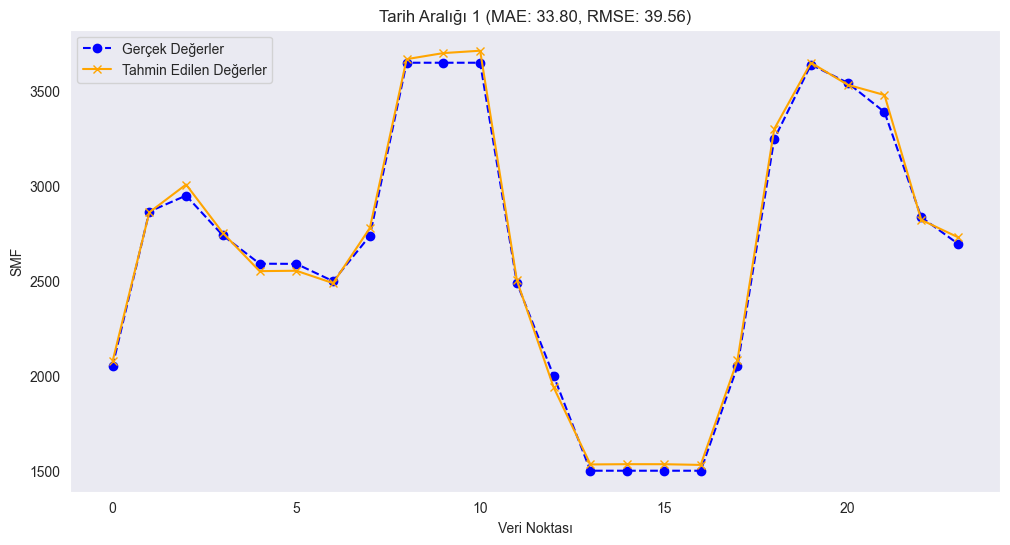


Tarih Aralığı 2: Eğitim 2023-02-21 23:00 - Test 2023-02-22 00:00 ile 2023-02-22 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 26.19
Root Mean Squared Error (RMSE): 32.44


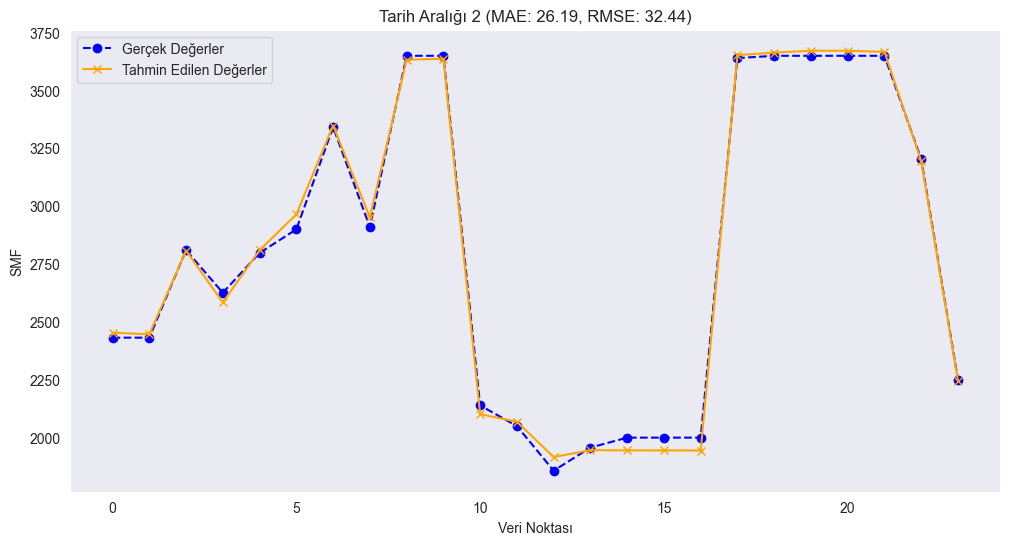


Tarih Aralığı 3: Eğitim 2023-02-22 23:00 - Test 2023-02-23 00:00 ile 2023-02-23 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 21.44
Root Mean Squared Error (RMSE): 28.23


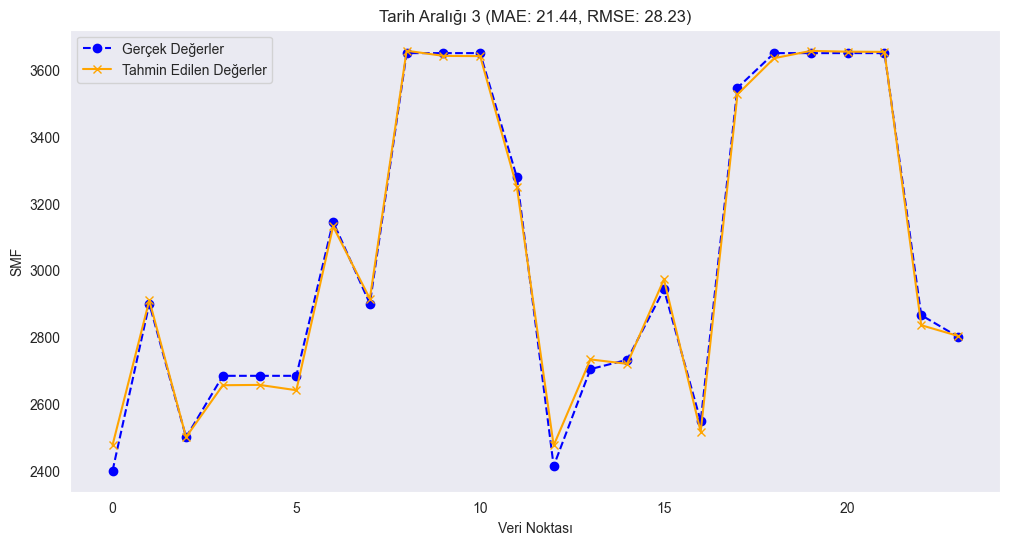


Tarih Aralığı 4: Eğitim 2023-02-23 23:00 - Test 2023-02-24 00:00 ile 2023-02-24 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 28.69
Root Mean Squared Error (RMSE): 36.67


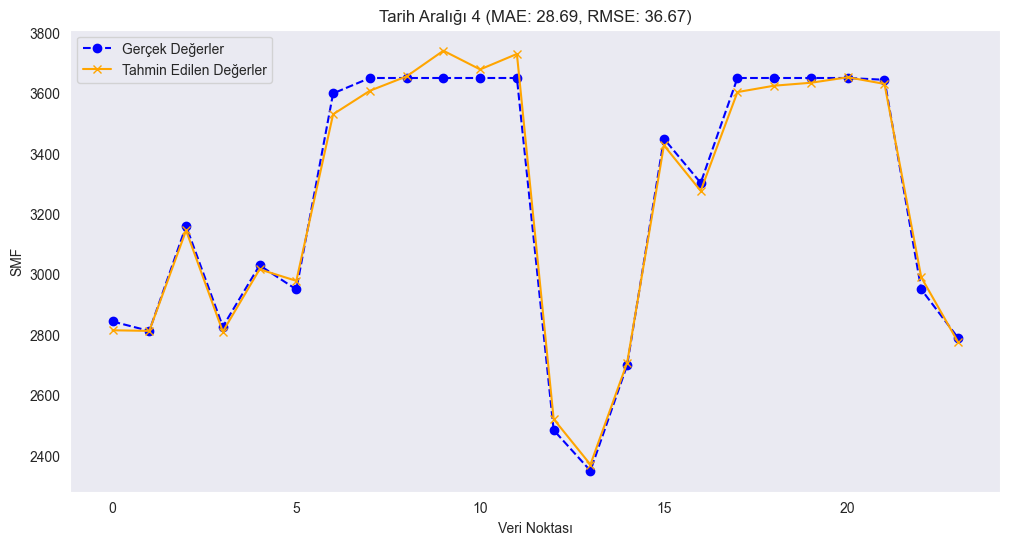


Tarih Aralığı 5: Eğitim 2023-02-24 23:00 - Test 2023-02-25 00:00 ile 2023-02-25 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 44.07
Root Mean Squared Error (RMSE): 55.92


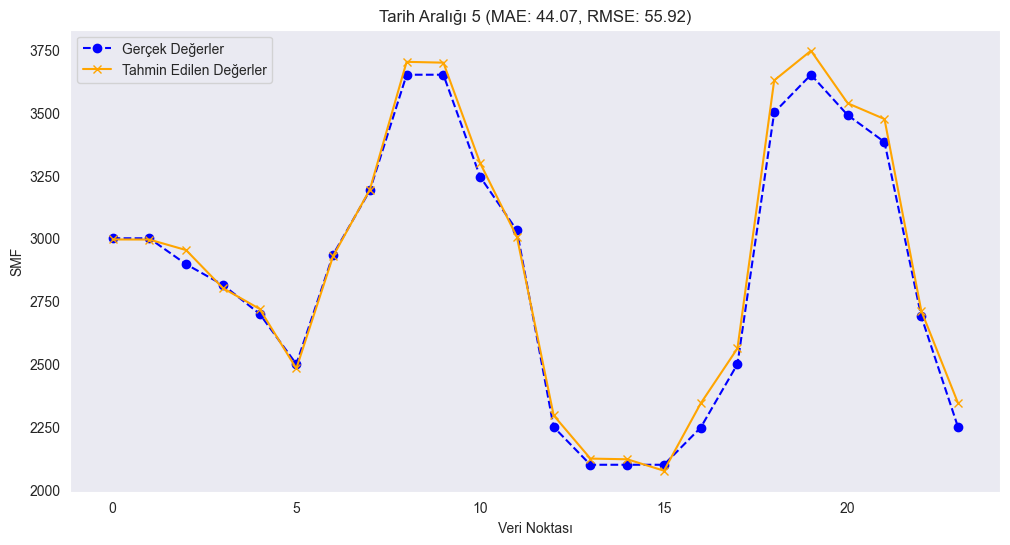


Tarih Aralığı 6: Eğitim 2023-02-25 23:00 - Test 2023-02-26 00:00 ile 2023-02-26 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 57.08
Root Mean Squared Error (RMSE): 73.20


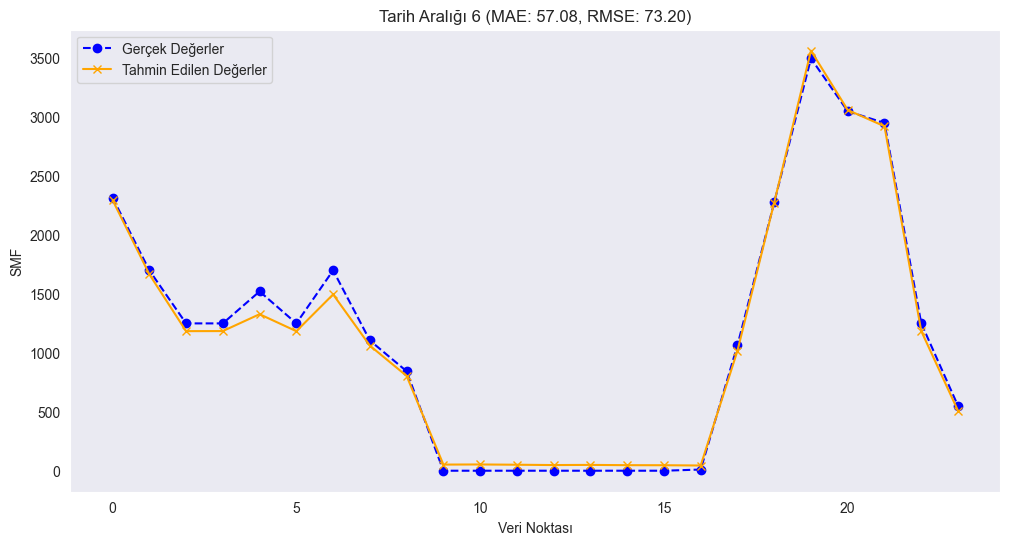


Tarih Aralığı 7: Eğitim 2023-02-26 23:00 - Test 2023-02-27 00:00 ile 2023-02-27 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 38.52
Root Mean Squared Error (RMSE): 50.41


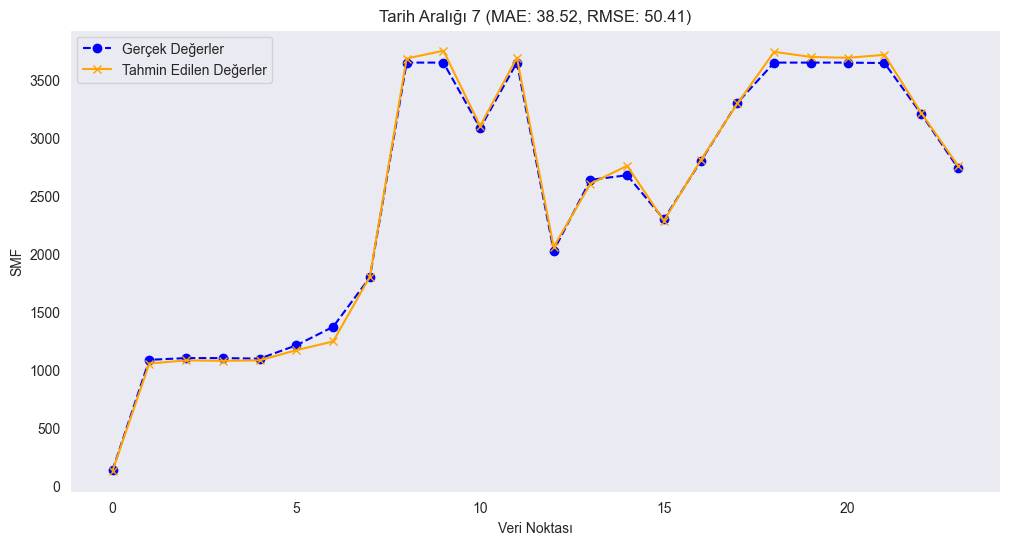


Tüm Tarih Aralıklarının Sonuçları:
                                Tarih Aralığı        MAE       RMSE
0         2023-02-21 00:00 - 2023-02-21 23:00  33.797038  39.559470
1         2023-02-22 00:00 - 2023-02-22 23:00  26.189041  32.438198
2         2023-02-23 00:00 - 2023-02-23 23:00  21.435938  28.231027
3         2023-02-24 00:00 - 2023-02-24 23:00  28.688136  36.671332
4         2023-02-25 00:00 - 2023-02-25 23:00  44.073725  55.923619
5         2023-02-26 00:00 - 2023-02-26 23:00  57.075277  73.198401
6         2023-02-27 00:00 - 2023-02-27 23:00  38.524698  50.409119
Ortalama                             Ortalama  35.683408  45.204452


In [1]:
# XGBoostModel sınıfını içe aktar
from src.models.XGBUnvariant import XGBoostModel
import pandas as pd
import matplotlib.pyplot as plt

# 1. Veri Yolu ve Hedef Değişken
file_path = "processed_dataset_with_features.csv"
target_column = "Smf"

# 2. Model Sınıfını Başlat
xgb_model = XGBoostModel(file_path, target_column)

# 3. Veriyi Yükle ve Ön İşle
data = xgb_model.load_and_preprocess_data()

# 4. Tarih Sütunu Kontrolü ve Formatlama
if 'Tarih' not in data.columns:
    raise ValueError("Veri setinde 'Tarih' sütunu bulunamadı!")
data['Tarih'] = pd.to_datetime(data['Tarih'])
data = data.sort_values(by='Tarih')

# Test tarih aralıklarını tanımlayın
date_ranges = [
    {"train_end_date": "2023-02-20 23:00", "test_start_date": "2023-02-21 00:00", "test_end_date": "2023-02-21 23:00"},
    {"train_end_date": "2023-02-21 23:00", "test_start_date": "2023-02-22 00:00", "test_end_date": "2023-02-22 23:00"},
    {"train_end_date": "2023-02-22 23:00", "test_start_date": "2023-02-23 00:00", "test_end_date": "2023-02-23 23:00"},
    {"train_end_date": "2023-02-23 23:00", "test_start_date": "2023-02-24 00:00", "test_end_date": "2023-02-24 23:00"},
    {"train_end_date": "2023-02-24 23:00", "test_start_date": "2023-02-25 00:00", "test_end_date": "2023-02-25 23:00"},
    {"train_end_date": "2023-02-25 23:00", "test_start_date": "2023-02-26 00:00", "test_end_date": "2023-02-26 23:00"},
    {"train_end_date": "2023-02-26 23:00", "test_start_date": "2023-02-27 00:00", "test_end_date": "2023-02-27 23:00"},
]

# Performans sonuçlarını saklamak için bir liste
results = []

# Her tarih aralığı için modeli eğit ve test et
for i, date_range in enumerate(date_ranges):
    print(f"\nTarih Aralığı {i + 1}: Eğitim {date_range['train_end_date']} - Test {date_range['test_start_date']} ile {date_range['test_end_date']}")

    # Eğitim ve test veri setlerini oluştur
    train_data = data[(data['Tarih'] <= pd.to_datetime(date_range['train_end_date']))]
    test_data = data[
        (data['Tarih'] >= pd.to_datetime(date_range['test_start_date'])) & (data['Tarih'] <= pd.to_datetime(date_range['test_end_date']))
    ]

    if train_data.empty or test_data.empty:
        print("Eğitim veya test veri seti boş! Bu aralık atlanıyor.")
        continue

    # Özellikler ve hedef değişken
    X_train, X_test = train_data.drop(columns=["Tarih", target_column]), test_data.drop(columns=["Tarih", target_column])
    y_train, y_test = train_data[target_column], test_data[target_column]

    # Modeli eğit ve tahmin yap
    model = xgb_model.train_model(X_train, y_train)
    y_pred, mae, rmse = xgb_model.predict_and_evaluate(X_test, y_test)

    # Sonuçları sakla
    results.append({"Tarih Aralığı": f"{date_range['test_start_date']} - {date_range['test_end_date']}", "MAE": mae, "RMSE": rmse})

    # Tahminleri görselleştir
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Gerçek Değerler', color='blue', marker='o', linestyle='--')
    plt.plot(y_pred, label='Tahmin Edilen Değerler', color='orange', marker='x', linestyle='-')
    plt.title(f"Tarih Aralığı {i + 1} (MAE: {mae:.2f}, RMSE: {rmse:.2f})")
    plt.xlabel("Veri Noktası")
    plt.ylabel("SMF")
    plt.legend()
    plt.grid()
    plt.show()

# Performans sonuçlarını göster
results_df = pd.DataFrame(results)

# Ortalamaları ekle
average_mae = results_df['MAE'].mean()
average_rmse = results_df['RMSE'].mean()

results_df.loc["Ortalama"] = ["Ortalama", average_mae, average_rmse]

print("\nTüm Tarih Aralıklarının Sonuçları:")
print(results_df)


XGBoost Multivariant


Tarih Aralığı 1: Eğitim 2023-02-20 23:00 - Test 2023-02-21 00:00 ile 2023-02-21 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 423.12
Root Mean Squared Error (RMSE): 621.71


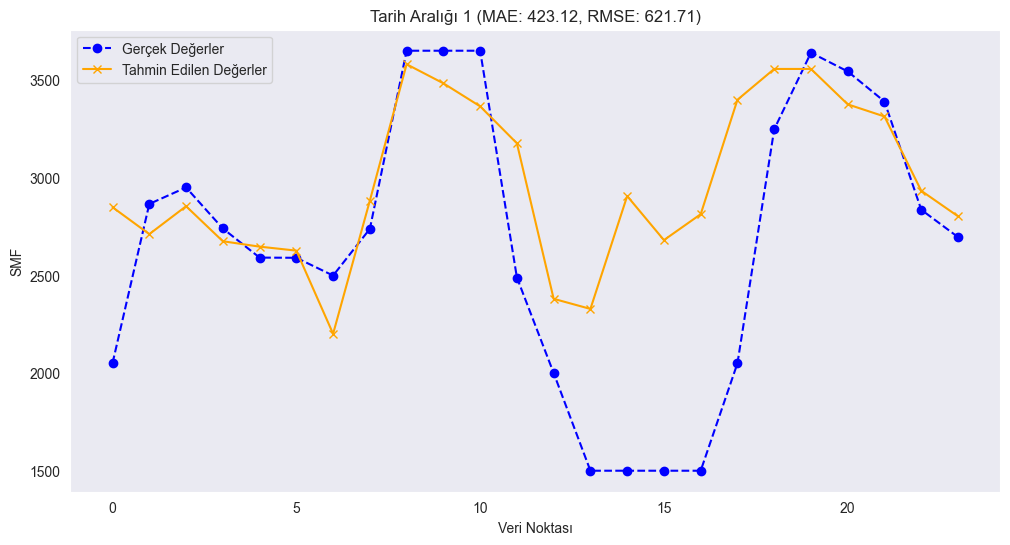


Tarih Aralığı 2: Eğitim 2023-02-21 23:00 - Test 2023-02-22 00:00 ile 2023-02-22 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 427.63
Root Mean Squared Error (RMSE): 611.63


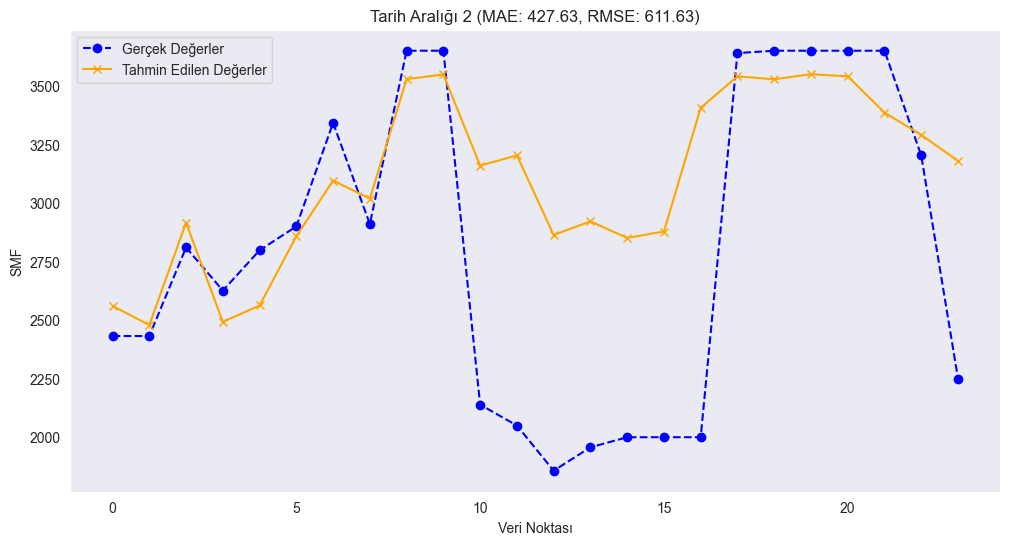


Tarih Aralığı 3: Eğitim 2023-02-22 23:00 - Test 2023-02-23 00:00 ile 2023-02-23 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 146.71
Root Mean Squared Error (RMSE): 224.42


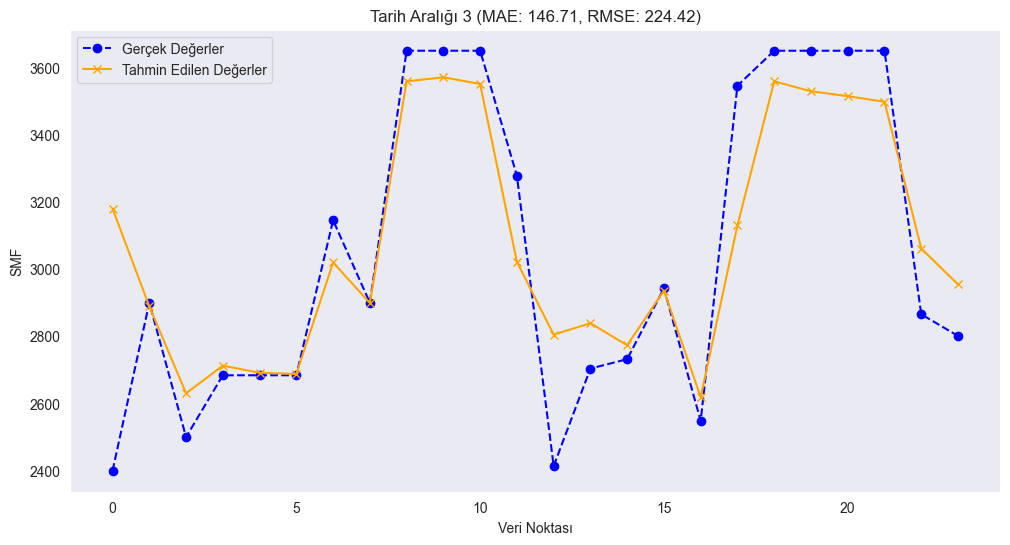


Tarih Aralığı 4: Eğitim 2023-02-23 23:00 - Test 2023-02-24 00:00 ile 2023-02-24 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 199.47
Root Mean Squared Error (RMSE): 229.82


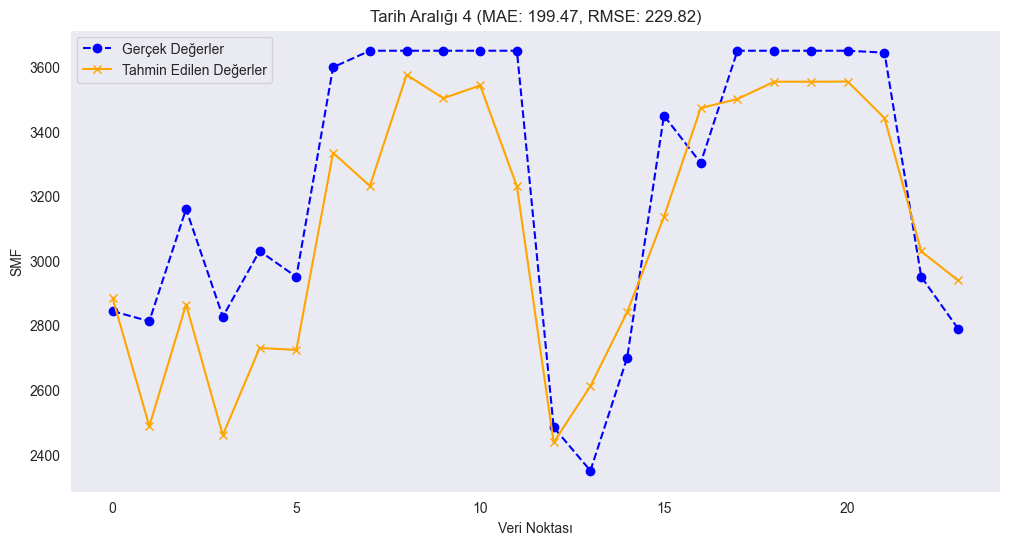


Tarih Aralığı 5: Eğitim 2023-02-24 23:00 - Test 2023-02-25 00:00 ile 2023-02-25 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 190.20
Root Mean Squared Error (RMSE): 303.74


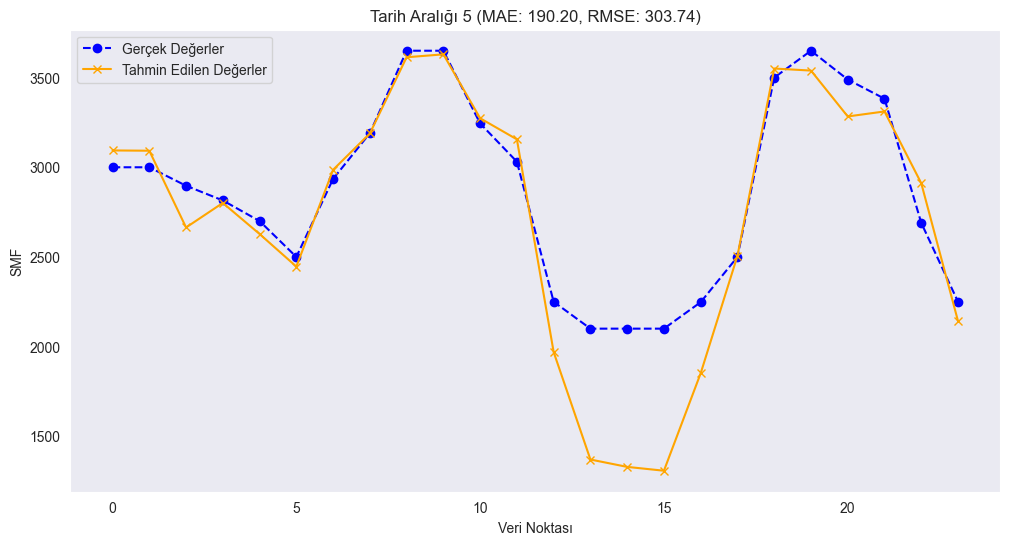


Tarih Aralığı 6: Eğitim 2023-02-25 23:00 - Test 2023-02-26 00:00 ile 2023-02-26 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 343.28
Root Mean Squared Error (RMSE): 427.81


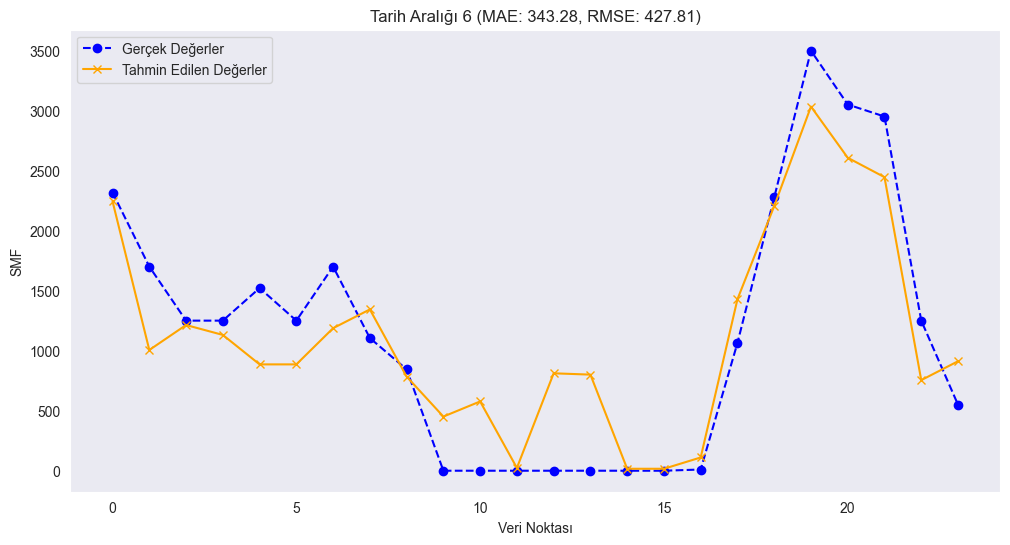


Tarih Aralığı 7: Eğitim 2023-02-26 23:00 - Test 2023-02-27 00:00 ile 2023-02-27 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 216.14
Root Mean Squared Error (RMSE): 288.09


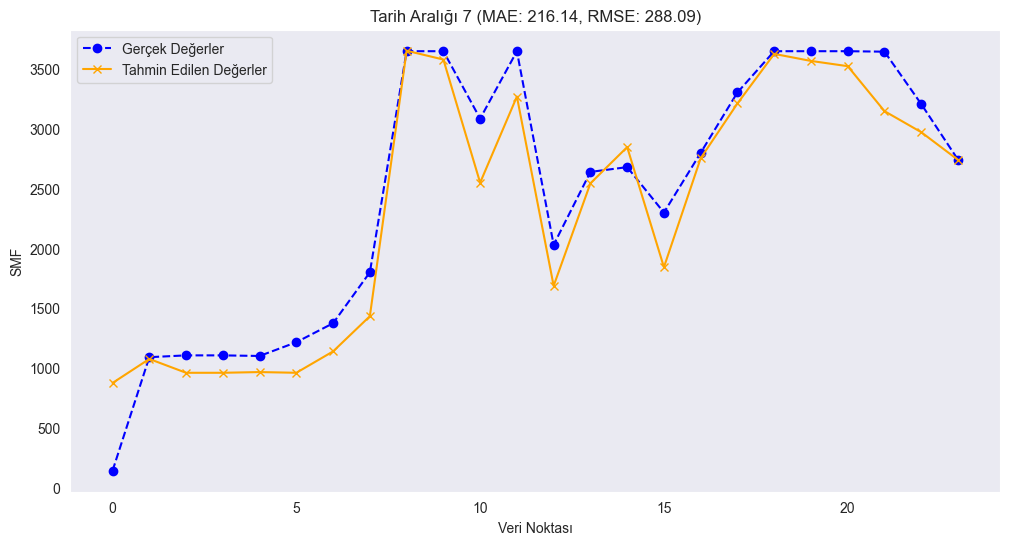


Tüm Tarih Aralıklarının Sonuçları:
                         Tarih Aralığı         MAE        RMSE
0  2023-02-21 00:00 - 2023-02-21 23:00  423.116052  621.711852
1  2023-02-22 00:00 - 2023-02-22 23:00  427.627425  611.631331
2  2023-02-23 00:00 - 2023-02-23 23:00  146.712535  224.418347
3  2023-02-24 00:00 - 2023-02-24 23:00  199.468479  229.818209
4  2023-02-25 00:00 - 2023-02-25 23:00  190.201028  303.736403
5  2023-02-26 00:00 - 2023-02-26 23:00  343.280349  427.814878
6  2023-02-27 00:00 - 2023-02-27 23:00  216.142170  288.091087
7                             Ortalama  278.078291  386.746015


In [11]:
# XGBoostModelMultivaryant sınıfını içe aktar
from src.models.XGBMultiVariant import XGBoostModelMultivaryant
import pandas as pd
import matplotlib.pyplot as plt

# Özellikler listesi
features = [
    'Ptf',
    'Maxeslesmefiyati',
    'Maxalisfiyati',
    'Arzislemhacmi',
    'Talepislemhacmi',
    'Talepislemhacmi_rolling_mean',
    'Talepislemhacmi_rolling_sum',
    'Ptfeuro',
    'Ptfdolar'
]

# 1. Veri Yolu ve Hedef Değişken
file_path = "processed_dataset_with_features.csv"
target_column = "Smf"

# Model sınıfını başlat
xgb_model = XGBoostModelMultivaryant(file_path, target_column, features)

# Veriyi yükle ve ön işle
data = xgb_model.load_and_preprocess_data()

# Test tarih aralıklarını tanımlayın
date_ranges = [
    {"train_end_date": "2023-02-20 23:00", "test_start_date": "2023-02-21 00:00", "test_end_date": "2023-02-21 23:00"},
    {"train_end_date": "2023-02-21 23:00", "test_start_date": "2023-02-22 00:00", "test_end_date": "2023-02-22 23:00"},
    {"train_end_date": "2023-02-22 23:00", "test_start_date": "2023-02-23 00:00", "test_end_date": "2023-02-23 23:00"},
    {"train_end_date": "2023-02-23 23:00", "test_start_date": "2023-02-24 00:00", "test_end_date": "2023-02-24 23:00"},
    {"train_end_date": "2023-02-24 23:00", "test_start_date": "2023-02-25 00:00", "test_end_date": "2023-02-25 23:00"},
    {"train_end_date": "2023-02-25 23:00", "test_start_date": "2023-02-26 00:00", "test_end_date": "2023-02-26 23:00"},
    {"train_end_date": "2023-02-26 23:00", "test_start_date": "2023-02-27 00:00", "test_end_date": "2023-02-27 23:00"},
]

# Performans sonuçlarını saklamak için bir liste
results = []

# Her tarih aralığı için modeli eğit ve test et
for i, date_range in enumerate(date_ranges):
    print(f"\nTarih Aralığı {i + 1}: Eğitim {date_range['train_end_date']} - Test {date_range['test_start_date']} ile {date_range['test_end_date']}")

    # Veriyi böl
    X_train, X_test, y_train, y_test = xgb_model.split_data(data, date_range['train_end_date'], date_range['test_start_date'], date_range['test_end_date'])

    # Modeli eğit ve tahmin yap
    model = xgb_model.train_model(X_train, y_train)
    y_pred, mae, rmse = xgb_model.predict_and_evaluate(X_test, y_test)

    # Sonuçları sakla
    results.append({"Tarih Aralığı": f"{date_range['test_start_date']} - {date_range['test_end_date']}", "MAE": mae, "RMSE": rmse})

    # Tahminleri görselleştir
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Gerçek Değerler', color='blue', marker='o', linestyle='--')
    plt.plot(y_pred, label='Tahmin Edilen Değerler', color='orange', marker='x', linestyle='-')
    plt.title(f"Tarih Aralığı {i + 1} (MAE: {mae:.2f}, RMSE: {rmse:.2f})")
    plt.xlabel("Veri Noktası")
    plt.ylabel("SMF")
    plt.legend()
    plt.grid()
    plt.show()

# Performans sonuçlarını göster
results_df = pd.DataFrame(results)

# Ortalamaları ekle
average_mae = results_df['MAE'].mean()
average_rmse = results_df['RMSE'].mean()

results_df = pd.concat([results_df, pd.DataFrame([{"Tarih Aralığı": "Ortalama", "MAE": average_mae, "RMSE": average_rmse}])], ignore_index=True)

print("\nTüm Tarih Aralıklarının Sonuçları:")
print(results_df)



RandomForest Univariant



Tarih Aralığı 1: Eğitim 2023-02-20 23:00 - Test 2023-02-21 00:00 ile 2023-02-21 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 14.99
Root Mean Squared Error (RMSE): 25.29


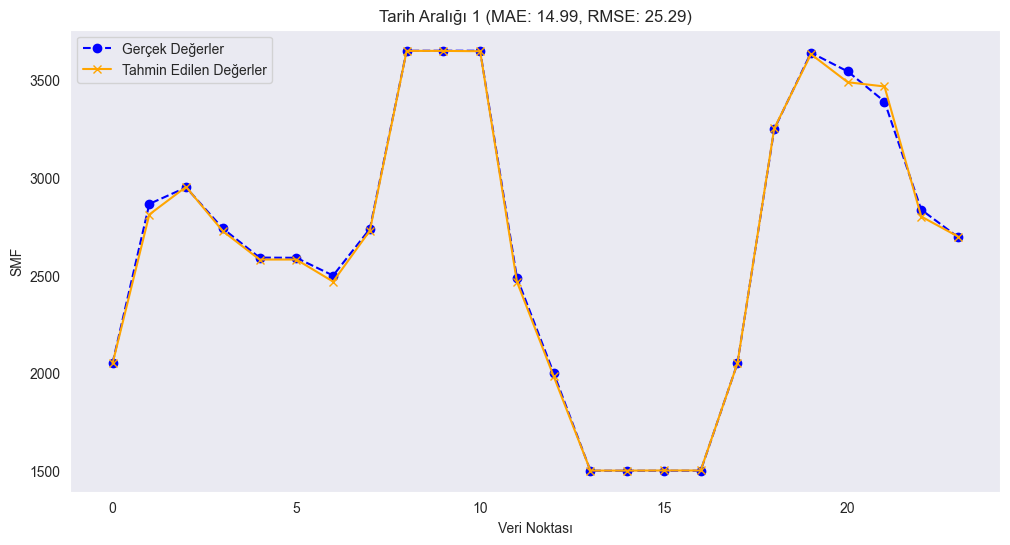


Tarih Aralığı 2: Eğitim 2023-02-21 23:00 - Test 2023-02-22 00:00 ile 2023-02-22 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 20.21
Root Mean Squared Error (RMSE): 33.92


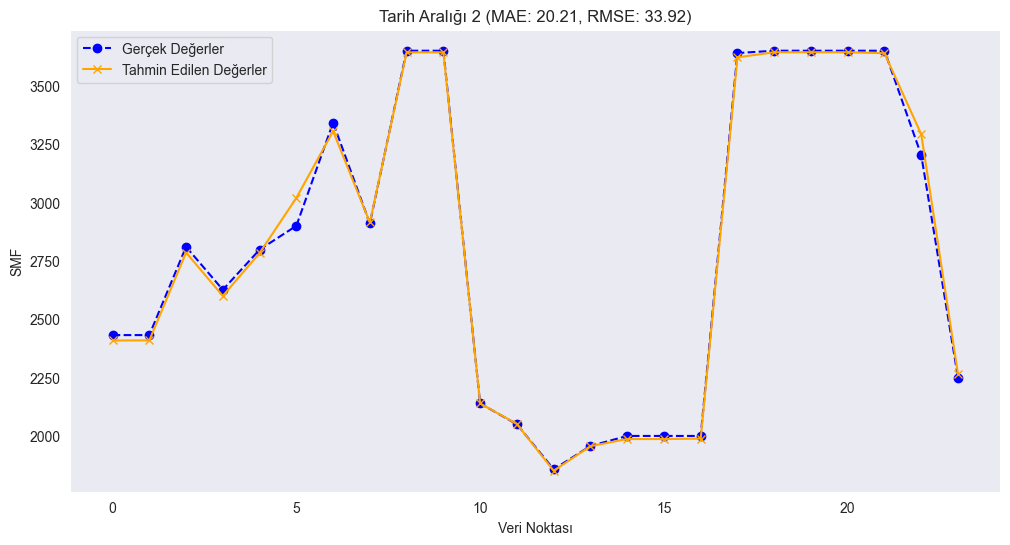


Tarih Aralığı 3: Eğitim 2023-02-22 23:00 - Test 2023-02-23 00:00 ile 2023-02-23 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 23.81
Root Mean Squared Error (RMSE): 35.85


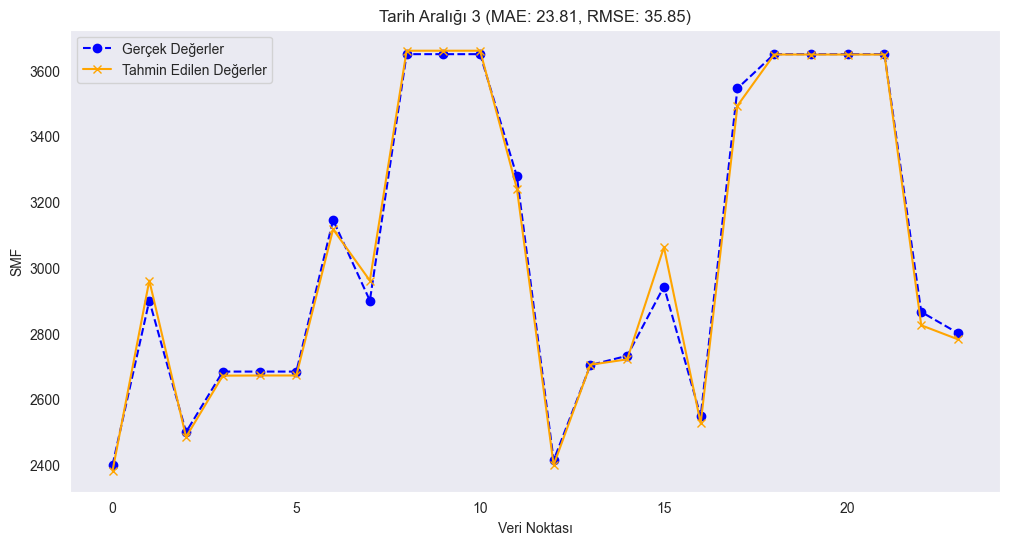


Tarih Aralığı 4: Eğitim 2023-02-23 23:00 - Test 2023-02-24 00:00 ile 2023-02-24 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 15.91
Root Mean Squared Error (RMSE): 18.37


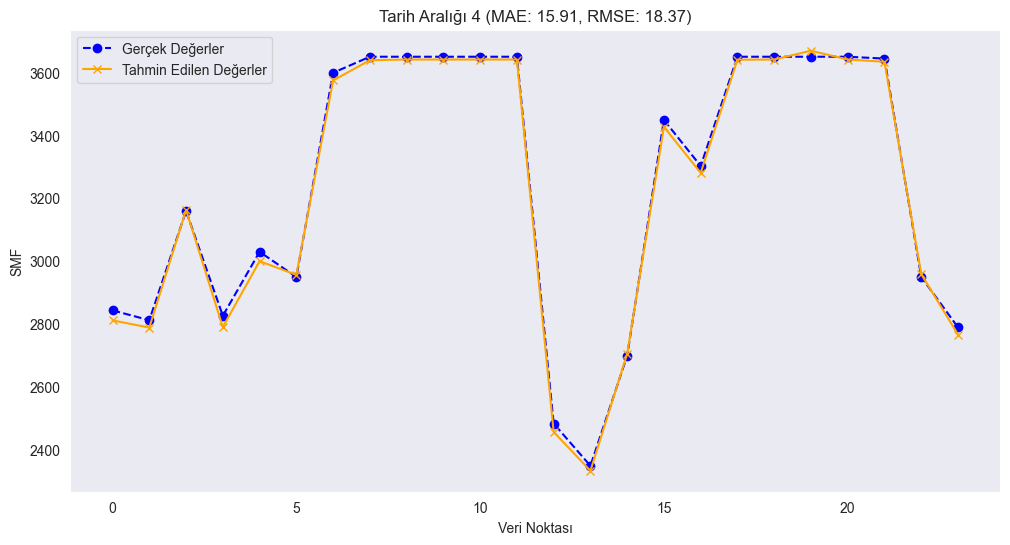


Tarih Aralığı 5: Eğitim 2023-02-24 23:00 - Test 2023-02-25 00:00 ile 2023-02-25 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 15.16
Root Mean Squared Error (RMSE): 19.23


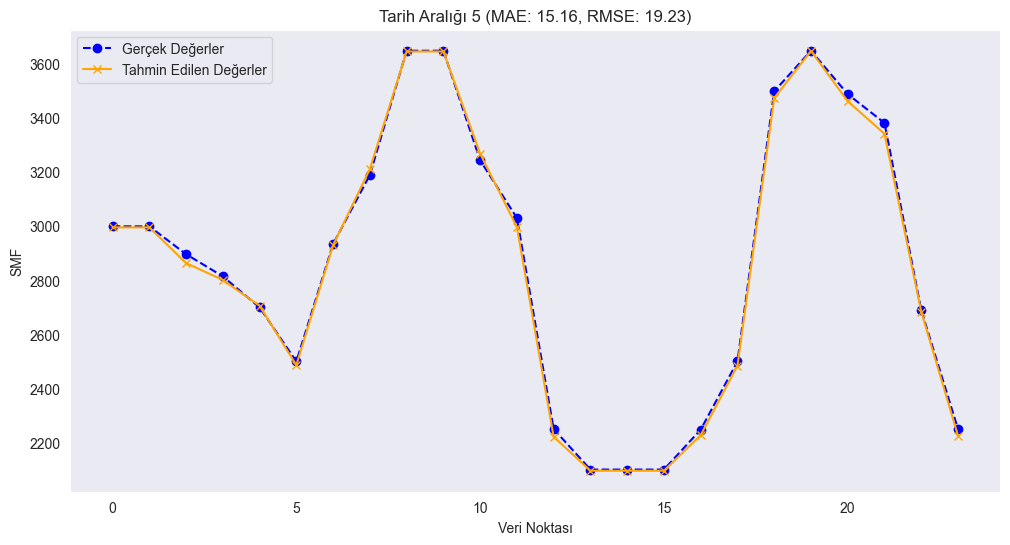


Tarih Aralığı 6: Eğitim 2023-02-25 23:00 - Test 2023-02-26 00:00 ile 2023-02-26 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 45.92
Root Mean Squared Error (RMSE): 102.38


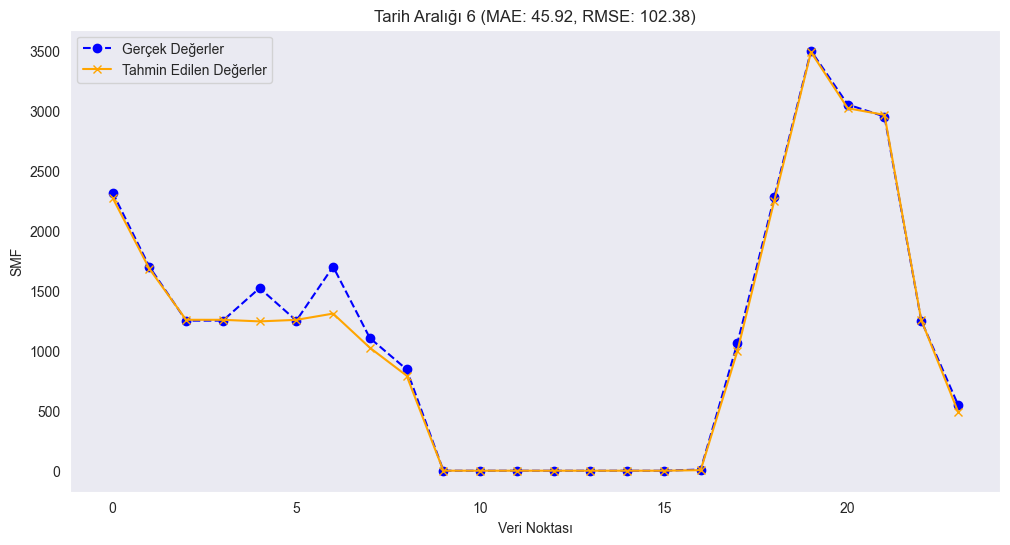


Tarih Aralığı 7: Eğitim 2023-02-26 23:00 - Test 2023-02-27 00:00 ile 2023-02-27 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 55.34
Root Mean Squared Error (RMSE): 88.11


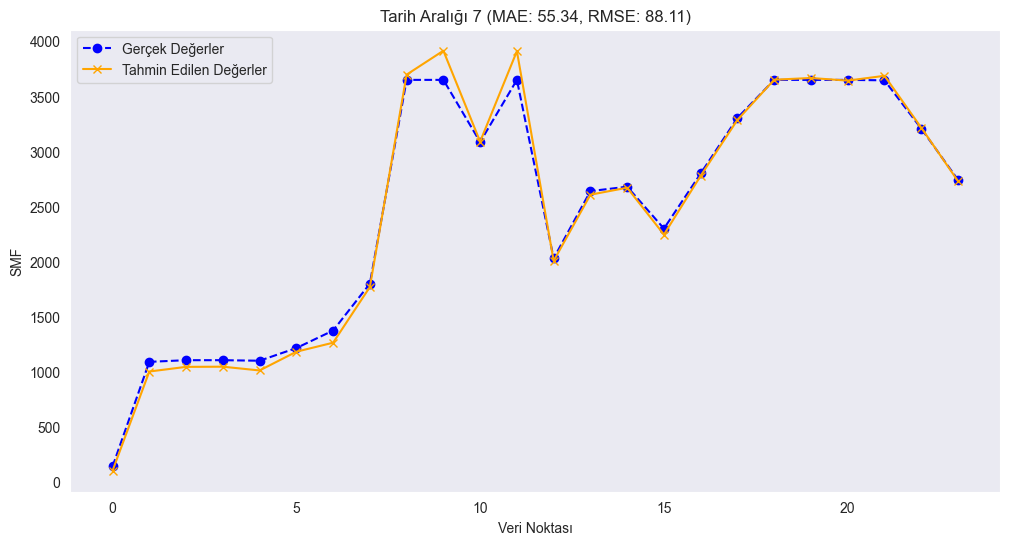


Tüm Tarih Aralıklarının Sonuçları:
                                Tarih Aralığı        MAE        RMSE
0         2023-02-21 00:00 - 2023-02-21 23:00  14.988995   25.290274
1         2023-02-22 00:00 - 2023-02-22 23:00  20.206381   33.918263
2         2023-02-23 00:00 - 2023-02-23 23:00  23.807707   35.851972
3         2023-02-24 00:00 - 2023-02-24 23:00  15.905850   18.367341
4         2023-02-25 00:00 - 2023-02-25 23:00  15.157702   19.229288
5         2023-02-26 00:00 - 2023-02-26 23:00  45.915738  102.376006
6         2023-02-27 00:00 - 2023-02-27 23:00  55.342380   88.106613
Ortalama                             Ortalama  27.332108   46.162822


In [2]:
# RandomForestModel sınıfını içe aktar
from src.models.RandomForestUnivariant import RandomForestModel
import pandas as pd
import matplotlib.pyplot as plt

# 1. Veri Yolu ve Hedef Değişken
file_path = "processed_dataset_cleaned.csv"
target_column = "Smf"

# 2. Model Sınıfını Başlat
rf_model = RandomForestModel(file_path, target_column)

# 3. Veriyi Yükle ve Ön İşle
data = rf_model.load_and_preprocess_data()

# 4. Tarih Sütunu Kontrolü ve Formatlama
if 'Tarih' not in data.columns:
    raise ValueError("Veri setinde 'Tarih' sütunu bulunamadı!")
data['Tarih'] = pd.to_datetime(data['Tarih'])
data = data.sort_values(by='Tarih')

# Test tarih aralıklarını tanımlayın
date_ranges = [
    {"train_end_date": "2023-02-20 23:00", "test_start_date": "2023-02-21 00:00", "test_end_date": "2023-02-21 23:00"},
    {"train_end_date": "2023-02-21 23:00", "test_start_date": "2023-02-22 00:00", "test_end_date": "2023-02-22 23:00"},
    {"train_end_date": "2023-02-22 23:00", "test_start_date": "2023-02-23 00:00", "test_end_date": "2023-02-23 23:00"},
    {"train_end_date": "2023-02-23 23:00", "test_start_date": "2023-02-24 00:00", "test_end_date": "2023-02-24 23:00"},
    {"train_end_date": "2023-02-24 23:00", "test_start_date": "2023-02-25 00:00", "test_end_date": "2023-02-25 23:00"},
    {"train_end_date": "2023-02-25 23:00", "test_start_date": "2023-02-26 00:00", "test_end_date": "2023-02-26 23:00"},
    {"train_end_date": "2023-02-26 23:00", "test_start_date": "2023-02-27 00:00", "test_end_date": "2023-02-27 23:00"},
]

# Performans sonuçlarını saklamak için bir liste
results = []

# Her tarih aralığı için modeli eğit ve test et
for i, date_range in enumerate(date_ranges):
    print(f"\nTarih Aralığı {i + 1}: Eğitim {date_range['train_end_date']} - Test {date_range['test_start_date']} ile {date_range['test_end_date']}")

    # Eğitim ve test veri setlerini oluştur
    train_data = data[(data['Tarih'] <= pd.to_datetime(date_range['train_end_date']))]
    test_data = data[
        (data['Tarih'] >= pd.to_datetime(date_range['test_start_date'])) & (data['Tarih'] <= pd.to_datetime(date_range['test_end_date']))
    ]

    if train_data.empty or test_data.empty:
        print("Eğitim veya test veri seti boş! Bu aralık atlanıyor.")
        continue

    # Özellikler ve hedef değişken
    X_train, X_test = train_data.drop(columns=["Tarih", target_column]), test_data.drop(columns=["Tarih", target_column])
    y_train, y_test = train_data[target_column], test_data[target_column]

    # Modeli eğit ve tahmin yap
    model = rf_model.train_model(X_train, y_train)
    y_pred, mae, rmse = rf_model.predict_and_evaluate(X_test, y_test)

    # Sonuçları sakla
    results.append({"Tarih Aralığı": f"{date_range['test_start_date']} - {date_range['test_end_date']}", "MAE": mae, "RMSE": rmse})

    # Tahminleri görselleştir
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Gerçek Değerler', color='blue', marker='o', linestyle='--')
    plt.plot(y_pred, label='Tahmin Edilen Değerler', color='orange', marker='x', linestyle='-')
    plt.title(f"Tarih Aralığı {i + 1} (MAE: {mae:.2f}, RMSE: {rmse:.2f})")
    plt.xlabel("Veri Noktası")
    plt.ylabel("SMF")
    plt.legend()
    plt.grid()
    plt.show()

# Performans sonuçlarını göster
results_df = pd.DataFrame(results)

# Ortalamaları ekle
average_mae = results_df['MAE'].mean()
average_rmse = results_df['RMSE'].mean()

results_df.loc["Ortalama"] = ["Ortalama", average_mae, average_rmse]

print("\nTüm Tarih Aralıklarının Sonuçları:")
print(results_df)


RandomForest Multivariant



Tarih Aralığı 1: Eğitim 2023-02-20 23:00 - Test 2023-02-21 00:00 ile 2023-02-21 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 416.25
Root Mean Squared Error (RMSE): 608.13


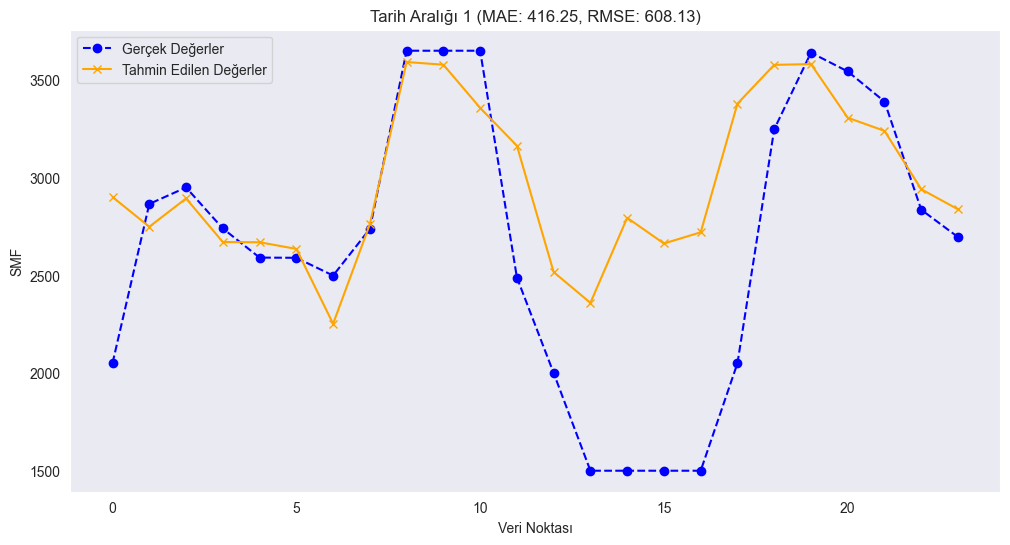


Tarih Aralığı 2: Eğitim 2023-02-21 23:00 - Test 2023-02-22 00:00 ile 2023-02-22 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 399.72
Root Mean Squared Error (RMSE): 593.98


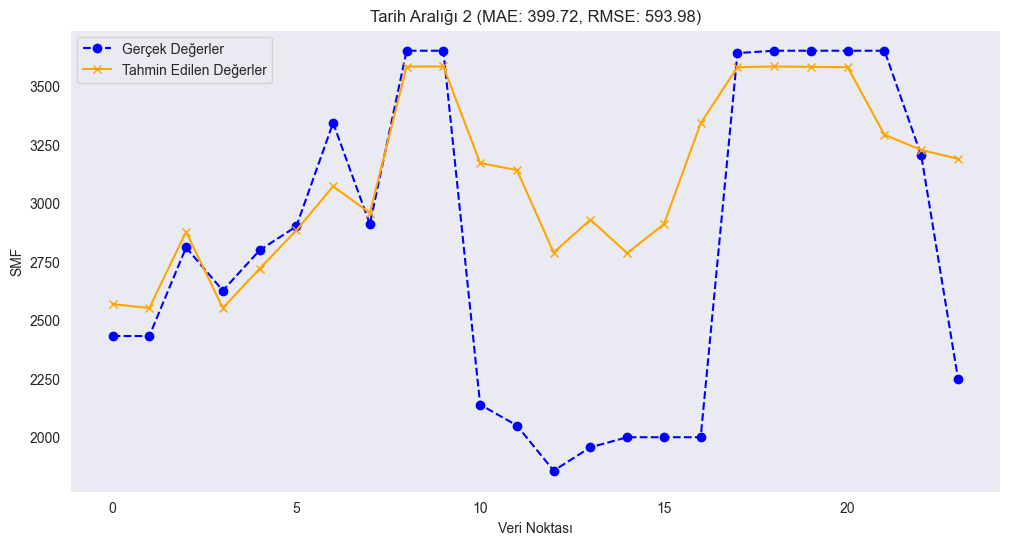


Tarih Aralığı 3: Eğitim 2023-02-22 23:00 - Test 2023-02-23 00:00 ile 2023-02-23 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 148.50
Root Mean Squared Error (RMSE): 232.05


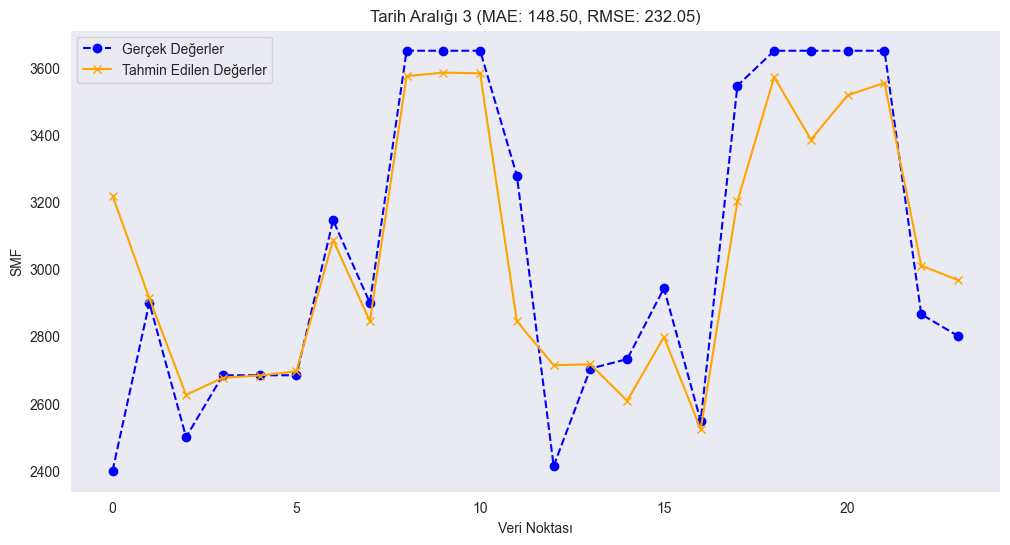


Tarih Aralığı 4: Eğitim 2023-02-23 23:00 - Test 2023-02-24 00:00 ile 2023-02-24 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 190.02
Root Mean Squared Error (RMSE): 238.91


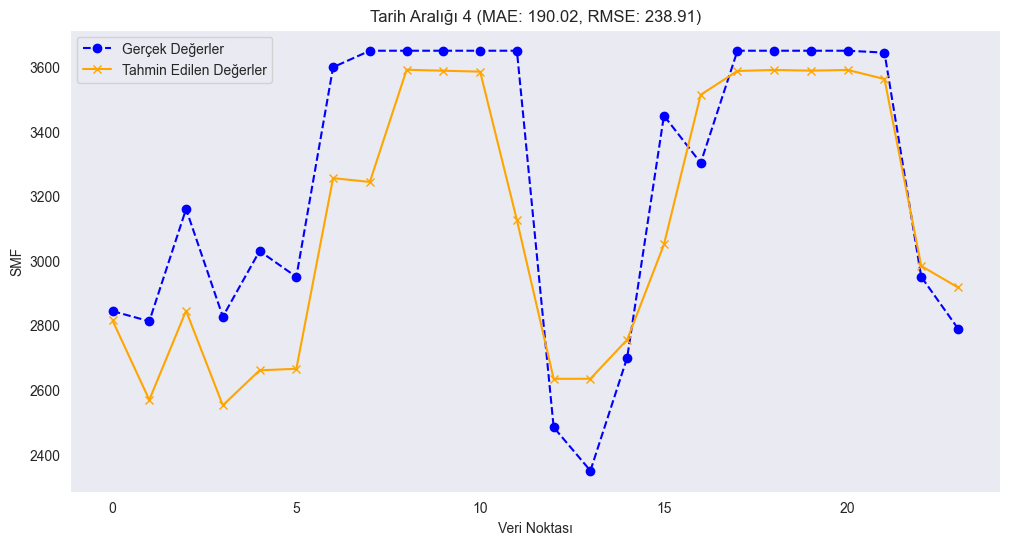


Tarih Aralığı 5: Eğitim 2023-02-24 23:00 - Test 2023-02-25 00:00 ile 2023-02-25 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 228.89
Root Mean Squared Error (RMSE): 373.71


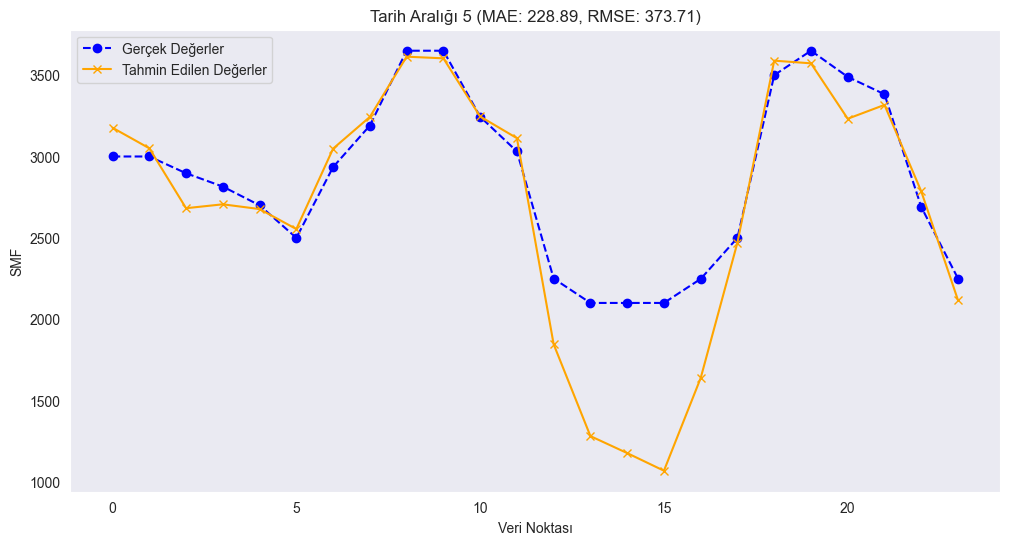


Tarih Aralığı 6: Eğitim 2023-02-25 23:00 - Test 2023-02-26 00:00 ile 2023-02-26 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 355.08
Root Mean Squared Error (RMSE): 425.07


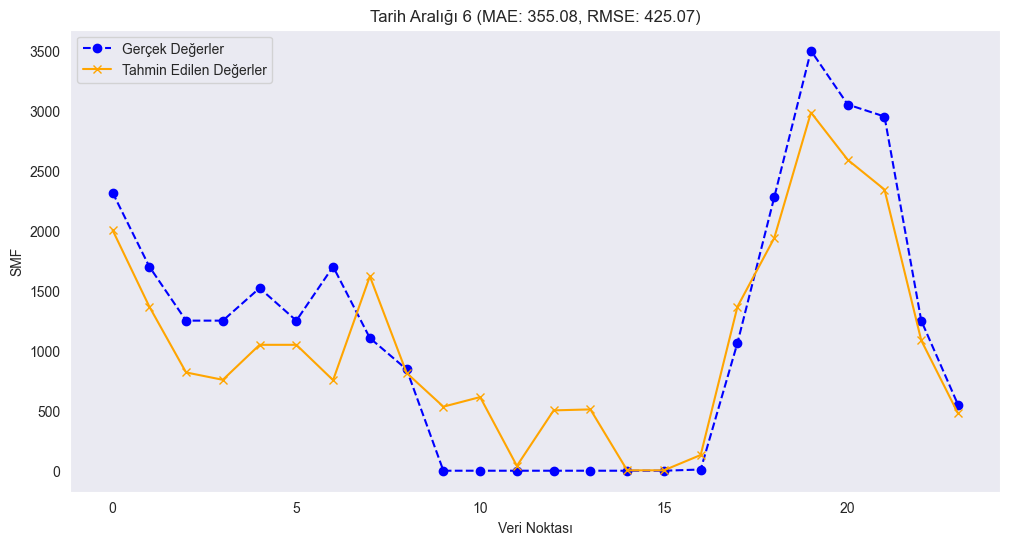


Tarih Aralığı 7: Eğitim 2023-02-26 23:00 - Test 2023-02-27 00:00 ile 2023-02-27 23:00
Model başarıyla eğitildi!
Mean Absolute Error (MAE): 183.54
Root Mean Squared Error (RMSE): 264.90


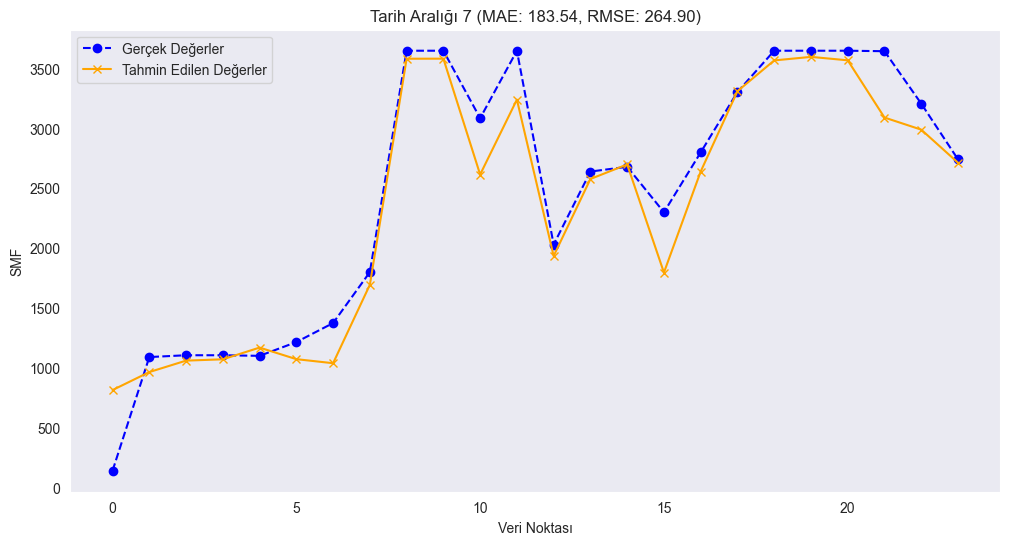


Tüm Tarih Aralıklarının Sonuçları:
                                Tarih Aralığı         MAE        RMSE
0         2023-02-21 00:00 - 2023-02-21 23:00  416.249879  608.129541
1         2023-02-22 00:00 - 2023-02-22 23:00  399.718089  593.978832
2         2023-02-23 00:00 - 2023-02-23 23:00  148.503546  232.050072
3         2023-02-24 00:00 - 2023-02-24 23:00  190.018184  238.914203
4         2023-02-25 00:00 - 2023-02-25 23:00  228.891602  373.705724
5         2023-02-26 00:00 - 2023-02-26 23:00  355.078286  425.073618
6         2023-02-27 00:00 - 2023-02-27 23:00  183.539642  264.903182
Ortalama                             Ortalama  274.571318  390.965025


In [8]:
# RandomForestModelMultivariant sınıfını içe aktar
from src.models.RandomForestMultiVariant import RandomForestModelMultivariant
import pandas as pd
import matplotlib.pyplot as plt

# Özellikler listesi
features = [
    'Ptf',
    'Maxeslesmefiyati',
    'Maxalisfiyati',
    'Arzislemhacmi',
    'Talepislemhacmi',
    'Talepislemhacmi_rolling_mean',
    'Talepislemhacmi_rolling_sum',
    'Ptfeuro',
    'Ptfdolar'
]

# 1. Veri Yolu ve Hedef Değişken
file_path = "processed_dataset_with_features.csv"
target_column = "Smf"

# 2. Model Sınıfını Başlat
rf_model = RandomForestModelMultivariant(file_path, target_column, features)

# 3. Veriyi Yükle ve Ön İşle
data = rf_model.load_and_preprocess_data()

# 4. Tarih Sütunu Kontrolü ve Formatlama
if 'Tarih' not in data.columns:
    raise ValueError("Veri setinde 'Tarih' sütunu bulunamadı!")
data['Tarih'] = pd.to_datetime(data['Tarih'])
data = data.sort_values(by='Tarih')

# Test tarih aralıklarını tanımlayın
date_ranges = [
    {"train_end_date": "2023-02-20 23:00", "test_start_date": "2023-02-21 00:00", "test_end_date": "2023-02-21 23:00"},
    {"train_end_date": "2023-02-21 23:00", "test_start_date": "2023-02-22 00:00", "test_end_date": "2023-02-22 23:00"},
    {"train_end_date": "2023-02-22 23:00", "test_start_date": "2023-02-23 00:00", "test_end_date": "2023-02-23 23:00"},
    {"train_end_date": "2023-02-23 23:00", "test_start_date": "2023-02-24 00:00", "test_end_date": "2023-02-24 23:00"},
    {"train_end_date": "2023-02-24 23:00", "test_start_date": "2023-02-25 00:00", "test_end_date": "2023-02-25 23:00"},
    {"train_end_date": "2023-02-25 23:00", "test_start_date": "2023-02-26 00:00", "test_end_date": "2023-02-26 23:00"},
    {"train_end_date": "2023-02-26 23:00", "test_start_date": "2023-02-27 00:00", "test_end_date": "2023-02-27 23:00"},
]

# Performans sonuçlarını saklamak için bir liste
results = []

# Her tarih aralığı için modeli eğit ve test et
for i, date_range in enumerate(date_ranges):
    print(f"\nTarih Aralığı {i + 1}: Eğitim {date_range['train_end_date']} - Test {date_range['test_start_date']} ile {date_range['test_end_date']}")

    # Eğitim ve test veri setlerini oluştur
    train_data = data[(data['Tarih'] <= pd.to_datetime(date_range['train_end_date']))]
    test_data = data[
        (data['Tarih'] >= pd.to_datetime(date_range['test_start_date'])) & (data['Tarih'] <= pd.to_datetime(date_range['test_end_date']))
    ]

    if train_data.empty or test_data.empty:
        print("Eğitim veya test veri seti boş! Bu aralık atlanıyor.")
        continue

    # Özellikler ve hedef değişken
    X_train, X_test = train_data[features], test_data[features]
    y_train, y_test = train_data[target_column], test_data[target_column]

    # Modeli eğit ve tahmin yap
    model = rf_model.train_model(X_train, y_train)
    y_pred, mae, rmse = rf_model.predict_and_evaluate(X_test, y_test)

    # Sonuçları sakla
    results.append({"Tarih Aralığı": f"{date_range['test_start_date']} - {date_range['test_end_date']}", "MAE": mae, "RMSE": rmse})

    # Tahminleri görselleştir
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Gerçek Değerler', color='blue', marker='o', linestyle='--')
    plt.plot(y_pred, label='Tahmin Edilen Değerler', color='orange', marker='x', linestyle='-')
    plt.title(f"Tarih Aralığı {i + 1} (MAE: {mae:.2f}, RMSE: {rmse:.2f})")
    plt.xlabel("Veri Noktası")
    plt.ylabel("SMF")
    plt.legend()
    plt.grid()
    plt.show()

# Performans sonuçlarını göster
results_df = pd.DataFrame(results)

# Ortalamaları ekle
average_mae = results_df['MAE'].mean()
average_rmse = results_df['RMSE'].mean()

results_df.loc["Ortalama"] = ["Ortalama", average_mae, average_rmse]

print("\nTüm Tarih Aralıklarının Sonuçları:")
print(results_df)


ARIMA


Tarih Aralığı 1: Eğitim 2023-02-20 23:00 - Test 2023-02-21 00:00 ile 2023-02-21 23:00
                               SARIMAX Results                                
Dep. Variable:                    Smf   No. Observations:                36288
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -255547.317
Date:                Mon, 20 Jan 2025   AIC                         511104.634
Time:                        13:19:52   BIC                         511147.130
Sample:                             0   HQIC                        511118.147
                              - 36288                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0524      0.012      4.513      0.000       0.030       0.075
ar.L2          0.5380      0.009     56.743 

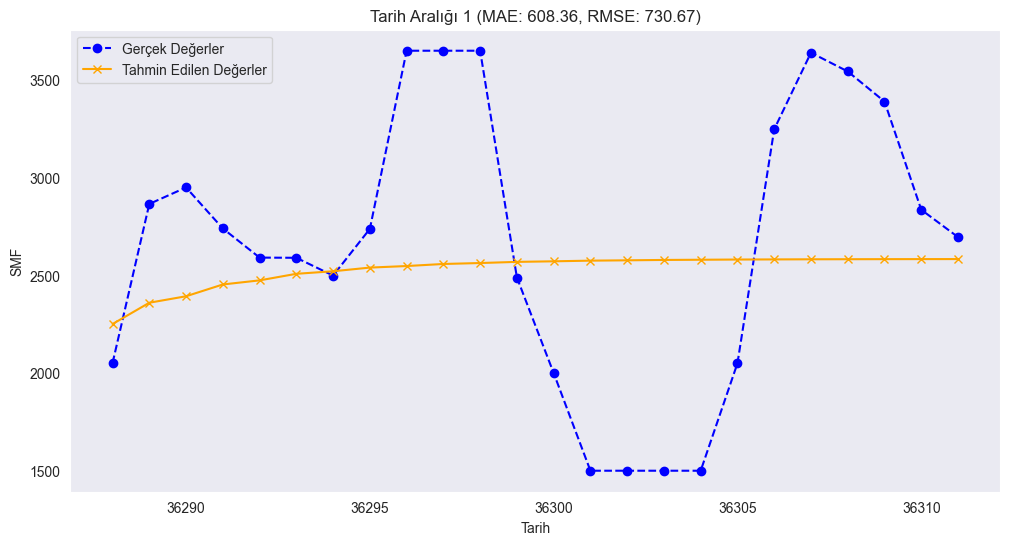


Tarih Aralığı 2: Eğitim 2023-02-21 23:00 - Test 2023-02-22 00:00 ile 2023-02-22 23:00
                               SARIMAX Results                                
Dep. Variable:                    Smf   No. Observations:                36312
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -255736.336
Date:                Mon, 20 Jan 2025   AIC                         511482.672
Time:                        13:20:07   BIC                         511525.172
Sample:                             0   HQIC                        511496.186
                              - 36312                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0543      0.012      4.668      0.000       0.032       0.077
ar.L2          0.5366      0.009     56.487 

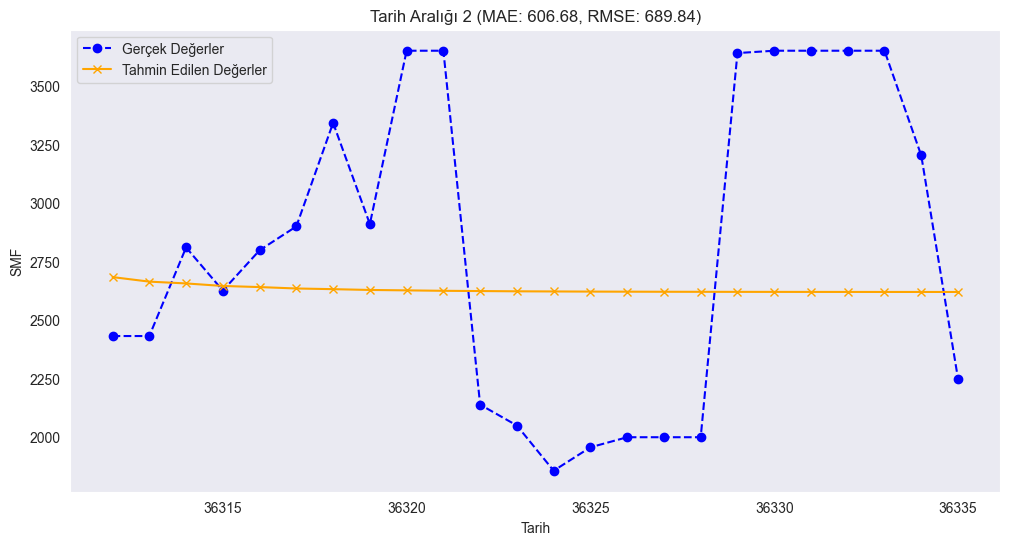


Tarih Aralığı 3: Eğitim 2023-02-22 23:00 - Test 2023-02-23 00:00 ile 2023-02-23 23:00
                               SARIMAX Results                                
Dep. Variable:                    Smf   No. Observations:                36336
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -255934.125
Date:                Mon, 20 Jan 2025   AIC                         511878.250
Time:                        13:20:25   BIC                         511920.753
Sample:                             0   HQIC                        511891.764
                              - 36336                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0539      0.012      4.642      0.000       0.031       0.077
ar.L2          0.5367      0.009     56.584 

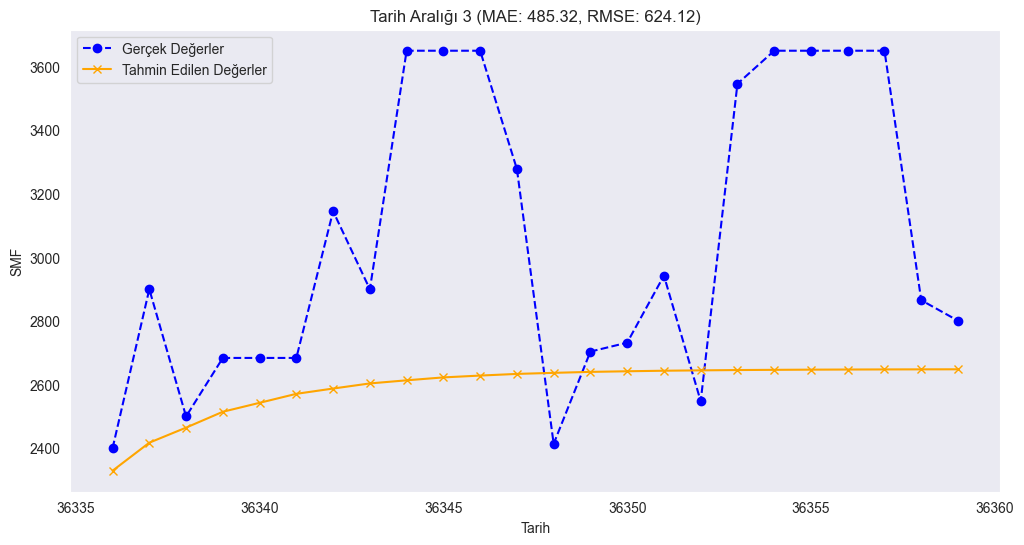


Tarih Aralığı 4: Eğitim 2023-02-23 23:00 - Test 2023-02-24 00:00 ile 2023-02-24 23:00
                               SARIMAX Results                                
Dep. Variable:                    Smf   No. Observations:                36360
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -256115.026
Date:                Mon, 20 Jan 2025   AIC                         512240.052
Time:                        13:20:44   BIC                         512282.558
Sample:                             0   HQIC                        512253.567
                              - 36360                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0535      0.012      4.591      0.000       0.031       0.076
ar.L2          0.5372      0.010     56.493 

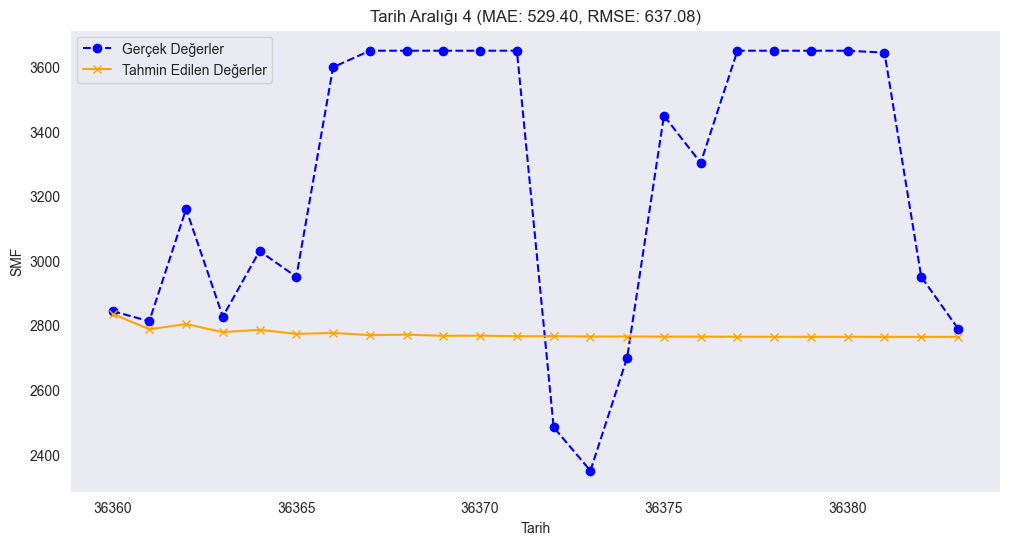


Tarih Aralığı 5: Eğitim 2023-02-24 23:00 - Test 2023-02-25 00:00 ile 2023-02-25 23:00
                               SARIMAX Results                                
Dep. Variable:                    Smf   No. Observations:                36384
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -256292.444
Date:                Mon, 20 Jan 2025   AIC                         512594.889
Time:                        13:21:05   BIC                         512637.398
Sample:                             0   HQIC                        512608.404
                              - 36384                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0525      0.012      4.514      0.000       0.030       0.075
ar.L2          0.5380      0.009     56.706 

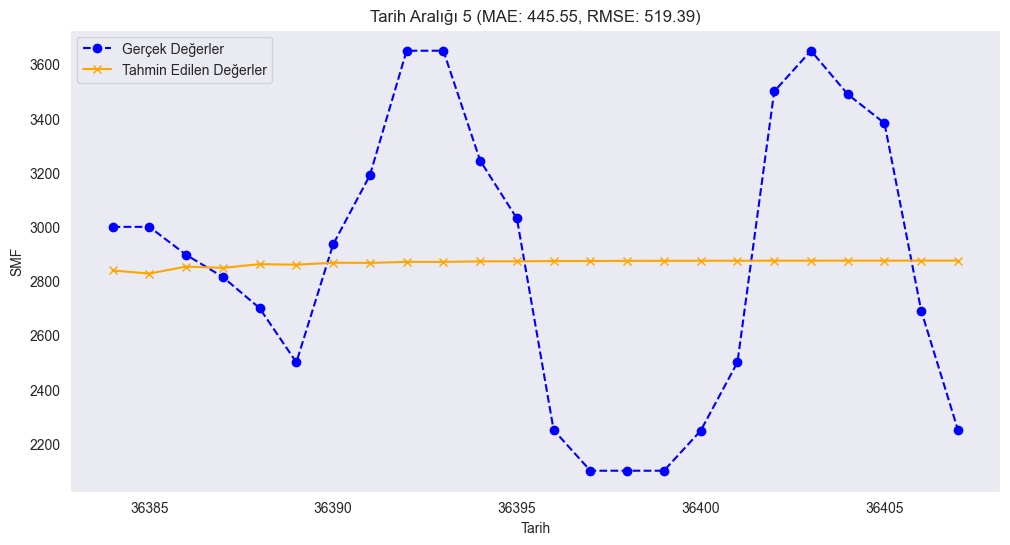


Tarih Aralığı 6: Eğitim 2023-02-25 23:00 - Test 2023-02-26 00:00 ile 2023-02-26 23:00
                               SARIMAX Results                                
Dep. Variable:                    Smf   No. Observations:                36408
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -256467.589
Date:                Mon, 20 Jan 2025   AIC                         512945.178
Time:                        13:21:25   BIC                         512987.691
Sample:                             0   HQIC                        512958.694
                              - 36408                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0530      0.012      4.570      0.000       0.030       0.076
ar.L2          0.5376      0.009     56.766 

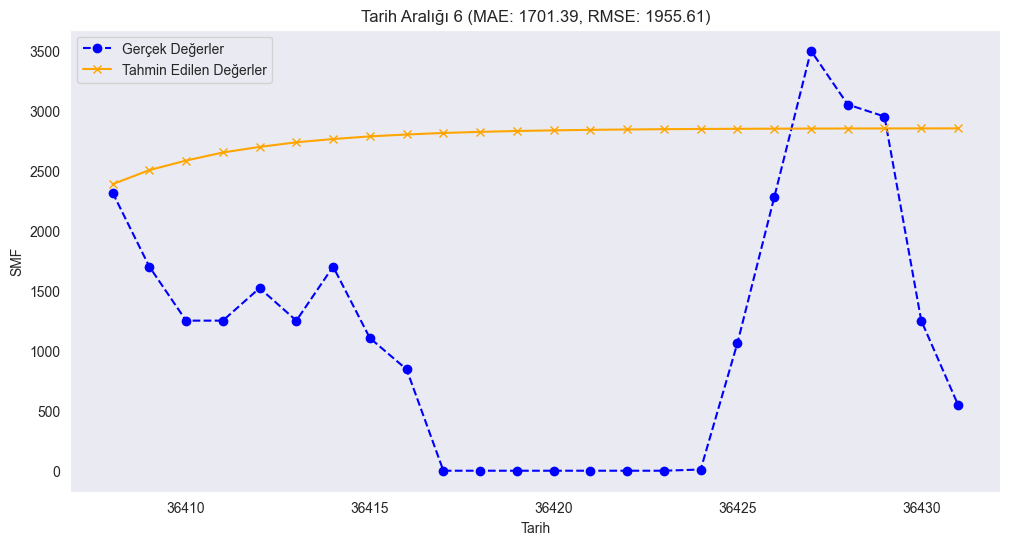


Tarih Aralığı 7: Eğitim 2023-02-26 23:00 - Test 2023-02-27 00:00 ile 2023-02-27 23:00


C:\Users\Alper\PycharmProjects\LearningFromDataPrj\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    Smf   No. Observations:                36432
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -256756.469
Date:                Mon, 20 Jan 2025   AIC                         513522.938
Time:                        13:21:51   BIC                         513565.454
Sample:                             0   HQIC                        513536.455
                              - 36432                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2259      0.025     48.098      0.000       1.176       1.276
ar.L2         -0.3757      0.019    -19.328      0.000      -0.414      -0.338
ma.L1         -1.3955      0.026    -53.649      0.0

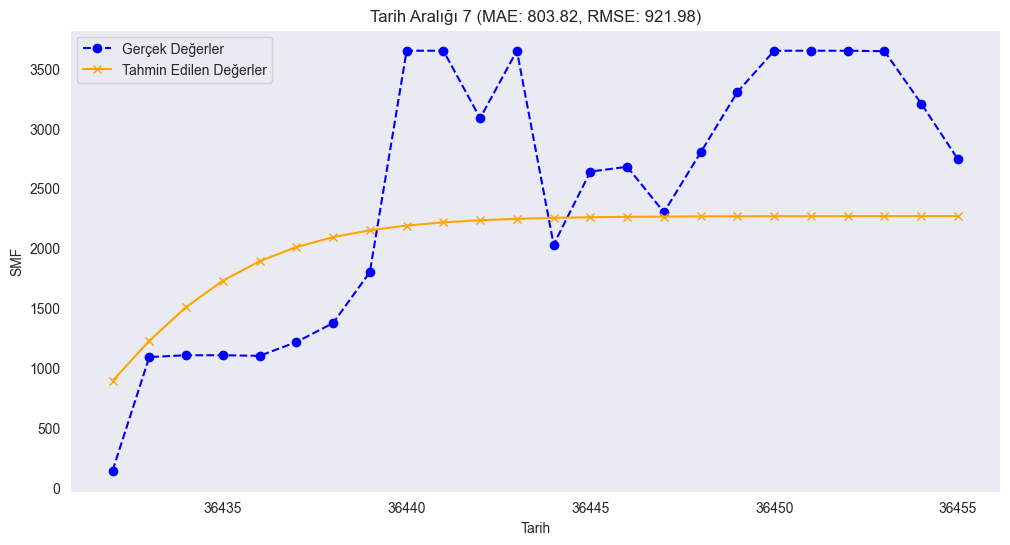


Tüm Tarih Aralıklarının Sonuçları:
                                Tarih Aralığı          MAE         RMSE
0         2023-02-21 00:00 - 2023-02-21 23:00   608.362532   730.666855
1         2023-02-22 00:00 - 2023-02-22 23:00   606.680229   689.838195
2         2023-02-23 00:00 - 2023-02-23 23:00   485.315025   624.116418
3         2023-02-24 00:00 - 2023-02-24 23:00   529.398740   637.081117
4         2023-02-25 00:00 - 2023-02-25 23:00   445.546837   519.388794
5         2023-02-26 00:00 - 2023-02-26 23:00  1701.393771  1955.608768
6         2023-02-27 00:00 - 2023-02-27 23:00   803.815216   921.977027
Ortalama                             Ortalama   740.073193   868.382453


In [8]:
# ARIMAModel sınıfını içe aktar
from src.models.ARIMA import ARIMAModel
import pandas as pd
import matplotlib.pyplot as plt

# 1. Veri Yolu ve Hedef Değişken
file_path = "processed_dataset_with_features.csv"
target_column = "Smf"

# 2. Model Sınıfını Başlat
arima_model = ARIMAModel(file_path, target_column)

# 3. Veriyi Yükle ve Ön İşle
data = arima_model.load_and_preprocess_data()

# 4. Tarih Sütunu Kontrolü ve Formatlama
if 'Tarih' not in data.columns:
    raise ValueError("Veri setinde 'Tarih' sütunu bulunamadı!")
data['Tarih'] = pd.to_datetime(data['Tarih'])
data = data.sort_values(by='Tarih')

# Test tarih aralıklarını tanımlayın
date_ranges = [
    {"train_end_date": "2023-02-20 23:00", "test_start_date": "2023-02-21 00:00", "test_end_date": "2023-02-21 23:00"},
    {"train_end_date": "2023-02-21 23:00", "test_start_date": "2023-02-22 00:00", "test_end_date": "2023-02-22 23:00"},
    {"train_end_date": "2023-02-22 23:00", "test_start_date": "2023-02-23 00:00", "test_end_date": "2023-02-23 23:00"},
    {"train_end_date": "2023-02-23 23:00", "test_start_date": "2023-02-24 00:00", "test_end_date": "2023-02-24 23:00"},
    {"train_end_date": "2023-02-24 23:00", "test_start_date": "2023-02-25 00:00", "test_end_date": "2023-02-25 23:00"},
    {"train_end_date": "2023-02-25 23:00", "test_start_date": "2023-02-26 00:00", "test_end_date": "2023-02-26 23:00"},
    {"train_end_date": "2023-02-26 23:00", "test_start_date": "2023-02-27 00:00", "test_end_date": "2023-02-27 23:00"},
]

# Performans sonuçlarını saklamak için bir liste
results = []

# Her tarih aralığı için modeli eğit ve test et
for i, date_range in enumerate(date_ranges):
    print(f"\nTarih Aralığı {i + 1}: Eğitim {date_range['train_end_date']} - Test {date_range['test_start_date']} ile {date_range['test_end_date']}")

    # Eğitim ve test veri setlerini oluştur
    train_data = data[data['Tarih'] <= pd.to_datetime(date_range['train_end_date'])][target_column]
    test_data = data[
        (data['Tarih'] >= pd.to_datetime(date_range['test_start_date'])) & (data['Tarih'] <= pd.to_datetime(date_range['test_end_date']))
    ][target_column]

    if train_data.empty or test_data.empty:
        print("Eğitim veya test veri seti boş! Bu aralık atlanıyor.")
        continue

    # ARIMA parametrelerini belirle
    p, d, q = 2, 1, 2  # Optimum parametreler ihtiyaca göre değiştirilebilir

    # Modeli eğit ve tahmin yap
    model_fit = arima_model.train_model(train_data, p, d, q)
    predictions, mae, rmse = arima_model.predict_and_evaluate(test_data)

    # Sonuçları sakla
    results.append({"Tarih Aralığı": f"{date_range['test_start_date']} - {date_range['test_end_date']}", "MAE": mae, "RMSE": rmse})

    # Tahminleri görselleştir
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index, test_data.values, label='Gerçek Değerler', color='blue', marker='o', linestyle='--')
    plt.plot(test_data.index, predictions, label='Tahmin Edilen Değerler', color='orange', marker='x', linestyle='-')
    plt.title(f"Tarih Aralığı {i + 1} (MAE: {mae:.2f}, RMSE: {rmse:.2f})")
    plt.xlabel("Tarih")
    plt.ylabel("SMF")
    plt.legend()
    plt.grid()
    plt.show()

# Performans sonuçlarını göster
results_df = pd.DataFrame(results)

# Ortalamaları ekle
average_mae = results_df['MAE'].mean()
average_rmse = results_df['RMSE'].mean()

results_df.loc["Ortalama"] = ["Ortalama", average_mae, average_rmse]

print("\nTüm Tarih Aralıklarının Sonuçları:")
print(results_df)


SARIMA Univariant


Tarih Aralığı 1: Eğitim 2023-02-15 00:00 - 2023-02-20 23:00, Test 2023-02-21 00:00 ile 2023-02-21 23:00
                                     SARIMAX Results                                      
Dep. Variable:                                Smf   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                -933.135
Date:                            Mon, 20 Jan 2025   AIC                           1876.269
Time:                                    13:50:17   BIC                           1890.165
Sample:                                         0   HQIC                          1881.912
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1    

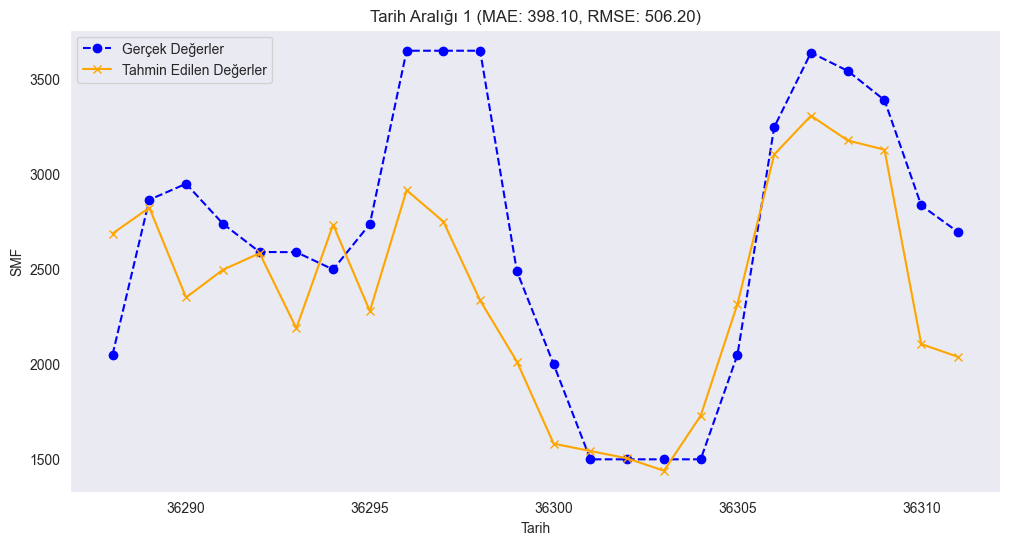


Tarih Aralığı 2: Eğitim 2023-02-16 00:00 - 2023-02-21 23:00, Test 2023-02-22 00:00 ile 2023-02-22 23:00
                                     SARIMAX Results                                      
Dep. Variable:                                Smf   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                -933.346
Date:                            Mon, 20 Jan 2025   AIC                           1876.692
Time:                                    13:50:20   BIC                           1890.588
Sample:                                         0   HQIC                          1882.335
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1    

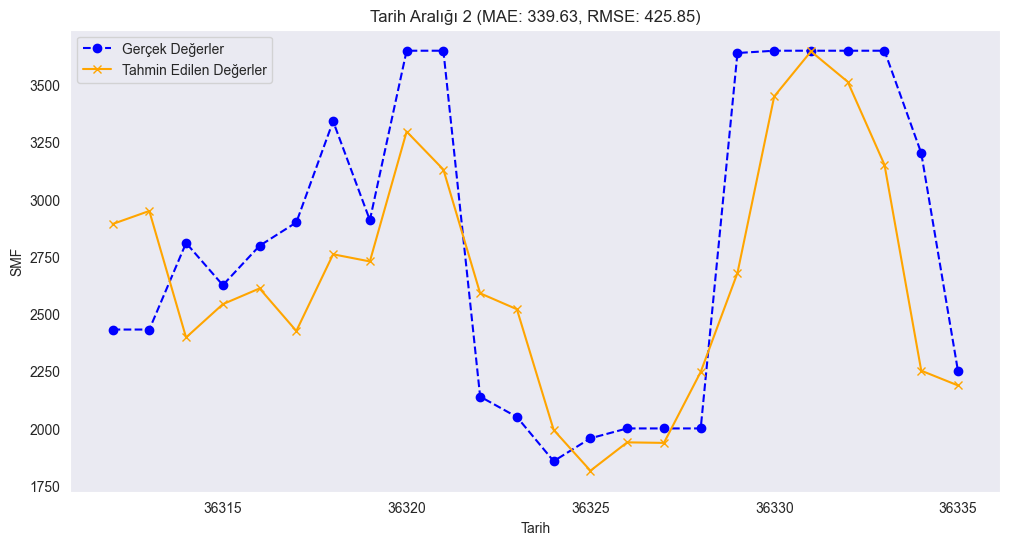


Tarih Aralığı 3: Eğitim 2023-02-17 00:00 - 2023-02-22 23:00, Test 2023-02-23 00:00 ile 2023-02-23 23:00
                                     SARIMAX Results                                      
Dep. Variable:                                Smf   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                -935.664
Date:                            Mon, 20 Jan 2025   AIC                           1881.327
Time:                                    13:50:24   BIC                           1895.223
Sample:                                         0   HQIC                          1886.970
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1    

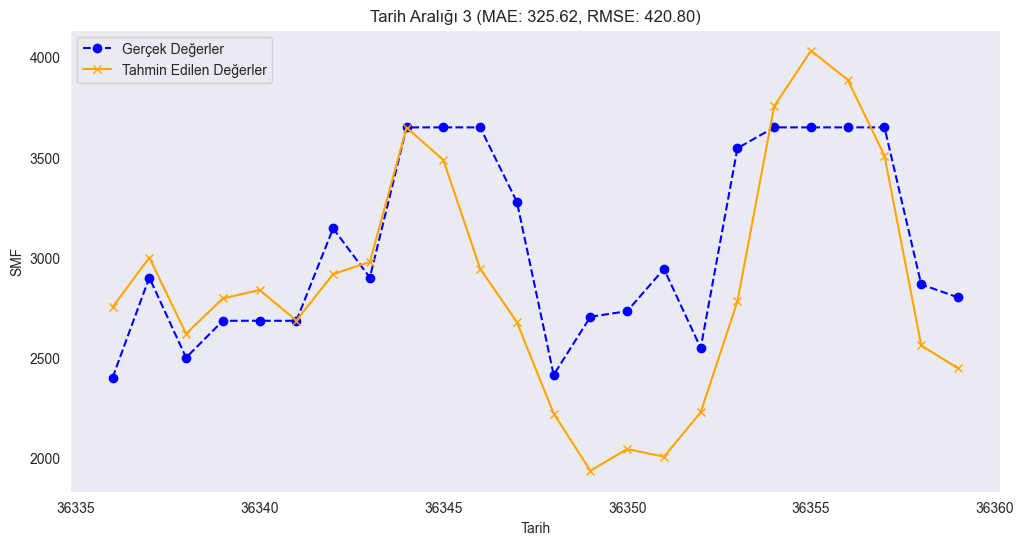


Tarih Aralığı 4: Eğitim 2023-02-18 00:00 - 2023-02-23 23:00, Test 2023-02-24 00:00 ile 2023-02-24 23:00
                                     SARIMAX Results                                      
Dep. Variable:                                Smf   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                -928.195
Date:                            Mon, 20 Jan 2025   AIC                           1866.390
Time:                                    13:50:27   BIC                           1880.286
Sample:                                         0   HQIC                          1872.033
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1    

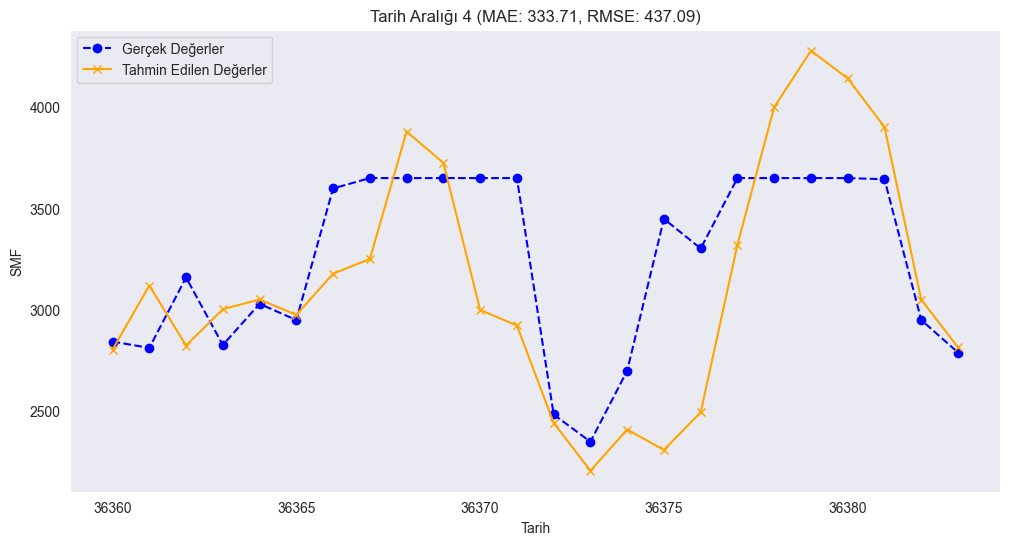


Tarih Aralığı 5: Eğitim 2023-02-19 00:00 - 2023-02-24 23:00, Test 2023-02-25 00:00 ile 2023-02-25 23:00
                                     SARIMAX Results                                      
Dep. Variable:                                Smf   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                -920.484
Date:                            Mon, 20 Jan 2025   AIC                           1850.968
Time:                                    13:50:31   BIC                           1864.864
Sample:                                         0   HQIC                          1856.611
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1    

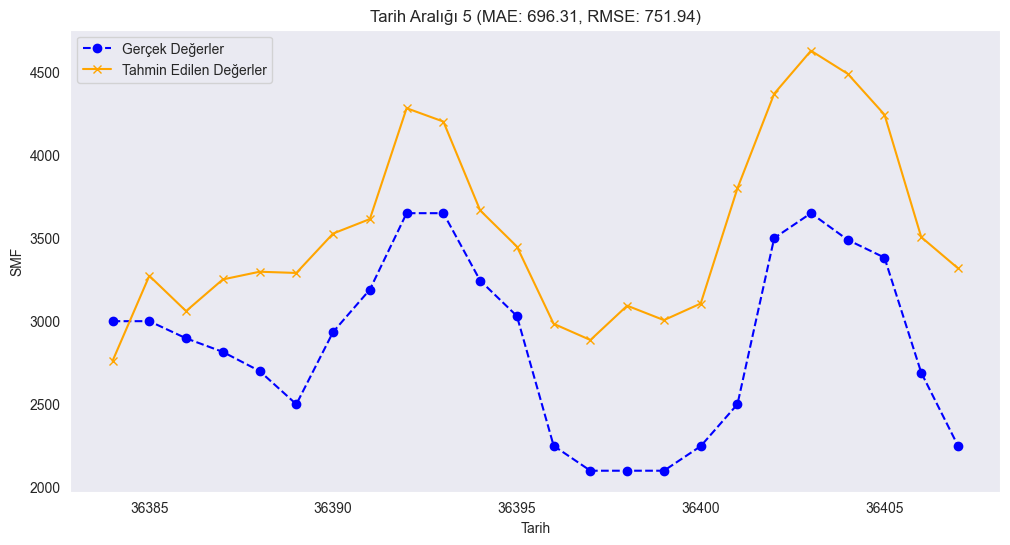


Tarih Aralığı 6: Eğitim 2023-02-20 00:00 - 2023-02-25 23:00, Test 2023-02-26 00:00 ile 2023-02-26 23:00
                                     SARIMAX Results                                      
Dep. Variable:                                Smf   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                -895.478
Date:                            Mon, 20 Jan 2025   AIC                           1800.956
Time:                                    13:50:36   BIC                           1814.852
Sample:                                         0   HQIC                          1806.599
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1    

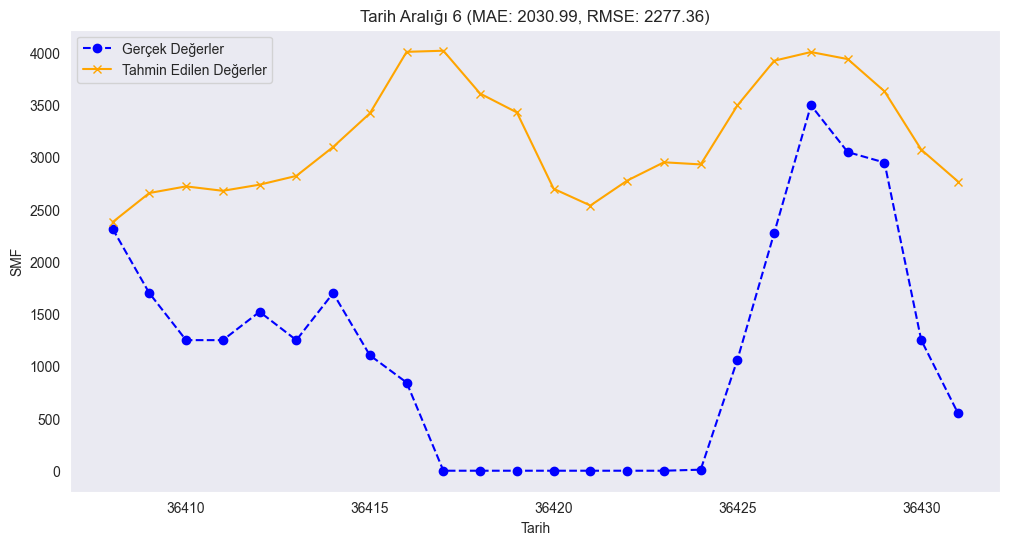


Tarih Aralığı 7: Eğitim 2023-02-21 00:00 - 2023-02-26 23:00, Test 2023-02-27 00:00 ile 2023-02-27 23:00
                                     SARIMAX Results                                      
Dep. Variable:                                Smf   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                -888.025
Date:                            Mon, 20 Jan 2025   AIC                           1786.050
Time:                                    13:50:38   BIC                           1799.946
Sample:                                         0   HQIC                          1791.693
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1    

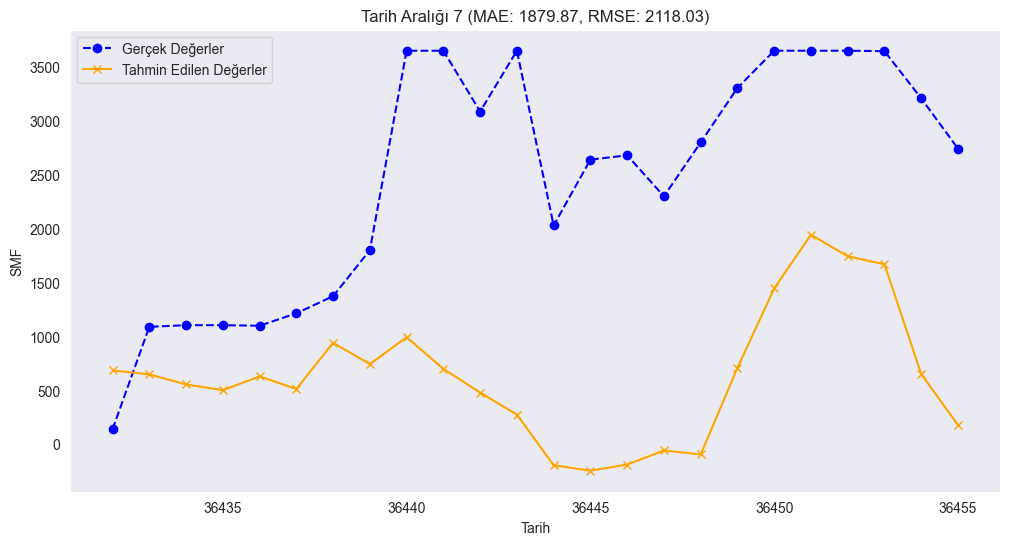


Tüm Tarih Aralıklarının Sonuçları:
                                Tarih Aralığı          MAE         RMSE
0         2023-02-21 00:00 - 2023-02-21 23:00   398.099314   506.203026
1         2023-02-22 00:00 - 2023-02-22 23:00   339.626197   425.854758
2         2023-02-23 00:00 - 2023-02-23 23:00   325.619771   420.795147
3         2023-02-24 00:00 - 2023-02-24 23:00   333.710254   437.090133
4         2023-02-25 00:00 - 2023-02-25 23:00   696.306357   751.937173
5         2023-02-26 00:00 - 2023-02-26 23:00  2030.994037  2277.362402
6         2023-02-27 00:00 - 2023-02-27 23:00  1879.873770  2118.028985
Ortalama                             Ortalama   857.747100   991.038804


In [13]:
# SARIMAModel sınıfını içe aktar
from src.models.SARIMAUnivariant import SARIMAModel
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


# 1. Veri Yolu ve Hedef Değişken
file_path = "processed_dataset_with_features.csv"
target_column = "Smf"

# 2. Model Sınıfını Başlat
sarima_model = SARIMAModel(file_path, target_column)

# 3. Veriyi Yükle ve Ön İşle
data = sarima_model.load_and_preprocess_data()

# 4. Tarih Sütunu Kontrolü ve Formatlama
if 'Tarih' not in data.columns:
    raise ValueError("Veri setinde 'Tarih' sütunu bulunamadı!")
data['Tarih'] = pd.to_datetime(data['Tarih'])
data = data.sort_values(by='Tarih')

# Test tarih aralıklarını tanımlayın
date_ranges = [
    {"train_start_date": "2023-02-15 00:00", "train_end_date": "2023-02-20 23:00", "test_start_date": "2023-02-21 00:00", "test_end_date": "2023-02-21 23:00"},
    {"train_start_date": "2023-02-16 00:00", "train_end_date": "2023-02-21 23:00", "test_start_date": "2023-02-22 00:00", "test_end_date": "2023-02-22 23:00"},
    {"train_start_date": "2023-02-17 00:00", "train_end_date": "2023-02-22 23:00", "test_start_date": "2023-02-23 00:00", "test_end_date": "2023-02-23 23:00"},
    {"train_start_date": "2023-02-18 00:00", "train_end_date": "2023-02-23 23:00", "test_start_date": "2023-02-24 00:00", "test_end_date": "2023-02-24 23:00"},
    {"train_start_date": "2023-02-19 00:00", "train_end_date": "2023-02-24 23:00", "test_start_date": "2023-02-25 00:00", "test_end_date": "2023-02-25 23:00"},
    {"train_start_date": "2023-02-20 00:00", "train_end_date": "2023-02-25 23:00", "test_start_date": "2023-02-26 00:00", "test_end_date": "2023-02-26 23:00"},
    {"train_start_date": "2023-02-21 00:00", "train_end_date": "2023-02-26 23:00", "test_start_date": "2023-02-27 00:00", "test_end_date": "2023-02-27 23:00"},
]

# Performans sonuçlarını saklamak için bir liste
results = []

# Her tarih aralığı için modeli eğit ve test et
for i, date_range in enumerate(date_ranges):
    print(f"\nTarih Aralığı {i + 1}: Eğitim {date_range['train_start_date']} - {date_range['train_end_date']}, Test {date_range['test_start_date']} ile {date_range['test_end_date']}")

    # Eğitim ve test veri setlerini oluştur
    train_data = data[(data['Tarih'] >= pd.to_datetime(date_range['train_start_date'])) & (data['Tarih'] <= pd.to_datetime(date_range['train_end_date']))][target_column]
    test_data = data[
        (data['Tarih'] >= pd.to_datetime(date_range['test_start_date'])) & (data['Tarih'] <= pd.to_datetime(date_range['test_end_date']))
    ][target_column]

    if train_data.empty or test_data.empty:
        print("Eğitim veya test veri seti boş! Bu aralık atlanıyor.")
        continue

    # SARIMA parametrelerini belirle
    p, d, q = 1, 1, 1
    P, D, Q, s = 1, 1, 1, 24  # Mevsimsel parametreler (24 saatlik döngü)

    # Modeli eğit ve tahmin yap
    model_fit = sarima_model.train_model(train_data, p, d, q, P, D, Q, s)
    predictions, mae, rmse = sarima_model.predict_and_evaluate(test_data)

    # Sonuçları sakla
    results.append({"Tarih Aralığı": f"{date_range['test_start_date']} - {date_range['test_end_date']}", "MAE": mae, "RMSE": rmse})

    # Tahminleri görselleştir
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index, test_data.values, label='Gerçek Değerler', color='blue', marker='o', linestyle='--')
    plt.plot(test_data.index, predictions, label='Tahmin Edilen Değerler', color='orange', marker='x', linestyle='-')
    plt.title(f"Tarih Aralığı {i + 1} (MAE: {mae:.2f}, RMSE: {rmse:.2f})")
    plt.xlabel("Tarih")
    plt.ylabel("SMF")
    plt.legend()
    plt.grid()
    plt.show()

# Performans sonuçlarını göster
results_df = pd.DataFrame(results)

# Ortalamaları ekle
average_mae = results_df['MAE'].mean()
average_rmse = results_df['RMSE'].mean()

results_df.loc["Ortalama"] = ["Ortalama", average_mae, average_rmse]

print("\nTüm Tarih Aralıklarının Sonuçları:")
print(results_df)


SARIMA Multivariant


Tarih Aralığı 1: Eğitim 2023-02-15 00:00 - 2023-02-20 23:00 ve Test 2023-02-21 00:00 - 2023-02-21 23:00
                                     SARIMAX Results                                      
Dep. Variable:                                Smf   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                -724.806
Date:                            Mon, 20 Jan 2025   AIC                           1477.612
Time:                                    14:02:20   BIC                           1513.069
Sample:                                         0   HQIC                          1491.928
                                            - 144                                         
Covariance Type:                              opg                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

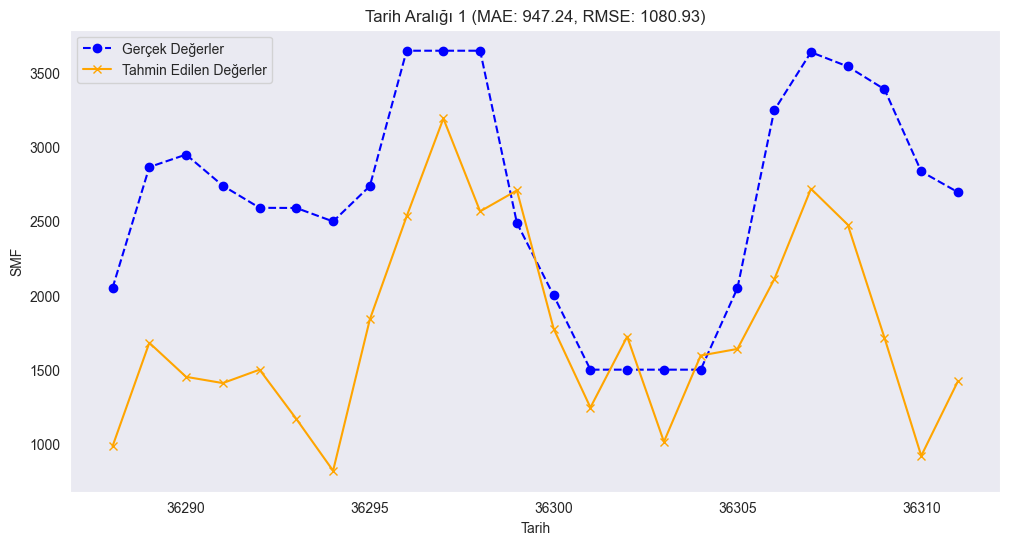


Tarih Aralığı 2: Eğitim 2023-02-16 00:00 - 2023-02-21 23:00 ve Test 2023-02-22 00:00 - 2023-02-22 23:00
                                     SARIMAX Results                                      
Dep. Variable:                                Smf   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                -723.951
Date:                            Mon, 20 Jan 2025   AIC                           1475.903
Time:                                    14:02:45   BIC                           1511.359
Sample:                                         0   HQIC                          1490.219
                                            - 144                                         
Covariance Type:                              opg                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

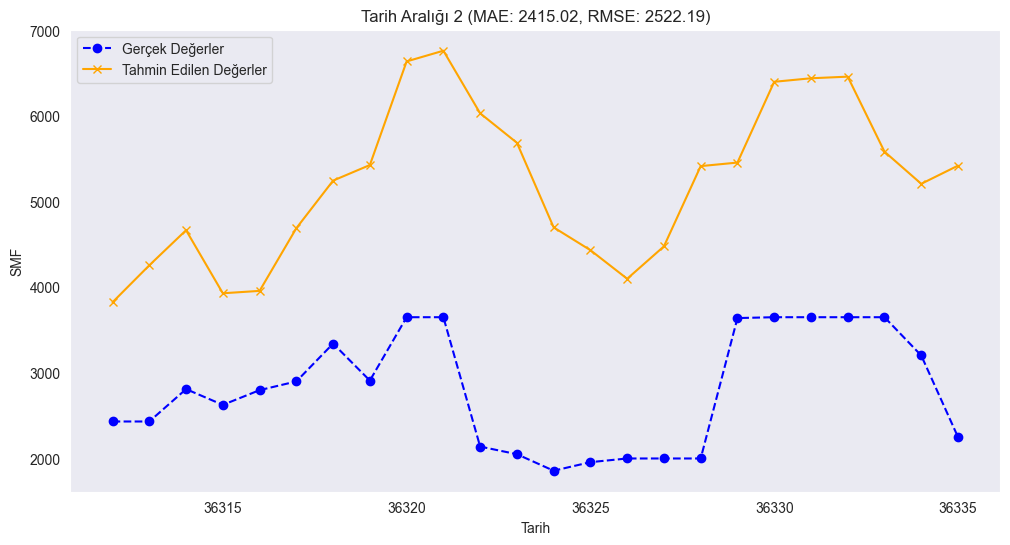


Tarih Aralığı 3: Eğitim 2023-02-17 00:00 - 2023-02-22 23:00 ve Test 2023-02-23 00:00 - 2023-02-23 23:00
                                     SARIMAX Results                                      
Dep. Variable:                                Smf   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                -726.323
Date:                            Mon, 20 Jan 2025   AIC                           1480.646
Time:                                    14:02:48   BIC                           1516.103
Sample:                                         0   HQIC                          1494.962
                                            - 144                                         
Covariance Type:                              opg                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

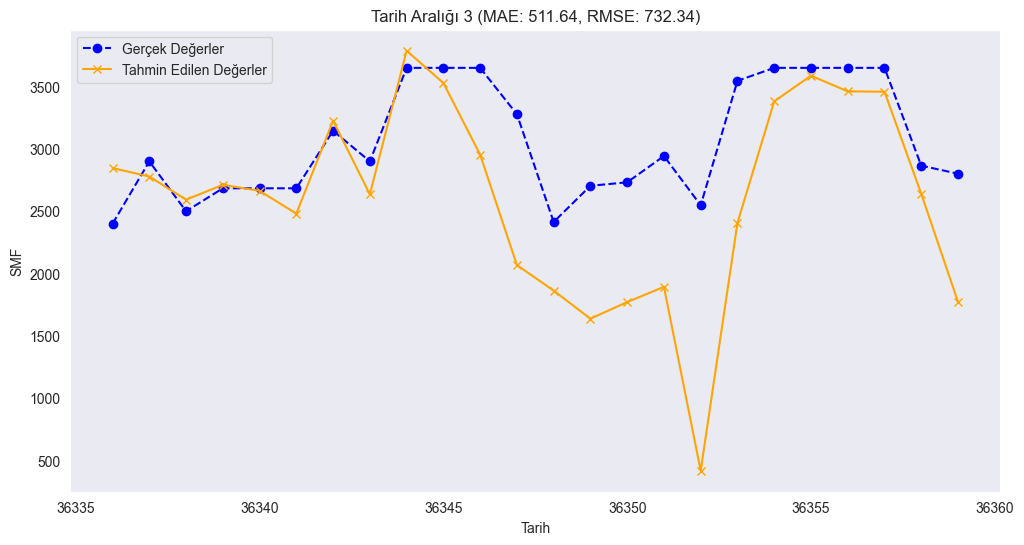


Tarih Aralığı 4: Eğitim 2023-02-18 00:00 - 2023-02-23 23:00 ve Test 2023-02-24 00:00 - 2023-02-24 23:00
                                     SARIMAX Results                                      
Dep. Variable:                                Smf   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                -714.103
Date:                            Mon, 20 Jan 2025   AIC                           1456.206
Time:                                    14:02:50   BIC                           1491.662
Sample:                                         0   HQIC                          1470.522
                                            - 144                                         
Covariance Type:                              opg                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

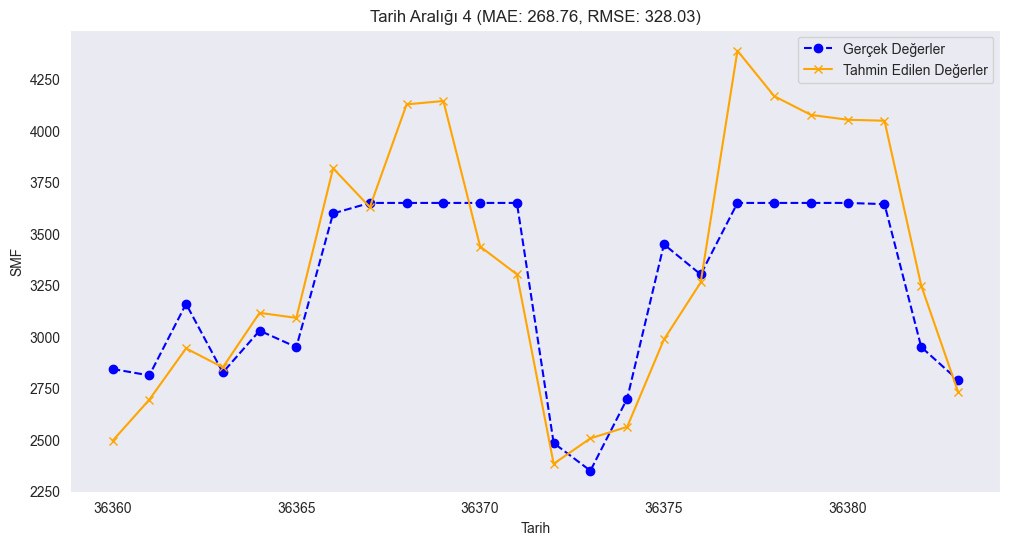


Tarih Aralığı 5: Eğitim 2023-02-19 00:00 - 2023-02-24 23:00 ve Test 2023-02-25 00:00 - 2023-02-25 23:00
                                     SARIMAX Results                                      
Dep. Variable:                                Smf   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                -700.169
Date:                            Mon, 20 Jan 2025   AIC                           1428.337
Time:                                    14:02:51   BIC                           1463.794
Sample:                                         0   HQIC                          1442.654
                                            - 144                                         
Covariance Type:                              opg                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

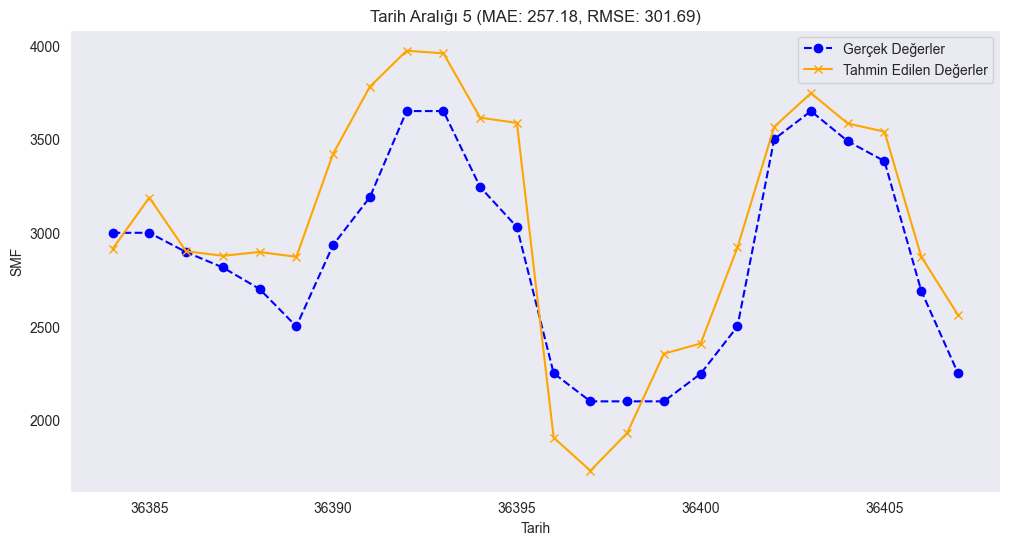


Tarih Aralığı 6: Eğitim 2023-02-20 00:00 - 2023-02-25 23:00 ve Test 2023-02-26 00:00 - 2023-02-26 23:00
                                     SARIMAX Results                                      
Dep. Variable:                                Smf   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                -679.753
Date:                            Mon, 20 Jan 2025   AIC                           1387.506
Time:                                    14:02:54   BIC                           1422.963
Sample:                                         0   HQIC                          1401.823
                                            - 144                                         
Covariance Type:                              opg                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

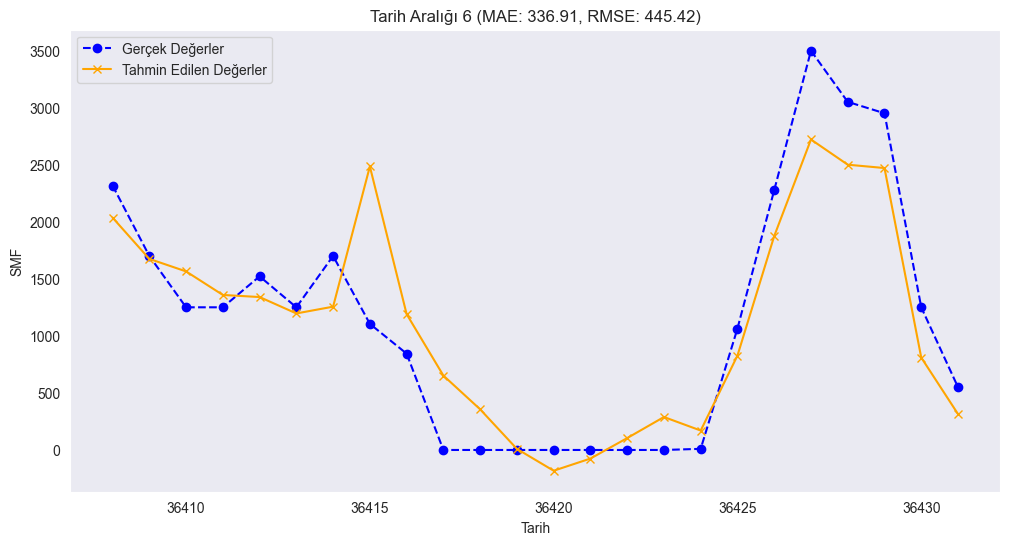


Tarih Aralığı 7: Eğitim 2023-02-21 00:00 - 2023-02-26 23:00 ve Test 2023-02-27 00:00 - 2023-02-27 23:00
                                     SARIMAX Results                                      
Dep. Variable:                                Smf   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                -661.396
Date:                            Mon, 20 Jan 2025   AIC                           1350.791
Time:                                    14:03:26   BIC                           1386.248
Sample:                                         0   HQIC                          1365.108
                                            - 144                                         
Covariance Type:                              opg                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

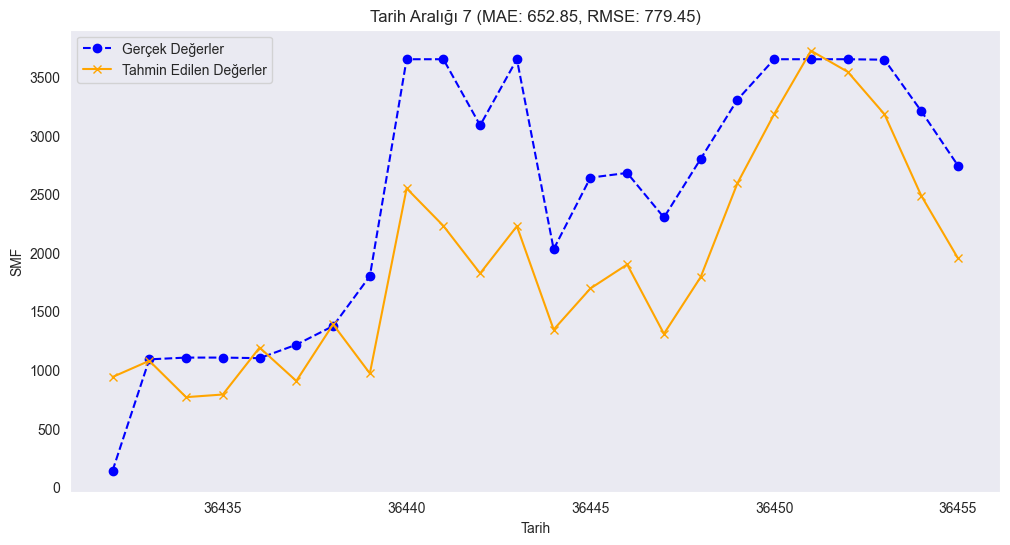


Tüm Tarih Aralıklarının Sonuçları:
                                Tarih Aralığı          MAE         RMSE
0         2023-02-21 00:00 - 2023-02-21 23:00   947.237824  1080.925792
1         2023-02-22 00:00 - 2023-02-22 23:00  2415.024668  2522.193766
2         2023-02-23 00:00 - 2023-02-23 23:00   511.639376   732.340880
3         2023-02-24 00:00 - 2023-02-24 23:00   268.758635   328.031682
4         2023-02-25 00:00 - 2023-02-25 23:00   257.179434   301.694841
5         2023-02-26 00:00 - 2023-02-26 23:00   336.914431   445.416037
6         2023-02-27 00:00 - 2023-02-27 23:00   652.848848   779.453586
Ortalama                             Ortalama   769.943317   884.293798


In [4]:

from src.models.SARIMAMultiv import SARIMAModell
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Özellikler listesi
features = [
    'Ptf',
    'Maxeslesmefiyati',
    'Maxalisfiyati',
    'Arzislemhacmi',
    'Talepislemhacmi',
    'Talepislemhacmi_rolling_mean',
    'Talepislemhacmi_rolling_sum',
    'Ptfeuro',
    'Ptfdolar'
]

# 1. Veri Yolu ve Hedef Değişken
file_path = "processed_dataset_with_features.csv"
target_column = "Smf"

# 2. Model Sınıfını Başlat
sarima_model = SARIMAModell(file_path, target_column, features)

# 3. Veriyi Yükle ve Ön İşle
data = sarima_model.load_and_preprocess_data()

# Test tarih aralıklarını tanımlayın
date_ranges = [
    {"train_start_date": "2023-02-15 00:00", "train_end_date": "2023-02-20 23:00", "test_start_date": "2023-02-21 00:00", "test_end_date": "2023-02-21 23:00"},
    {"train_start_date": "2023-02-16 00:00", "train_end_date": "2023-02-21 23:00", "test_start_date": "2023-02-22 00:00", "test_end_date": "2023-02-22 23:00"},
    {"train_start_date": "2023-02-17 00:00", "train_end_date": "2023-02-22 23:00", "test_start_date": "2023-02-23 00:00", "test_end_date": "2023-02-23 23:00"},
    {"train_start_date": "2023-02-18 00:00", "train_end_date": "2023-02-23 23:00", "test_start_date": "2023-02-24 00:00", "test_end_date": "2023-02-24 23:00"},
    {"train_start_date": "2023-02-19 00:00", "train_end_date": "2023-02-24 23:00", "test_start_date": "2023-02-25 00:00", "test_end_date": "2023-02-25 23:00"},
    {"train_start_date": "2023-02-20 00:00", "train_end_date": "2023-02-25 23:00", "test_start_date": "2023-02-26 00:00", "test_end_date": "2023-02-26 23:00"},
    {"train_start_date": "2023-02-21 00:00", "train_end_date": "2023-02-26 23:00", "test_start_date": "2023-02-27 00:00", "test_end_date": "2023-02-27 23:00"},
]

# Performans sonuçlarını saklamak için bir liste
results = []

# Her tarih aralığı için modeli eğit ve test et
for i, date_range in enumerate(date_ranges):
    print(f"\nTarih Aralığı {i + 1}: Eğitim {date_range['train_start_date']} - {date_range['train_end_date']} ve Test {date_range['test_start_date']} - {date_range['test_end_date']}")

    # Eğitim ve test veri setlerini oluştur
    train_data = data[(data['Tarih'] >= pd.to_datetime(date_range['train_start_date'])) & 
                      (data['Tarih'] <= pd.to_datetime(date_range['train_end_date']))][target_column]
    test_data = data[(data['Tarih'] >= pd.to_datetime(date_range['test_start_date'])) & 
                     (data['Tarih'] <= pd.to_datetime(date_range['test_end_date']))][target_column]

    exogenous_train = data[(data['Tarih'] >= pd.to_datetime(date_range['train_start_date'])) & 
                           (data['Tarih'] <= pd.to_datetime(date_range['train_end_date']))][features]
    exogenous_test = data[(data['Tarih'] >= pd.to_datetime(date_range['test_start_date'])) & 
                          (data['Tarih'] <= pd.to_datetime(date_range['test_end_date']))][features]

    if train_data.empty or test_data.empty:
        print("Eğitim veya test veri seti boş! Bu aralık atlanıyor.")
        continue

    # SARIMAX parametrelerini belirle
    p, d, q = 1, 1, 1
    P, D, Q, s = 1, 1, 1, 24  # Mevsimsel parametreler (24 saatlik döngü)

    # Modeli eğit ve tahmin yap
    model_fit = sarima_model.train_model(train_data, exogenous_train, p, d, q, P, D, Q, s)
    predictions, mae, rmse = sarima_model.predict_and_evaluate(test_data, exogenous_test)

    # Sonuçları sakla
    results.append({"Tarih Aralığı": f"{date_range['test_start_date']} - {date_range['test_end_date']}", "MAE": mae, "RMSE": rmse})

    # Tahminleri görselleştir
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index, test_data.values, label='Gerçek Değerler', color='blue', marker='o', linestyle='--')
    plt.plot(test_data.index, predictions, label='Tahmin Edilen Değerler', color='orange', marker='x', linestyle='-')
    plt.title(f"Tarih Aralığı {i + 1} (MAE: {mae:.2f}, RMSE: {rmse:.2f})")
    plt.xlabel("Tarih")
    plt.ylabel("SMF")
    plt.legend()
    plt.grid()
    plt.show()

# Performans sonuçlarını göster
results_df = pd.DataFrame(results)

# Ortalamaları ekle
average_mae = results_df['MAE'].mean()
average_rmse = results_df['RMSE'].mean()

results_df.loc["Ortalama"] = ["Ortalama", average_mae, average_rmse]

print("\nTüm Tarih Aralıklarının Sonuçları:")
print(results_df)


Prophet

Importing plotly failed. Interactive plots will not work.



Tarih Aralığı 1: Eğitim 2023-02-20 23:00 - Test 2023-02-21 00:00 ile 2023-02-21 23:00


14:03:30 - cmdstanpy - INFO - Chain [1] start processing
14:03:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 708.57
Root Mean Squared Error (RMSE): 908.30


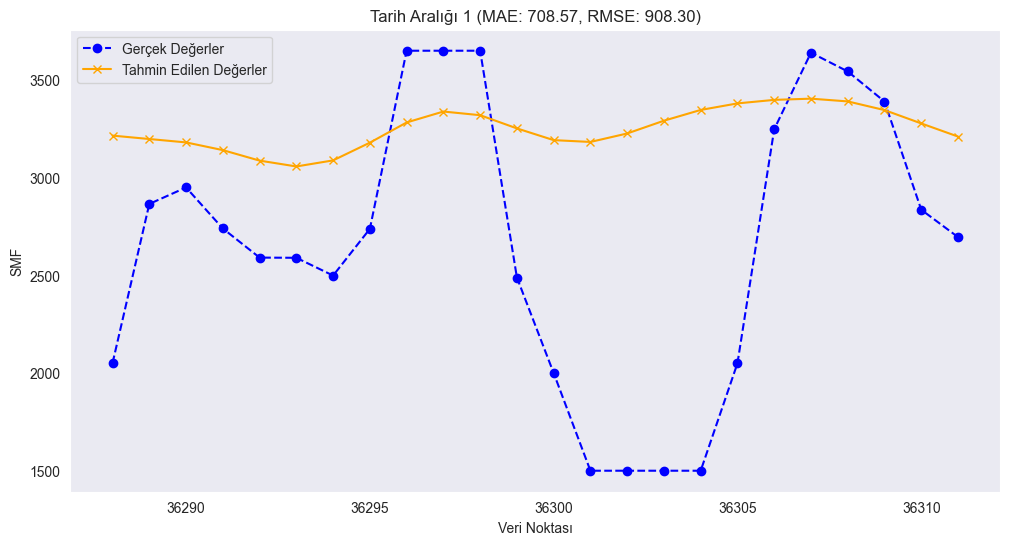


Tarih Aralığı 2: Eğitim 2023-02-21 23:00 - Test 2023-02-22 00:00 ile 2023-02-22 23:00


14:04:02 - cmdstanpy - INFO - Chain [1] start processing
14:04:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 612.58
Root Mean Squared Error (RMSE): 757.63


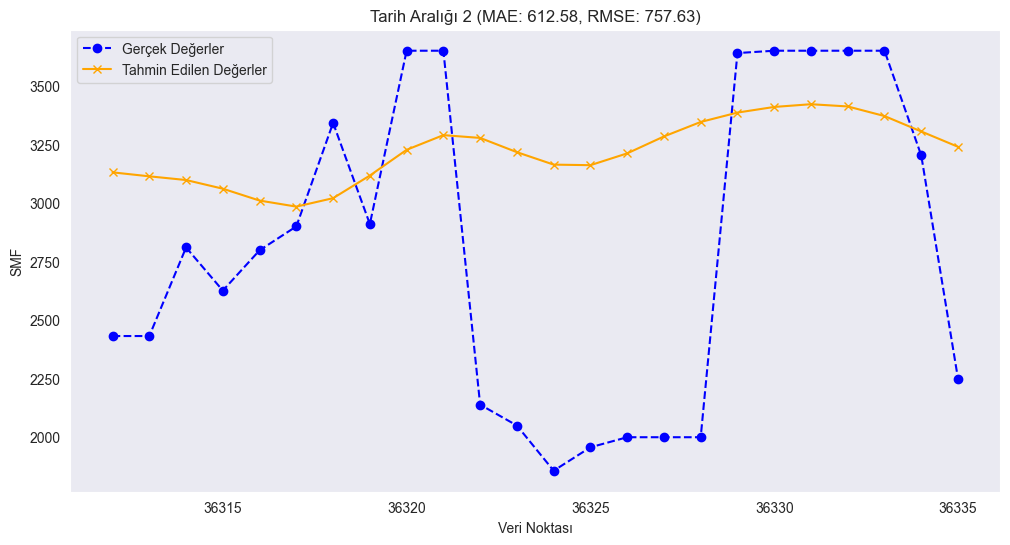


Tarih Aralığı 3: Eğitim 2023-02-22 23:00 - Test 2023-02-23 00:00 ile 2023-02-23 23:00


14:04:39 - cmdstanpy - INFO - Chain [1] start processing
14:05:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 384.46
Root Mean Squared Error (RMSE): 430.74


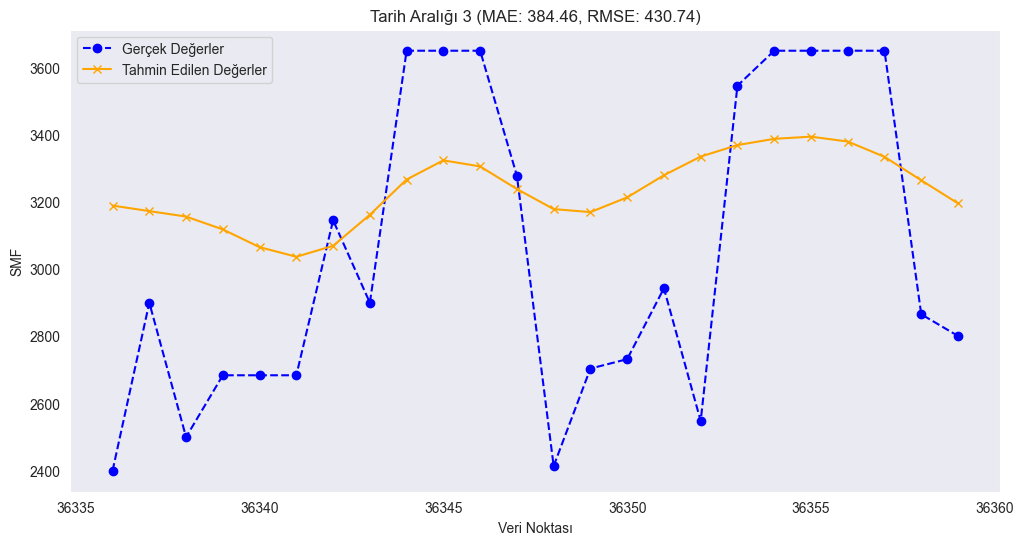


Tarih Aralığı 4: Eğitim 2023-02-23 23:00 - Test 2023-02-24 00:00 ile 2023-02-24 23:00


14:05:15 - cmdstanpy - INFO - Chain [1] start processing
14:05:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 329.95
Root Mean Squared Error (RMSE): 383.53


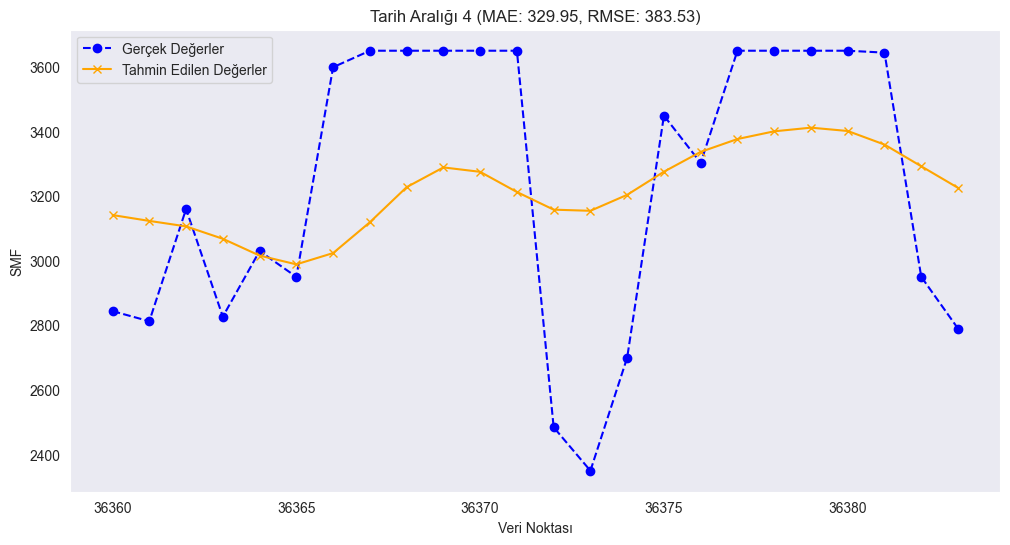


Tarih Aralığı 5: Eğitim 2023-02-24 23:00 - Test 2023-02-25 00:00 ile 2023-02-25 23:00


14:05:53 - cmdstanpy - INFO - Chain [1] start processing
14:06:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 457.94
Root Mean Squared Error (RMSE): 576.60


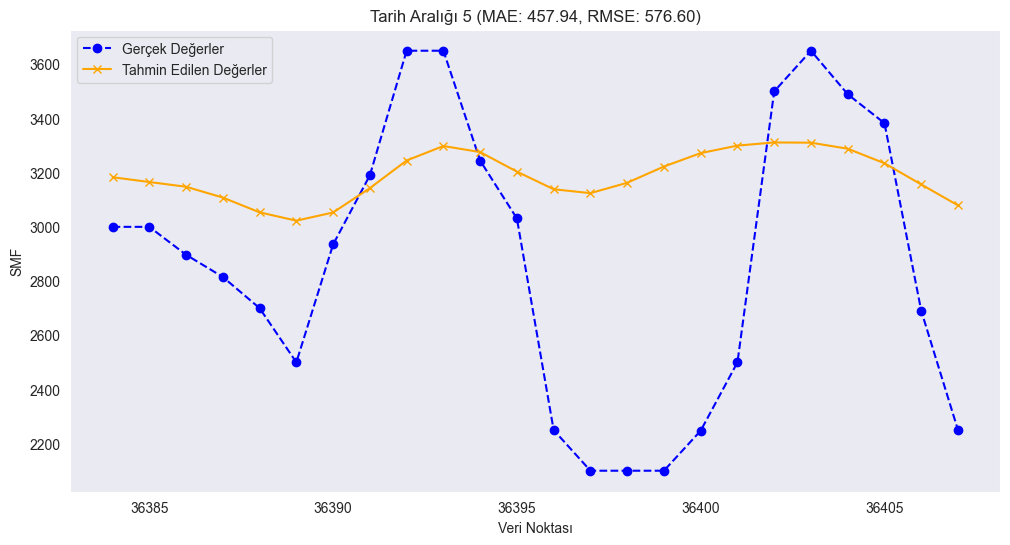


Tarih Aralığı 6: Eğitim 2023-02-25 23:00 - Test 2023-02-26 00:00 ile 2023-02-26 23:00


14:06:23 - cmdstanpy - INFO - Chain [1] start processing
14:06:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 1899.58
Root Mean Squared Error (RMSE): 2137.81


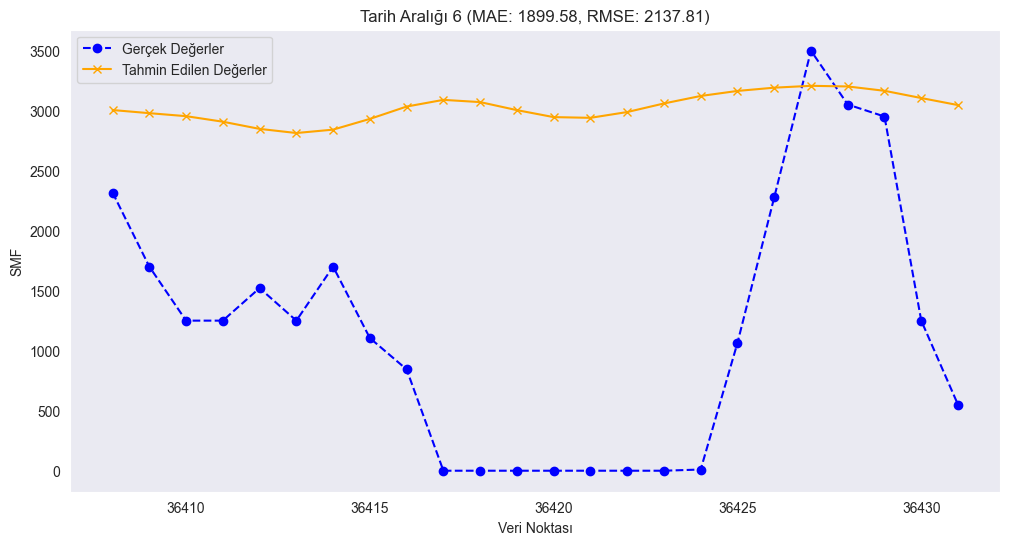


Tarih Aralığı 7: Eğitim 2023-02-26 23:00 - Test 2023-02-27 00:00 ile 2023-02-27 23:00


14:06:48 - cmdstanpy - INFO - Chain [1] start processing
14:07:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 869.64
Root Mean Squared Error (RMSE): 1131.60


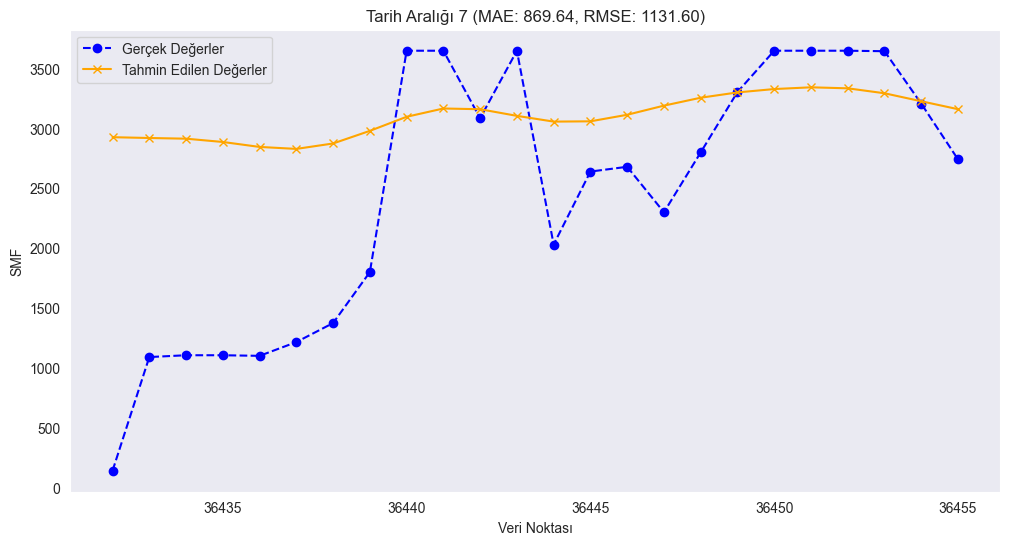


Tüm Tarih Aralıklarının Sonuçları:
                                Tarih Aralığı          MAE         RMSE
0         2023-02-21 00:00 - 2023-02-21 23:00   708.565542   908.299890
1         2023-02-22 00:00 - 2023-02-22 23:00   612.578838   757.629356
2         2023-02-23 00:00 - 2023-02-23 23:00   384.458587   430.735418
3         2023-02-24 00:00 - 2023-02-24 23:00   329.949149   383.532635
4         2023-02-25 00:00 - 2023-02-25 23:00   457.941271   576.603976
5         2023-02-26 00:00 - 2023-02-26 23:00  1899.583514  2137.812660
6         2023-02-27 00:00 - 2023-02-27 23:00   869.636084  1131.603841
Ortalama                             Ortalama   751.816141   903.745397


In [5]:
# ProphetModel sınıfını içe aktar
from src.models.Prophet import ProphetModel
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 1. Veri Yolu ve Hedef Değişken
file_path = "processed_dataset_with_features.csv"
target_column = "Smf"

# 2. Model Sınıfını Başlat
prophet_model = ProphetModel(file_path, target_column)

# 3. Veriyi Yükle ve Ön İşle
data = prophet_model.load_and_preprocess_data()

# 4. Tarih Sütunu Kontrolü ve Formatlama
if 'ds' not in data.columns:
    raise ValueError("Veri setinde 'ds' sütunu bulunamadı!")
data['ds'] = pd.to_datetime(data['ds'])
data = data.sort_values(by='ds')

# Test tarih aralıklarını tanımlayın
date_ranges = [
    {"train_end_date": "2023-02-20 23:00", "test_start_date": "2023-02-21 00:00", "test_end_date": "2023-02-21 23:00"},
    {"train_end_date": "2023-02-21 23:00", "test_start_date": "2023-02-22 00:00", "test_end_date": "2023-02-22 23:00"},
    {"train_end_date": "2023-02-22 23:00", "test_start_date": "2023-02-23 00:00", "test_end_date": "2023-02-23 23:00"},
    {"train_end_date": "2023-02-23 23:00", "test_start_date": "2023-02-24 00:00", "test_end_date": "2023-02-24 23:00"},
    {"train_end_date": "2023-02-24 23:00", "test_start_date": "2023-02-25 00:00", "test_end_date": "2023-02-25 23:00"},
    {"train_end_date": "2023-02-25 23:00", "test_start_date": "2023-02-26 00:00", "test_end_date": "2023-02-26 23:00"},
    {"train_end_date": "2023-02-26 23:00", "test_start_date": "2023-02-27 00:00", "test_end_date": "2023-02-27 23:00"},
]

# Performans sonuçlarını saklamak için bir liste
results = []

# Her tarih aralığı için modeli eğit ve test et
for i, date_range in enumerate(date_ranges):
    print(f"\nTarih Aralığı {i + 1}: Eğitim {date_range['train_end_date']} - Test {date_range['test_start_date']} ile {date_range['test_end_date']}")

    # Eğitim ve test veri setlerini oluştur
    train_data = data[data['ds'] <= pd.to_datetime(date_range['train_end_date'])]
    test_data = data[
        (data['ds'] >= pd.to_datetime(date_range['test_start_date'])) & (data['ds'] <= pd.to_datetime(date_range['test_end_date']))
    ]['y']

    if train_data.empty or test_data.empty:
        print("Eğitim veya test veri seti boş! Bu aralık atlanıyor.")
        continue

    # Modeli eğit ve tahmin yap
    model = prophet_model.train_model(train_data)
    predictions, mae, rmse = prophet_model.predict_and_evaluate(test_data, period=len(test_data))

    # Sonuçları sakla
    results.append({"Tarih Aralığı": f"{date_range['test_start_date']} - {date_range['test_end_date']}", "MAE": mae, "RMSE": rmse})

    # Tahminleri görselleştir
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index, test_data.values, label='Gerçek Değerler', color='blue', marker='o', linestyle='--')
    plt.plot(test_data.index, predictions, label='Tahmin Edilen Değerler', color='orange', marker='x', linestyle='-')
    plt.title(f"Tarih Aralığı {i + 1} (MAE: {mae:.2f}, RMSE: {rmse:.2f})")
    plt.xlabel("Veri Noktası")
    plt.ylabel("SMF")
    plt.legend()
    plt.grid()
    plt.show()

# Performans sonuçlarını göster
results_df = pd.DataFrame(results)

# Ortalamaları ekle
average_mae = results_df['MAE'].mean()
average_rmse = results_df['RMSE'].mean()

results_df.loc["Ortalama"] = ["Ortalama", average_mae, average_rmse]

print("\nTüm Tarih Aralıklarının Sonuçları:")
print(results_df)


LSTM Univariant


Tarih Aralığı 1: Eğitim 2019-01-01 00:00 - 2023-02-20 23:00 ve Test 2023-02-21 00:00 - 2023-02-21 23:00
Epoch 1/10


C:\Users\Alper\PycharmProjects\LearningFromDataPrj\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2268/2268 - 8s - 4ms/step - loss: 0.0056
Epoch 2/10
2268/2268 - 6s - 3ms/step - loss: 0.0037
Epoch 3/10
2268/2268 - 6s - 3ms/step - loss: 0.0036
Epoch 4/10
2268/2268 - 6s - 3ms/step - loss: 0.0036
Epoch 5/10
2268/2268 - 6s - 3ms/step - loss: 0.0035
Epoch 6/10
2268/2268 - 6s - 3ms/step - loss: 0.0035
Epoch 7/10
2268/2268 - 6s - 3ms/step - loss: 0.0035
Epoch 8/10
2268/2268 - 6s - 3ms/step - loss: 0.0035
Epoch 9/10
2268/2268 - 7s - 3ms/step - loss: 0.0035
Epoch 10/10
2268/2268 - 9s - 4ms/step - loss: 0.0034
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
Mean Absolute Error (MAE): 0.09
Root Mean Squared Error (RMSE): 0.12


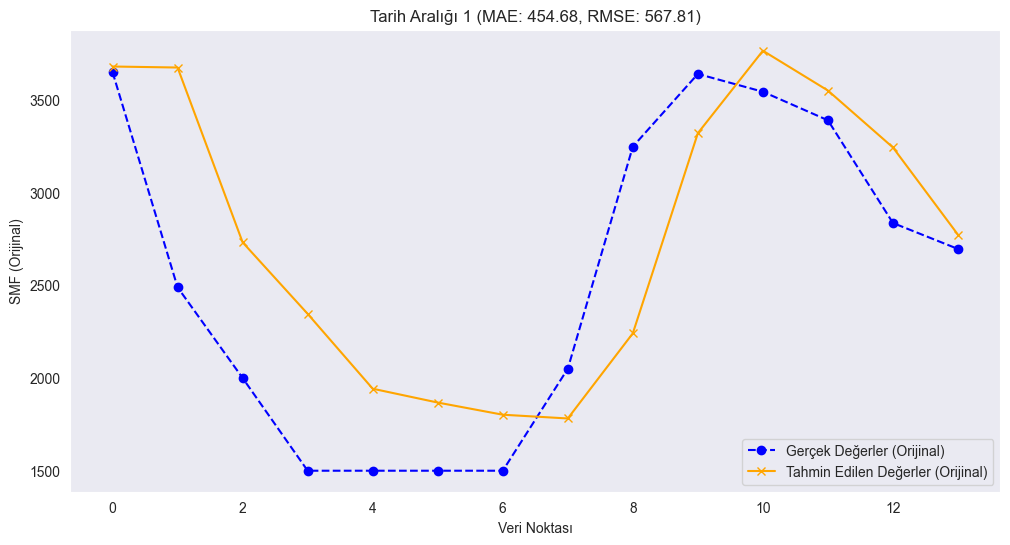


Tarih Aralığı 2: Eğitim 2019-01-01 00:00 - 2023-02-21 23:00 ve Test 2023-02-22 00:00 - 2023-02-22 23:00
Epoch 1/10


C:\Users\Alper\PycharmProjects\LearningFromDataPrj\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2269/2269 - 12s - 5ms/step - loss: 0.0057
Epoch 2/10
2269/2269 - 10s - 4ms/step - loss: 0.0037
Epoch 3/10
2269/2269 - 12s - 5ms/step - loss: 0.0037
Epoch 4/10
2269/2269 - 8s - 4ms/step - loss: 0.0036
Epoch 5/10
2269/2269 - 8s - 3ms/step - loss: 0.0036
Epoch 6/10
2269/2269 - 8s - 3ms/step - loss: 0.0035
Epoch 7/10
2269/2269 - 8s - 3ms/step - loss: 0.0035
Epoch 8/10
2269/2269 - 8s - 4ms/step - loss: 0.0035
Epoch 9/10
2269/2269 - 7s - 3ms/step - loss: 0.0035
Epoch 10/10
2269/2269 - 7s - 3ms/step - loss: 0.0035
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Mean Absolute Error (MAE): 0.08
Root Mean Squared Error (RMSE): 0.12


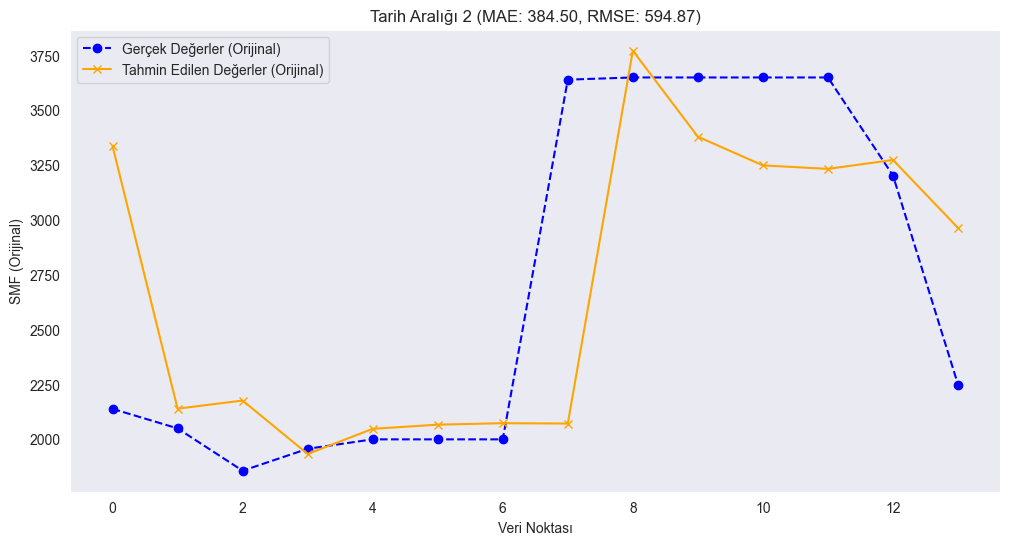


Tarih Aralığı 3: Eğitim 2019-01-01 00:00 - 2023-02-22 23:00 ve Test 2023-02-23 00:00 - 2023-02-23 23:00
Epoch 1/10


C:\Users\Alper\PycharmProjects\LearningFromDataPrj\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2271/2271 - 9s - 4ms/step - loss: 0.0064
Epoch 2/10
2271/2271 - 7s - 3ms/step - loss: 0.0038
Epoch 3/10
2271/2271 - 8s - 3ms/step - loss: 0.0037
Epoch 4/10
2271/2271 - 7s - 3ms/step - loss: 0.0036
Epoch 5/10
2271/2271 - 8s - 3ms/step - loss: 0.0036
Epoch 6/10
2271/2271 - 8s - 4ms/step - loss: 0.0036
Epoch 7/10
2271/2271 - 12s - 5ms/step - loss: 0.0036
Epoch 8/10
2271/2271 - 8s - 4ms/step - loss: 0.0036
Epoch 9/10
2271/2271 - 8s - 4ms/step - loss: 0.0035
Epoch 10/10
2271/2271 - 8s - 3ms/step - loss: 0.0035
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Mean Absolute Error (MAE): 0.06
Root Mean Squared Error (RMSE): 0.08


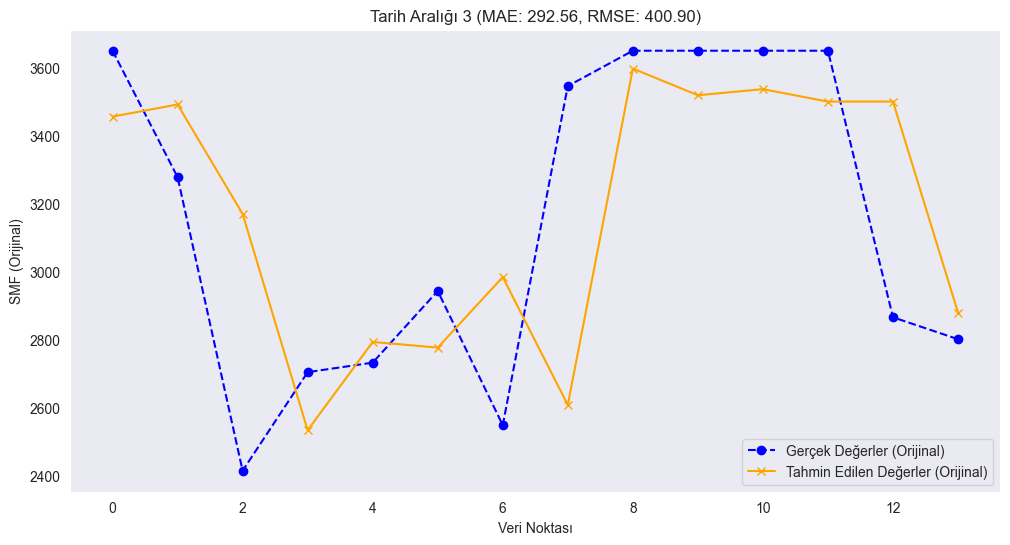


Tarih Aralığı 4: Eğitim 2019-01-01 00:00 - 2023-02-23 23:00 ve Test 2023-02-24 00:00 - 2023-02-24 23:00
Epoch 1/10


C:\Users\Alper\PycharmProjects\LearningFromDataPrj\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2272/2272 - 13s - 6ms/step - loss: 0.0053
Epoch 2/10
2272/2272 - 8s - 3ms/step - loss: 0.0037
Epoch 3/10
2272/2272 - 8s - 3ms/step - loss: 0.0037
Epoch 4/10
2272/2272 - 8s - 3ms/step - loss: 0.0036
Epoch 5/10
2272/2272 - 7s - 3ms/step - loss: 0.0036
Epoch 6/10
2272/2272 - 7s - 3ms/step - loss: 0.0036
Epoch 7/10
2272/2272 - 7s - 3ms/step - loss: 0.0036
Epoch 8/10
2272/2272 - 7s - 3ms/step - loss: 0.0035
Epoch 9/10
2272/2272 - 7s - 3ms/step - loss: 0.0035
Epoch 10/10
2272/2272 - 9s - 4ms/step - loss: 0.0035
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
Mean Absolute Error (MAE): 0.06
Root Mean Squared Error (RMSE): 0.09


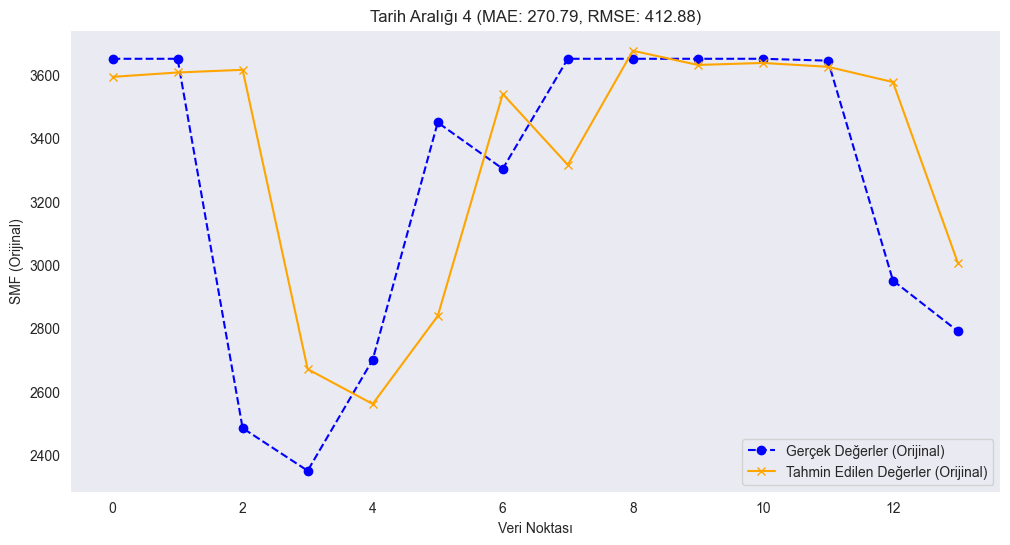


Tarih Aralığı 5: Eğitim 2019-01-01 00:00 - 2023-02-24 23:00 ve Test 2023-02-25 00:00 - 2023-02-25 23:00
Epoch 1/10


C:\Users\Alper\PycharmProjects\LearningFromDataPrj\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2274/2274 - 17s - 7ms/step - loss: 0.0055
Epoch 2/10
2274/2274 - 7s - 3ms/step - loss: 0.0037
Epoch 3/10
2274/2274 - 6s - 3ms/step - loss: 0.0036
Epoch 4/10
2274/2274 - 7s - 3ms/step - loss: 0.0036
Epoch 5/10
2274/2274 - 8s - 3ms/step - loss: 0.0035
Epoch 6/10
2274/2274 - 12s - 5ms/step - loss: 0.0035
Epoch 7/10
2274/2274 - 13s - 6ms/step - loss: 0.0035
Epoch 8/10
2274/2274 - 12s - 5ms/step - loss: 0.0035
Epoch 9/10
2274/2274 - 12s - 5ms/step - loss: 0.0035
Epoch 10/10
2274/2274 - 11s - 5ms/step - loss: 0.0035
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
Mean Absolute Error (MAE): 0.06
Root Mean Squared Error (RMSE): 0.08


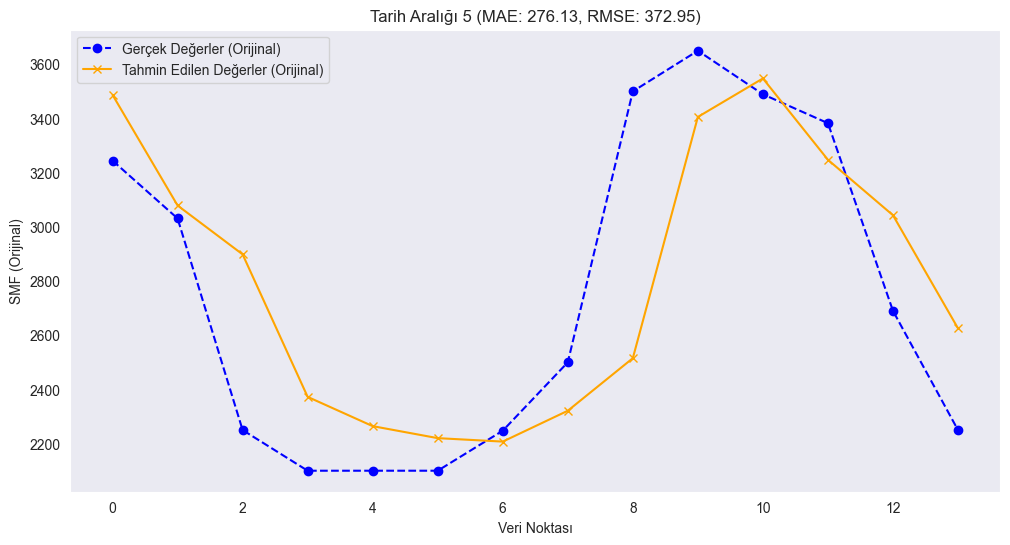


Tarih Aralığı 6: Eğitim 2019-01-01 00:00 - 2023-02-25 23:00 ve Test 2023-02-26 00:00 - 2023-02-26 23:00
Epoch 1/10


C:\Users\Alper\PycharmProjects\LearningFromDataPrj\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2275/2275 - 16s - 7ms/step - loss: 0.0053
Epoch 2/10
2275/2275 - 10s - 4ms/step - loss: 0.0038
Epoch 3/10
2275/2275 - 7s - 3ms/step - loss: 0.0037
Epoch 4/10
2275/2275 - 8s - 3ms/step - loss: 0.0036
Epoch 5/10
2275/2275 - 7s - 3ms/step - loss: 0.0036
Epoch 6/10
2275/2275 - 7s - 3ms/step - loss: 0.0035
Epoch 7/10
2275/2275 - 7s - 3ms/step - loss: 0.0035
Epoch 8/10
2275/2275 - 7s - 3ms/step - loss: 0.0035
Epoch 9/10
2275/2275 - 10s - 4ms/step - loss: 0.0035
Epoch 10/10
2275/2275 - 13s - 6ms/step - loss: 0.0035
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
Mean Absolute Error (MAE): 0.11
Root Mean Squared Error (RMSE): 0.14


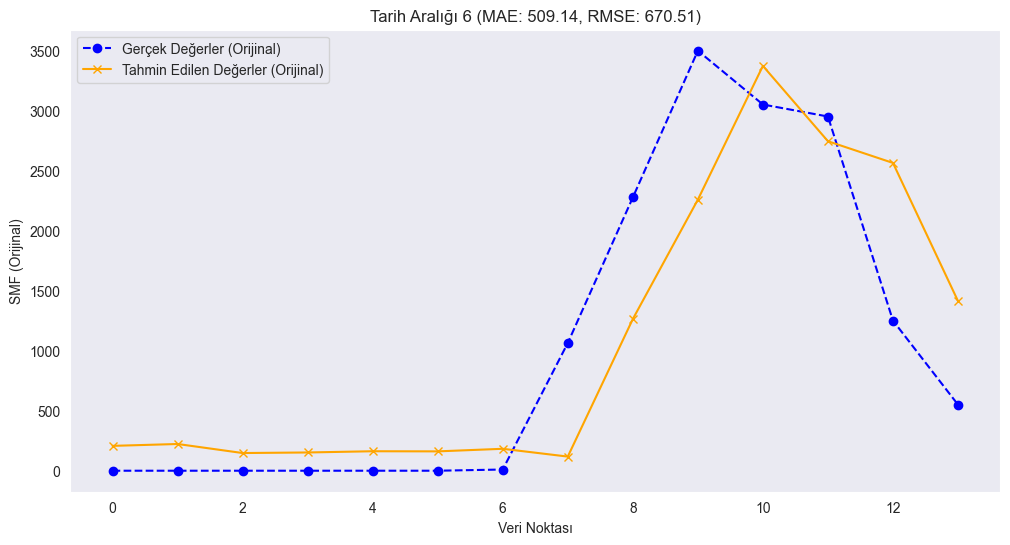


Tarih Aralığı 7: Eğitim 2019-01-01 00:00 - 2023-02-26 23:00 ve Test 2023-02-27 00:00 - 2023-02-27 23:00
Epoch 1/10


C:\Users\Alper\PycharmProjects\LearningFromDataPrj\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2277/2277 - 16s - 7ms/step - loss: 0.0060
Epoch 2/10
2277/2277 - 12s - 5ms/step - loss: 0.0038
Epoch 3/10
2277/2277 - 12s - 5ms/step - loss: 0.0036
Epoch 4/10
2277/2277 - 13s - 6ms/step - loss: 0.0036
Epoch 5/10
2277/2277 - 19s - 8ms/step - loss: 0.0036
Epoch 6/10
2277/2277 - 12s - 5ms/step - loss: 0.0036
Epoch 7/10
2277/2277 - 9s - 4ms/step - loss: 0.0036
Epoch 8/10
2277/2277 - 11s - 5ms/step - loss: 0.0035
Epoch 9/10
2277/2277 - 7s - 3ms/step - loss: 0.0035
Epoch 10/10
2277/2277 - 6s - 3ms/step - loss: 0.0035
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Mean Absolute Error (MAE): 0.08
Root Mean Squared Error (RMSE): 0.10


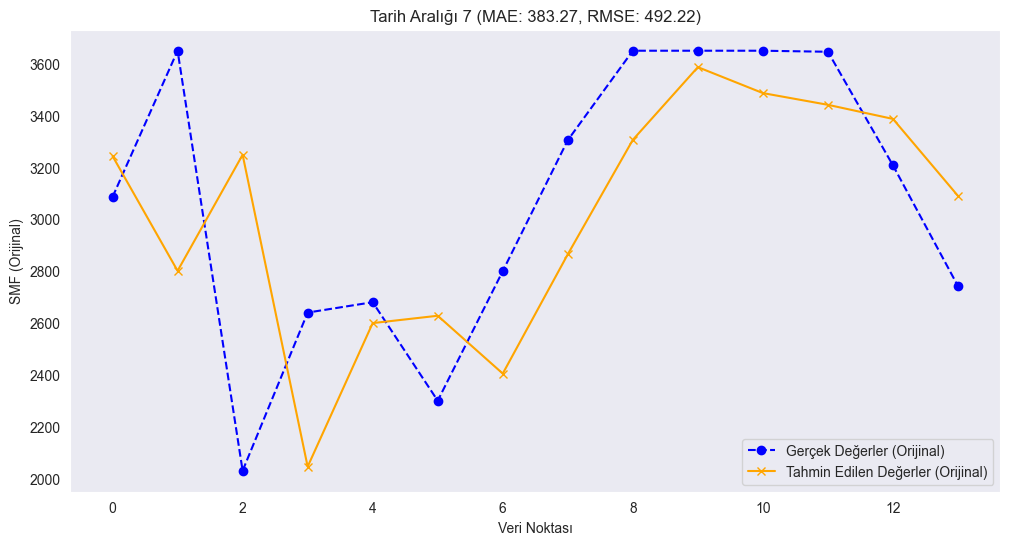


Tüm Tarih Aralıklarının Sonuçları:
                                Tarih Aralığı  MAE (Scaled)  RMSE (Scaled)  \
0         2023-02-21 00:00 - 2023-02-21 23:00      0.094724       0.118293   
1         2023-02-22 00:00 - 2023-02-22 23:00      0.080105       0.123932   
2         2023-02-23 00:00 - 2023-02-23 23:00      0.060950       0.083521   
3         2023-02-24 00:00 - 2023-02-24 23:00      0.056414       0.086017   
4         2023-02-25 00:00 - 2023-02-25 23:00      0.057527       0.077698   
5         2023-02-26 00:00 - 2023-02-26 23:00      0.106071       0.139690   
6         2023-02-27 00:00 - 2023-02-27 23:00      0.079848       0.102545   
Ortalama                             Ortalama      0.076520       0.104528   

          MAE (Original)  RMSE (Original)  
0             454.676314       567.806314  
1             384.503160       594.872104  
2             292.561208       400.900442  
3             270.786343       412.882269  
4             276.128359       372.951709

In [21]:
# LSTMModelUnivariant sınıfını içe aktar
from src.models.LSTMUnivariant import LSTMModelUnivariant
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np 
from sklearn.metrics import mean_absolute_error

# 1. Veri Yolu ve Hedef Değişken
file_path = "processed_dataset_with_features.csv"
target_column = "Smf"

# 2. Model Sınıfını Başlat
look_back = 10  # 24 saatlik geçmiş veri
lstm_model = LSTMModelUnivariant(file_path, target_column, look_back)

# 3. Veriyi Yükle ve Ön İşle
data = lstm_model.load_and_preprocess_data()

# Test tarih aralıklarını tanımlayın
date_ranges = [
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-20 23:00", "test_start_date": "2023-02-21 00:00", "test_end_date": "2023-02-21 23:00"},
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-21 23:00", "test_start_date": "2023-02-22 00:00", "test_end_date": "2023-02-22 23:00"},
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-22 23:00", "test_start_date": "2023-02-23 00:00", "test_end_date": "2023-02-23 23:00"},
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-23 23:00", "test_start_date": "2023-02-24 00:00", "test_end_date": "2023-02-24 23:00"},
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-24 23:00", "test_start_date": "2023-02-25 00:00", "test_end_date": "2023-02-25 23:00"},
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-25 23:00", "test_start_date": "2023-02-26 00:00", "test_end_date": "2023-02-26 23:00"},
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-26 23:00", "test_start_date": "2023-02-27 00:00", "test_end_date": "2023-02-27 23:00"},
]


# Performans sonuçlarını saklamak için bir liste
results = []

# Her tarih aralığı için modeli eğit ve test et
for i, date_range in enumerate(date_ranges):
    print(f"\nTarih Aralığı {i + 1}: Eğitim {date_range['train_start_date']} - {date_range['train_end_date']} ve Test {date_range['test_start_date']} - {date_range['test_end_date']}")

    # Eğitim ve test veri setlerini oluştur
    X_train, y_train, X_test, y_test = lstm_model.split_data(data, 
                                                             date_range['train_start_date'], 
                                                             date_range['train_end_date'], 
                                                             date_range['test_start_date'], 
                                                             date_range['test_end_date'])

    # Modeli oluştur ve eğit
    lstm_model.build_model()
    lstm_model.train_model(X_train, y_train, epochs=10, batch_size=16)

    # Tahmin yap ve değerlendir
    predictions, mae_scaled, rmse_scaled = lstm_model.predict_and_evaluate(X_test, y_test)

    # 4. Orijinal Ölçek Üzerinde Değerleri Hesapla
    y_test_original = lstm_model.scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    predictions_original = lstm_model.scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
    mae_original = mean_absolute_error(y_test_original, predictions_original)
    rmse_original = np.sqrt(mean_squared_error(y_test_original, predictions_original))

    # Sonuçları sakla
    results.append({
        "Tarih Aralığı": f"{date_range['test_start_date']} - {date_range['test_end_date']}",
        "MAE (Scaled)": mae_scaled,
        "RMSE (Scaled)": rmse_scaled,
        "MAE (Original)": mae_original,
        "RMSE (Original)": rmse_original,
    })

    # Tahminleri görselleştir
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(y_test_original)), y_test_original, label='Gerçek Değerler (Orijinal)', color='blue', marker='o', linestyle='--')
    plt.plot(range(len(predictions_original)), predictions_original, label='Tahmin Edilen Değerler (Orijinal)', color='orange', marker='x', linestyle='-')
    plt.title(f"Tarih Aralığı {i + 1} (MAE: {mae_original:.2f}, RMSE: {rmse_original:.2f})")
    plt.xlabel("Veri Noktası")
    plt.ylabel("SMF (Orijinal)")
    plt.legend()
    plt.grid()
    plt.show()

# Performans sonuçlarını göster
results_df = pd.DataFrame(results)

# Ortalamaları ekle
average_mae_scaled = results_df['MAE (Scaled)'].mean()
average_rmse_scaled = results_df['RMSE (Scaled)'].mean()
average_mae_original = results_df['MAE (Original)'].mean()
average_rmse_original = results_df['RMSE (Original)'].mean()

results_df.loc["Ortalama"] = ["Ortalama", average_mae_scaled, average_rmse_scaled, average_mae_original, average_rmse_original]

print("\nTüm Tarih Aralıklarının Sonuçları:")
print(results_df)


LSTM Multivariant


Tarih Aralığı 1: Eğitim 2023-02-20 23:00 - Test 2023-02-21 00:00 ile 2023-02-21 23:00
Epoch 1/10


C:\Users\Alper\PycharmProjects\LearningFromDataPrj\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2268/2268 - 10s - 4ms/step - loss: 0.0056
Epoch 2/10
2268/2268 - 10s - 5ms/step - loss: 0.0049
Epoch 3/10
2268/2268 - 8s - 4ms/step - loss: 0.0048
Epoch 4/10
2268/2268 - 9s - 4ms/step - loss: 0.0047
Epoch 5/10
2268/2268 - 13s - 6ms/step - loss: 0.0047
Epoch 6/10
2268/2268 - 10s - 4ms/step - loss: 0.0046
Epoch 7/10
2268/2268 - 7s - 3ms/step - loss: 0.0045
Epoch 8/10
2268/2268 - 9s - 4ms/step - loss: 0.0045
Epoch 9/10
2268/2268 - 10s - 4ms/step - loss: 0.0044
Epoch 10/10
2268/2268 - 10s - 5ms/step - loss: 0.0044
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
Mean Absolute Error (MAE): 0.13
Root Mean Squared Error (RMSE): 0.17


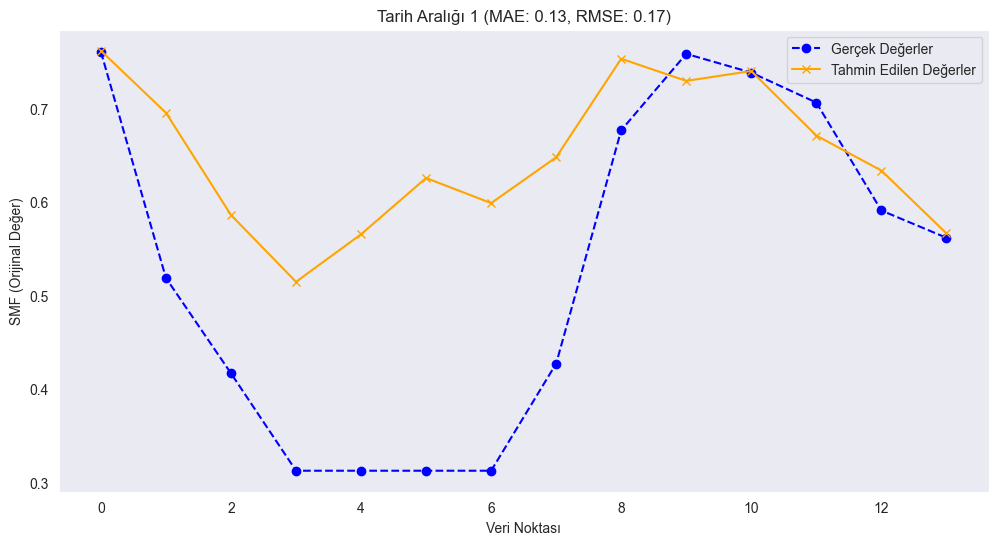


Tarih Aralığı 2: Eğitim 2023-02-21 23:00 - Test 2023-02-22 00:00 ile 2023-02-22 23:00
Epoch 1/10


C:\Users\Alper\PycharmProjects\LearningFromDataPrj\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2269/2269 - 13s - 6ms/step - loss: 0.0056
Epoch 2/10
2269/2269 - 7s - 3ms/step - loss: 0.0050
Epoch 3/10
2269/2269 - 10s - 4ms/step - loss: 0.0049
Epoch 4/10
2269/2269 - 8s - 3ms/step - loss: 0.0048
Epoch 5/10
2269/2269 - 9s - 4ms/step - loss: 0.0047
Epoch 6/10
2269/2269 - 7s - 3ms/step - loss: 0.0047
Epoch 7/10
2269/2269 - 8s - 4ms/step - loss: 0.0047
Epoch 8/10
2269/2269 - 10s - 5ms/step - loss: 0.0046
Epoch 9/10
2269/2269 - 11s - 5ms/step - loss: 0.0045
Epoch 10/10
2269/2269 - 8s - 4ms/step - loss: 0.0045
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
Mean Absolute Error (MAE): 0.14
Root Mean Squared Error (RMSE): 0.17


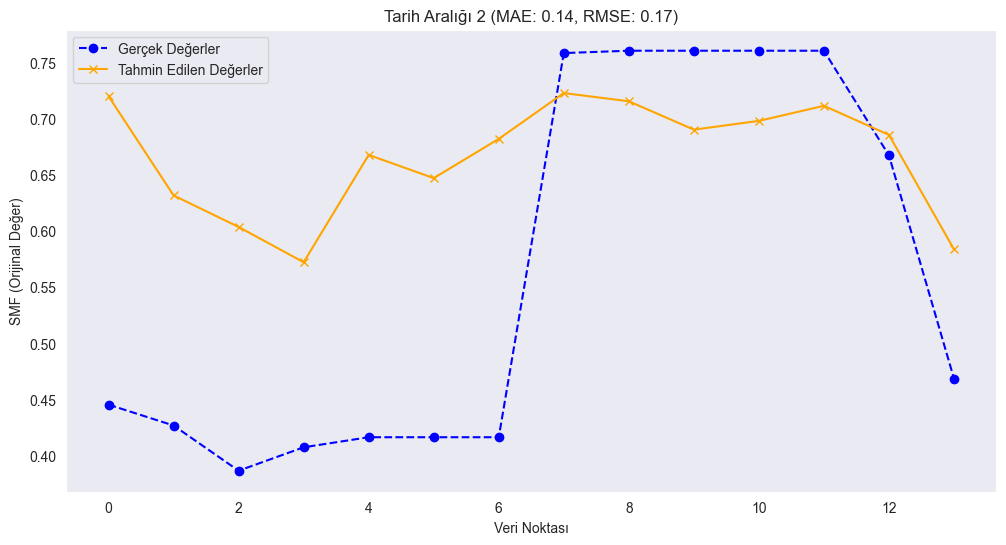


Tarih Aralığı 3: Eğitim 2023-02-22 23:00 - Test 2023-02-23 00:00 ile 2023-02-23 23:00
Epoch 1/10


C:\Users\Alper\PycharmProjects\LearningFromDataPrj\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2271/2271 - 11s - 5ms/step - loss: 0.0063
Epoch 2/10
2271/2271 - 11s - 5ms/step - loss: 0.0050
Epoch 3/10
2271/2271 - 11s - 5ms/step - loss: 0.0049
Epoch 4/10
2271/2271 - 11s - 5ms/step - loss: 0.0049
Epoch 5/10
2271/2271 - 11s - 5ms/step - loss: 0.0048
Epoch 6/10
2271/2271 - 20s - 9ms/step - loss: 0.0048
Epoch 7/10
2271/2271 - 19s - 9ms/step - loss: 0.0047
Epoch 8/10
2271/2271 - 11s - 5ms/step - loss: 0.0046
Epoch 9/10
2271/2271 - 11s - 5ms/step - loss: 0.0045
Epoch 10/10
2271/2271 - 18s - 8ms/step - loss: 0.0045
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
Mean Absolute Error (MAE): 0.05
Root Mean Squared Error (RMSE): 0.07


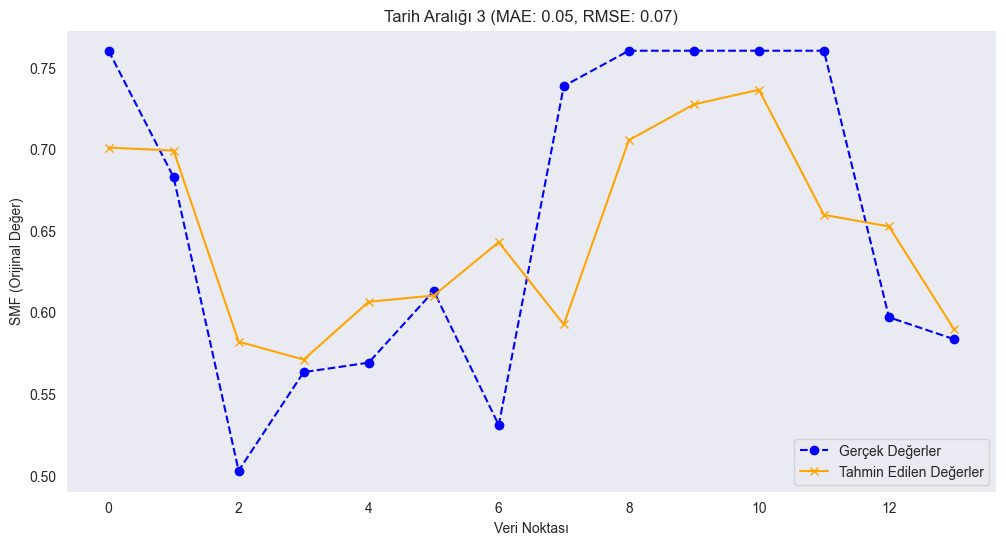


Tarih Aralığı 4: Eğitim 2023-02-23 23:00 - Test 2023-02-24 00:00 ile 2023-02-24 23:00
Epoch 1/10


C:\Users\Alper\PycharmProjects\LearningFromDataPrj\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2272/2272 - 13s - 6ms/step - loss: 0.0063
Epoch 2/10
2272/2272 - 10s - 4ms/step - loss: 0.0050
Epoch 3/10
2272/2272 - 8s - 3ms/step - loss: 0.0049
Epoch 4/10
2272/2272 - 8s - 4ms/step - loss: 0.0049
Epoch 5/10
2272/2272 - 9s - 4ms/step - loss: 0.0048
Epoch 6/10
2272/2272 - 8s - 4ms/step - loss: 0.0048
Epoch 7/10
2272/2272 - 9s - 4ms/step - loss: 0.0047
Epoch 8/10
2272/2272 - 7s - 3ms/step - loss: 0.0047
Epoch 9/10
2272/2272 - 8s - 3ms/step - loss: 0.0046
Epoch 10/10
2272/2272 - 7s - 3ms/step - loss: 0.0046
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Mean Absolute Error (MAE): 0.06
Root Mean Squared Error (RMSE): 0.07


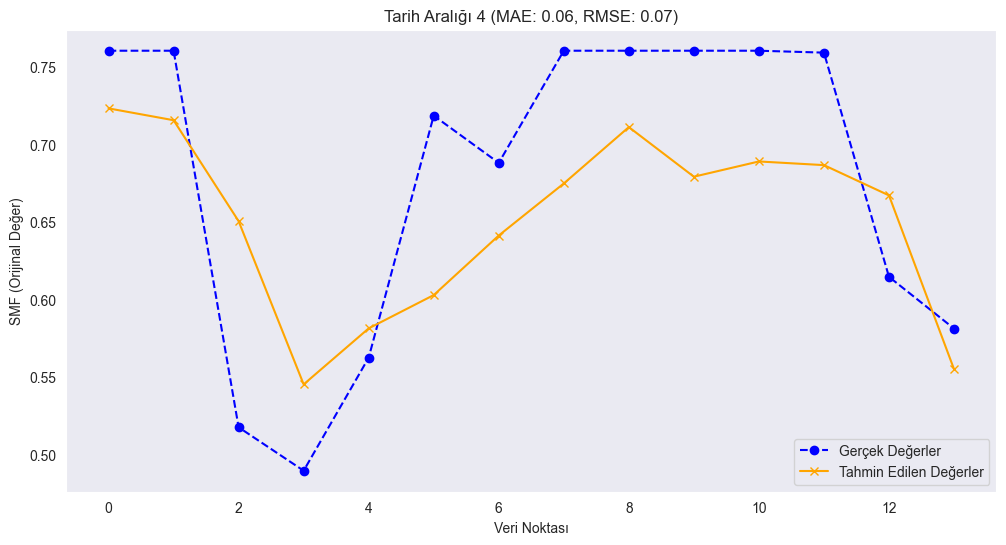


Tarih Aralığı 5: Eğitim 2023-02-24 23:00 - Test 2023-02-25 00:00 ile 2023-02-25 23:00
Epoch 1/10


C:\Users\Alper\PycharmProjects\LearningFromDataPrj\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2274/2274 - 9s - 4ms/step - loss: 0.0060
Epoch 2/10
2274/2274 - 7s - 3ms/step - loss: 0.0050
Epoch 3/10
2274/2274 - 8s - 3ms/step - loss: 0.0049
Epoch 4/10
2274/2274 - 9s - 4ms/step - loss: 0.0049
Epoch 5/10
2274/2274 - 10s - 5ms/step - loss: 0.0048
Epoch 6/10
2274/2274 - 8s - 3ms/step - loss: 0.0048
Epoch 7/10
2274/2274 - 7s - 3ms/step - loss: 0.0047
Epoch 8/10
2274/2274 - 7s - 3ms/step - loss: 0.0046
Epoch 9/10
2274/2274 - 7s - 3ms/step - loss: 0.0046
Epoch 10/10
2274/2274 - 7s - 3ms/step - loss: 0.0045
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Mean Absolute Error (MAE): 0.08
Root Mean Squared Error (RMSE): 0.09


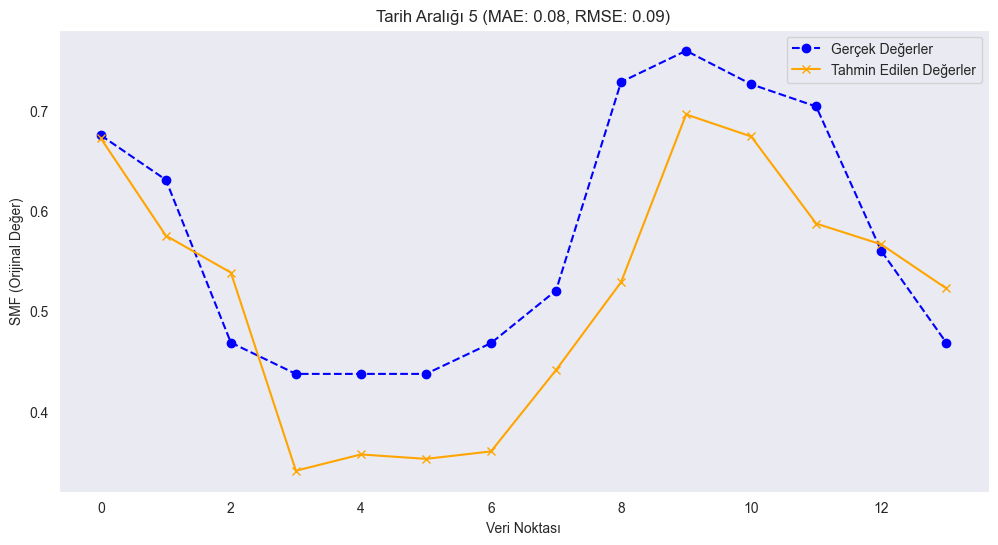


Tarih Aralığı 6: Eğitim 2023-02-25 23:00 - Test 2023-02-26 00:00 ile 2023-02-26 23:00
Epoch 1/10


C:\Users\Alper\PycharmProjects\LearningFromDataPrj\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2275/2275 - 9s - 4ms/step - loss: 0.0057
Epoch 2/10
2275/2275 - 7s - 3ms/step - loss: 0.0050
Epoch 3/10
2275/2275 - 7s - 3ms/step - loss: 0.0049
Epoch 4/10
2275/2275 - 7s - 3ms/step - loss: 0.0048
Epoch 5/10
2275/2275 - 7s - 3ms/step - loss: 0.0047
Epoch 6/10
2275/2275 - 7s - 3ms/step - loss: 0.0047
Epoch 7/10
2275/2275 - 7s - 3ms/step - loss: 0.0046
Epoch 8/10
2275/2275 - 7s - 3ms/step - loss: 0.0045
Epoch 9/10
2275/2275 - 7s - 3ms/step - loss: 0.0045
Epoch 10/10
2275/2275 - 7s - 3ms/step - loss: 0.0045
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Mean Absolute Error (MAE): 0.11
Root Mean Squared Error (RMSE): 0.13


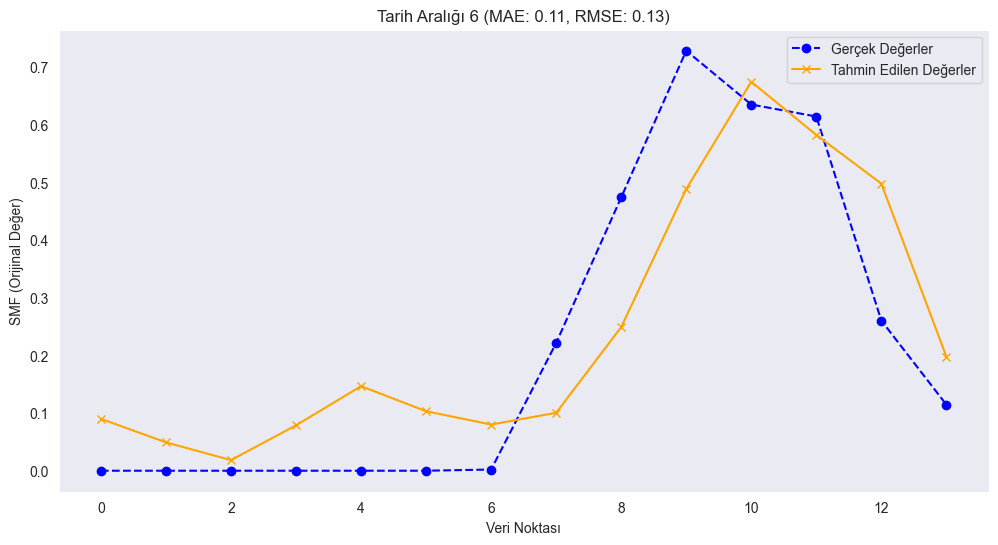


Tarih Aralığı 7: Eğitim 2023-02-26 23:00 - Test 2023-02-27 00:00 ile 2023-02-27 23:00
Epoch 1/10


C:\Users\Alper\PycharmProjects\LearningFromDataPrj\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2277/2277 - 9s - 4ms/step - loss: 0.0058
Epoch 2/10
2277/2277 - 9s - 4ms/step - loss: 0.0050
Epoch 3/10
2277/2277 - 11s - 5ms/step - loss: 0.0049
Epoch 4/10
2277/2277 - 11s - 5ms/step - loss: 0.0048
Epoch 5/10
2277/2277 - 8s - 4ms/step - loss: 0.0048
Epoch 6/10
2277/2277 - 7s - 3ms/step - loss: 0.0047
Epoch 7/10
2277/2277 - 7s - 3ms/step - loss: 0.0046
Epoch 8/10
2277/2277 - 9s - 4ms/step - loss: 0.0046
Epoch 9/10
2277/2277 - 7s - 3ms/step - loss: 0.0045
Epoch 10/10
2277/2277 - 7s - 3ms/step - loss: 0.0045
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Mean Absolute Error (MAE): 0.09
Root Mean Squared Error (RMSE): 0.11


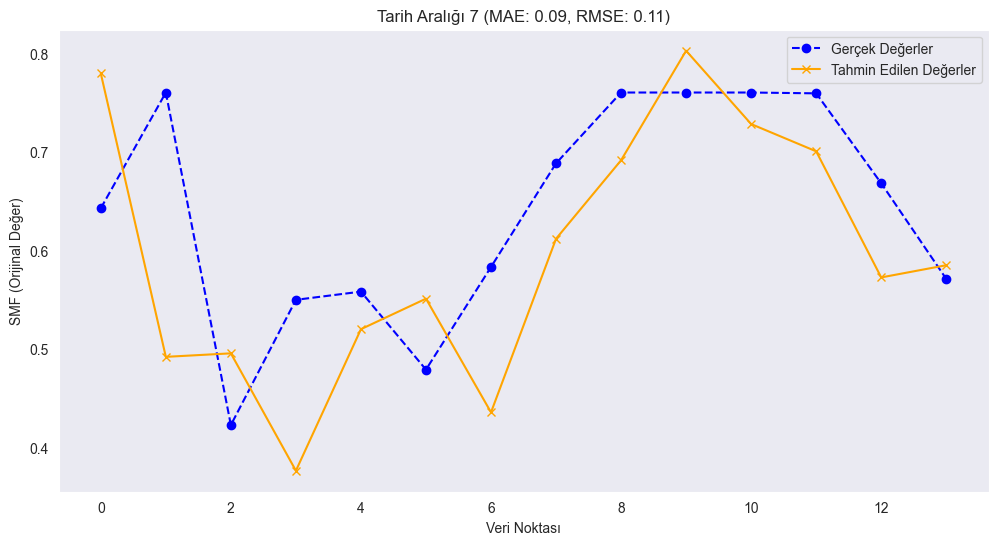


Tüm Tarih Aralıklarının Sonuçları:
                                Tarih Aralığı       MAE      RMSE
0         2023-02-21 00:00 - 2023-02-21 23:00  0.129424  0.169676
1         2023-02-22 00:00 - 2023-02-22 23:00  0.143047  0.170261
2         2023-02-23 00:00 - 2023-02-23 23:00  0.052508  0.067295
3         2023-02-24 00:00 - 2023-02-24 23:00  0.063624  0.070837
4         2023-02-25 00:00 - 2023-02-25 23:00  0.076578  0.089650
5         2023-02-26 00:00 - 2023-02-26 23:00  0.110198  0.132064
6         2023-02-27 00:00 - 2023-02-27 23:00  0.092643  0.113603
Ortalama                             Ortalama  0.095432  0.116198


In [33]:
# LSTMModelMultivariant sınıfını içe aktar
from src.models.LSTMMultivariant import LSTMModelMultivariant
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Özellikler listesi
features = [
    'Ptf',
    'Maxeslesmefiyati',
    'Maxalisfiyati',
    'Arzislemhacmi',
    'Talepislemhacmi',
    'Talepislemhacmi_rolling_mean',
    'Talepislemhacmi_rolling_sum',
    'Ptfeuro',
    'Ptfdolar'
]

# 1. Veri Yolu ve Hedef Değişken
file_path = "processed_dataset_with_features.csv"
target_column = "Smf"

# 2. Model Sınıfını Başlat
look_back = 10
lstm_model = LSTMModelMultivariant(file_path, target_column, features, look_back)

# 3. Veriyi Yükle ve Ön İşle
data = lstm_model.load_and_preprocess_data()

# Test tarih aralıklarını tanımlayın
date_ranges = [
    {"train_start_date": "2023-02-15 00:00", "train_end_date": "2023-02-20 23:00", "test_start_date": "2023-02-21 00:00", "test_end_date": "2023-02-21 23:00"},
    {"train_start_date": "2023-02-16 00:00", "train_end_date": "2023-02-21 23:00", "test_start_date": "2023-02-22 00:00", "test_end_date": "2023-02-22 23:00"},
    {"train_start_date": "2023-02-17 00:00", "train_end_date": "2023-02-22 23:00", "test_start_date": "2023-02-23 00:00", "test_end_date": "2023-02-23 23:00"},
    {"train_start_date": "2023-02-18 00:00", "train_end_date": "2023-02-23 23:00", "test_start_date": "2023-02-24 00:00", "test_end_date": "2023-02-24 23:00"},
    {"train_start_date": "2023-02-19 00:00", "train_end_date": "2023-02-24 23:00", "test_start_date": "2023-02-25 00:00", "test_end_date": "2023-02-25 23:00"},
    {"train_start_date": "2023-02-20 00:00", "train_end_date": "2023-02-25 23:00", "test_start_date": "2023-02-26 00:00", "test_end_date": "2023-02-26 23:00"},
    {"train_start_date": "2023-02-21 00:00", "train_end_date": "2023-02-26 23:00", "test_start_date": "2023-02-27 00:00", "test_end_date": "2023-02-27 23:00"},
]

# Performans sonuçlarını saklamak için bir liste
results = []

# Her tarih aralığı için modeli eğit ve test et
for i, date_range in enumerate(date_ranges):
    print(f"\nTarih Aralığı {i + 1}: Eğitim {date_range['train_end_date']} - Test {date_range['test_start_date']} ile {date_range['test_end_date']}")

    # Eğitim ve test veri setlerini oluştur
    X_train, y_train, X_test, y_test = lstm_model.split_data(data,
                                                             "2019-01-01 00:00",
                                                             date_range['train_end_date'],
                                                             date_range['test_start_date'],
                                                             date_range['test_end_date'])

    # Modeli oluştur ve eğit
    lstm_model.build_model()
    lstm_model.train_model(X_train, y_train, epochs=10, batch_size=16)

    # Tahmin yap ve değerlendir
    predictions, mae, rmse = lstm_model.predict_and_evaluate(X_test, y_test)

    # Sonuçları sakla
    results.append({
        "Tarih Aralığı": f"{date_range['test_start_date']} - {date_range['test_end_date']}",
        "MAE": mae,
        "RMSE": rmse
    })

    # Tahminleri görselleştir
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(y_test)), y_test, label='Gerçek Değerler', color='blue', marker='o', linestyle='--')
    plt.plot(range(len(predictions)), predictions, label='Tahmin Edilen Değerler', color='orange', marker='x', linestyle='-')
    plt.title(f"Tarih Aralığı {i + 1} (MAE: {mae:.2f}, RMSE: {rmse:.2f})")
    plt.xlabel("Veri Noktası")
    plt.ylabel("SMF (Orijinal Değer)")
    plt.legend()
    plt.grid()
    plt.show()

# Performans sonuçlarını göster
results_df = pd.DataFrame(results)

# Ortalamaları ekle
average_mae = results_df['MAE'].mean()
average_rmse = results_df['RMSE'].mean()

results_df.loc["Ortalama"] = ["Ortalama", average_mae, average_rmse]

print("\nTüm Tarih Aralıklarının Sonuçları:")
print(results_df)


NBeats



Tarih Aralığı 1: Eğitim 2019-01-01 00:00 - 2023-02-20 23:00 ve Test 2023-02-21 00:00 - 2023-02-21 23:00
Epoch 1/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.9985e-04 - val_loss: 0.0091
Epoch 2/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.2270e-04 - val_loss: 0.0084
Epoch 3/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0854e-04 - val_loss: 0.0154
Epoch 4/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0543e-04 - val_loss: 0.0124
Epoch 5/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0747e-04 - val_loss: 0.0208
Epoch 6/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1855e-04 - val_loss: 0.0085
Epoch 7/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0169e-04 - val_loss: 0.0120
Epoch 8/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9939e-04 - val_loss: 0.0081
Epoch 9/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0375e-04 - val_loss: 0.0120
Epoch 10/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9668e-04 - val_loss: 0

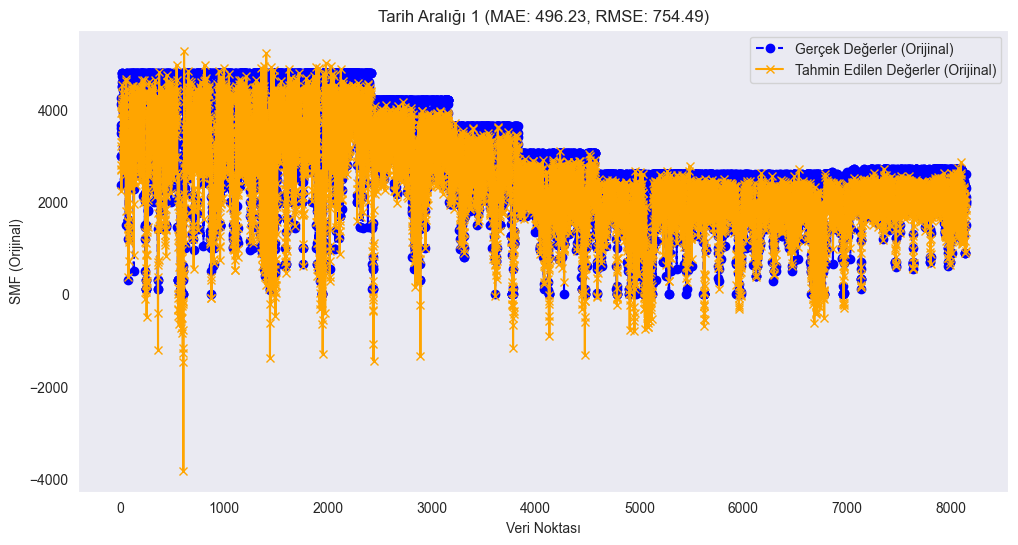


Tarih Aralığı 2: Eğitim 2019-01-01 00:00 - 2023-02-21 23:00 ve Test 2023-02-22 00:00 - 2023-02-22 23:00
Epoch 1/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.5433e-04 - val_loss: 0.0074
Epoch 2/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0626e-04 - val_loss: 0.0087
Epoch 3/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0561e-04 - val_loss: 0.0095
Epoch 4/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.2089e-04 - val_loss: 0.0078
Epoch 5/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0303e-04 - val_loss: 0.0088
Epoch 6/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1135e-04 - val_loss: 0.0099
Epoch 7/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9868e-04 - val_loss: 0.0101
Epoch 8/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0044e-04 - val_loss: 0.0084
Epoch 9/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9660e-04 - val_loss: 0.0096
Epoch 10/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0243e-04 - val_loss: 0

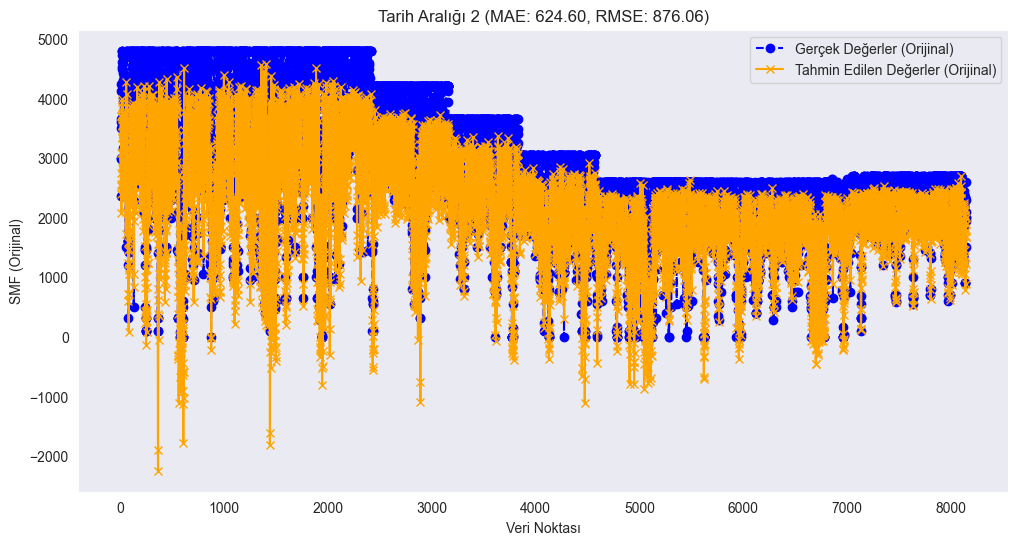


Tarih Aralığı 3: Eğitim 2019-01-01 00:00 - 2023-02-22 23:00 ve Test 2023-02-23 00:00 - 2023-02-23 23:00
Epoch 1/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.0084e-04 - val_loss: 0.0085
Epoch 2/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1037e-04 - val_loss: 0.0142
Epoch 3/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1636e-04 - val_loss: 0.0115
Epoch 4/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9562e-04 - val_loss: 0.0081
Epoch 5/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0103e-04 - val_loss: 0.0081
Epoch 6/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0322e-04 - val_loss: 0.0092
Epoch 7/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0167e-04 - val_loss: 0.0095
Epoch 8/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8916e-04 - val_loss: 0.0128
Epoch 9/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9033e-04 - val_loss: 0.0098
Epoch 10/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9731e-04 - val_loss: 0

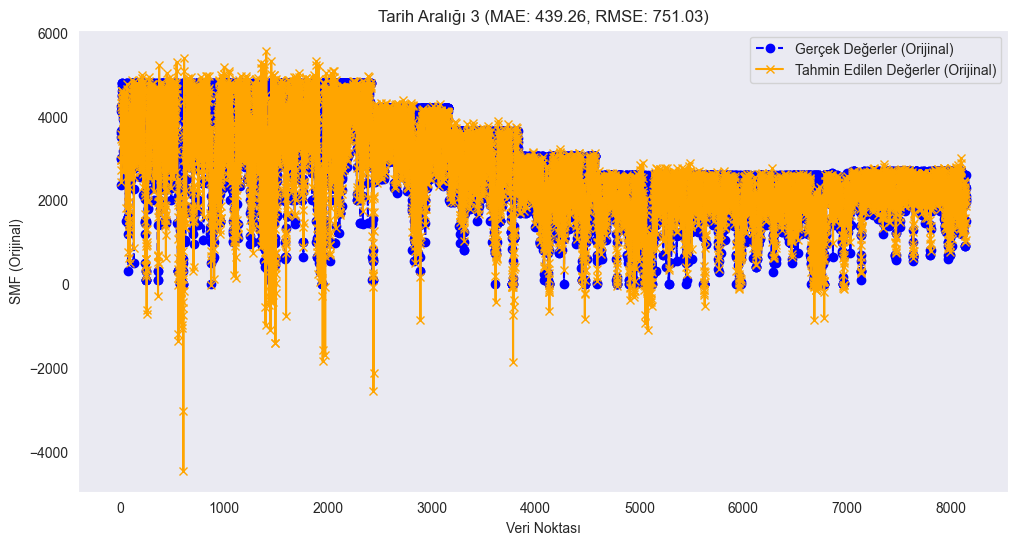


Tarih Aralığı 4: Eğitim 2019-01-01 00:00 - 2023-02-23 23:00 ve Test 2023-02-24 00:00 - 2023-02-24 23:00
Epoch 1/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.5399e-04 - val_loss: 0.0077
Epoch 2/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1809e-04 - val_loss: 0.0075
Epoch 3/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0263e-04 - val_loss: 0.0082
Epoch 4/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0254e-04 - val_loss: 0.0120
Epoch 5/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1614e-04 - val_loss: 0.0100
Epoch 6/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9272e-04 - val_loss: 0.0088
Epoch 7/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9288e-04 - val_loss: 0.0075
Epoch 8/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.0538e-04 - val_loss: 0.0099
Epoch 9/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9653e-04 - val_loss: 0.0077
Epoch 10/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.1428e-04 - val_loss: 0

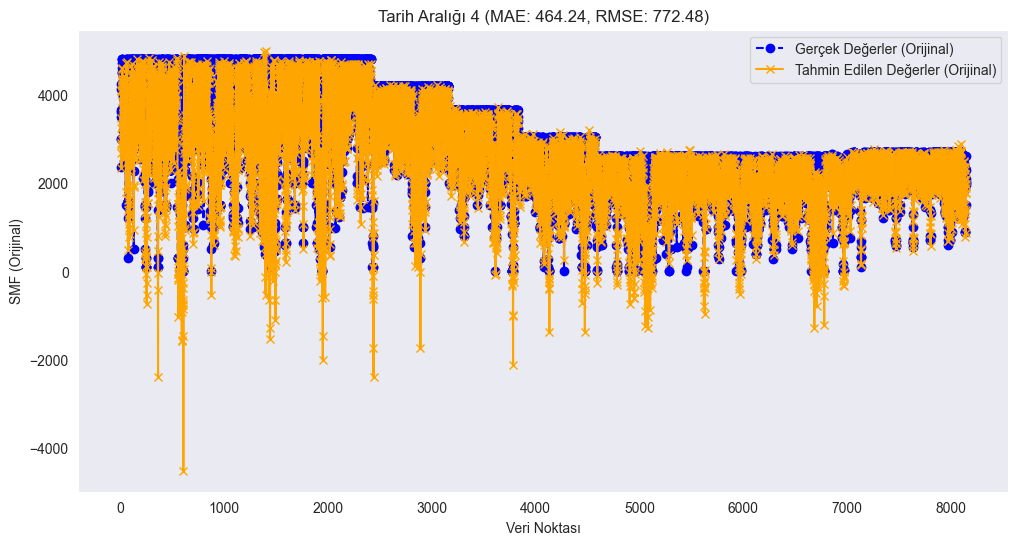


Tarih Aralığı 5: Eğitim 2019-01-01 00:00 - 2023-02-24 23:00 ve Test 2023-02-25 00:00 - 2023-02-25 23:00
Epoch 1/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5.0195e-04 - val_loss: 0.0076
Epoch 2/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1662e-04 - val_loss: 0.0081
Epoch 3/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0282e-04 - val_loss: 0.0078
Epoch 4/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9891e-04 - val_loss: 0.0091
Epoch 5/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1053e-04 - val_loss: 0.0125
Epoch 6/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0660e-04 - val_loss: 0.0129
Epoch 7/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0387e-04 - val_loss: 0.0095
Epoch 8/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9722e-04 - val_loss: 0.0091
Epoch 9/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9949e-04 - val_loss: 0.0154
Epoch 10/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9463e-04 - val_loss: 0

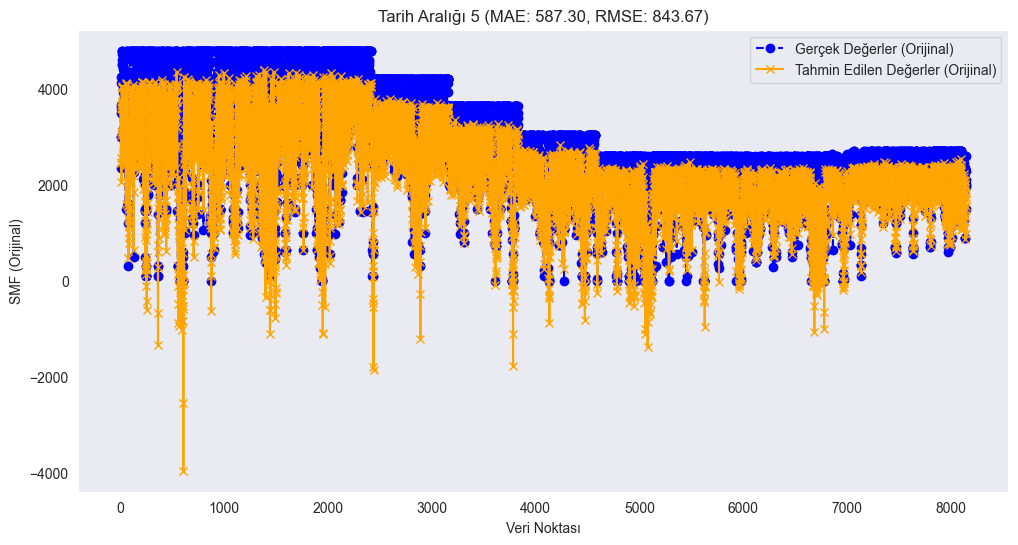


Tarih Aralığı 6: Eğitim 2019-01-01 00:00 - 2023-02-25 23:00 ve Test 2023-02-26 00:00 - 2023-02-26 23:00
Epoch 1/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 7.3523e-04 - val_loss: 0.0091
Epoch 2/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1841e-04 - val_loss: 0.0086
Epoch 3/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0816e-04 - val_loss: 0.0078
Epoch 4/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0471e-04 - val_loss: 0.0097
Epoch 5/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0590e-04 - val_loss: 0.0105
Epoch 6/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.9709e-04 - val_loss: 0.0097
Epoch 7/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.0183e-04 - val_loss: 0.0149
Epoch 8/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.0359e-04 - val_loss: 0.0090
Epoch 9/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0872e-04 - val_loss: 0.0110
Epoch 10/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0996e-04 - val_loss: 0

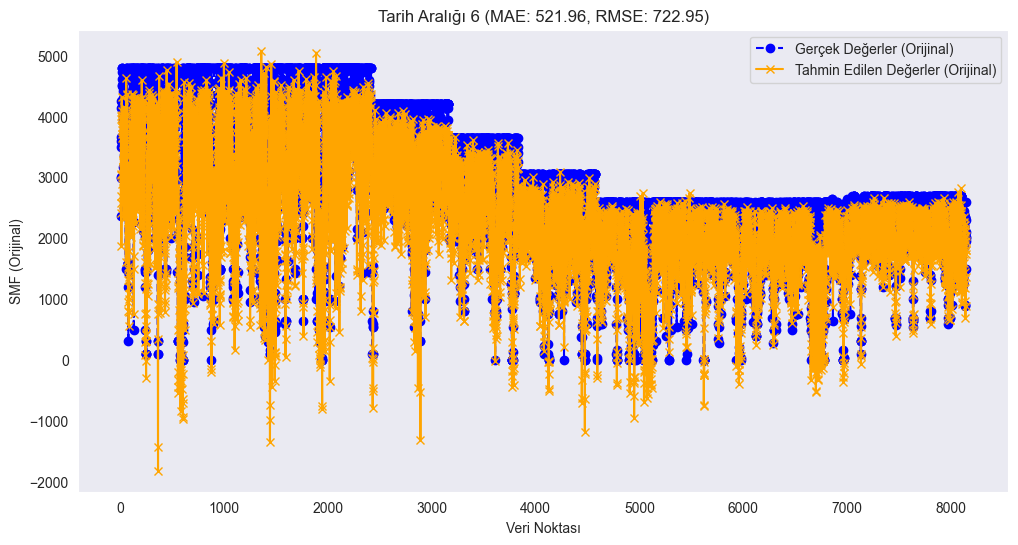


Tarih Aralığı 7: Eğitim 2019-01-01 00:00 - 2023-02-26 23:00 ve Test 2023-02-27 00:00 - 2023-02-27 23:00
Epoch 1/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 6.2715e-04 - val_loss: 0.0076
Epoch 2/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.1822e-04 - val_loss: 0.0093
Epoch 3/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.1518e-04 - val_loss: 0.0102
Epoch 4/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.0735e-04 - val_loss: 0.0096
Epoch 5/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.2083e-04 - val_loss: 0.0081
Epoch 6/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.0718e-04 - val_loss: 0.0094
Epoch 7/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9942e-04 - val_loss: 0.0120
Epoch 8/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0382e-04 - val_loss: 0.0093
Epoch 9/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0056e-04 - val_loss: 0.0131
Epoch 10/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.0395e-04 - val_loss: 0

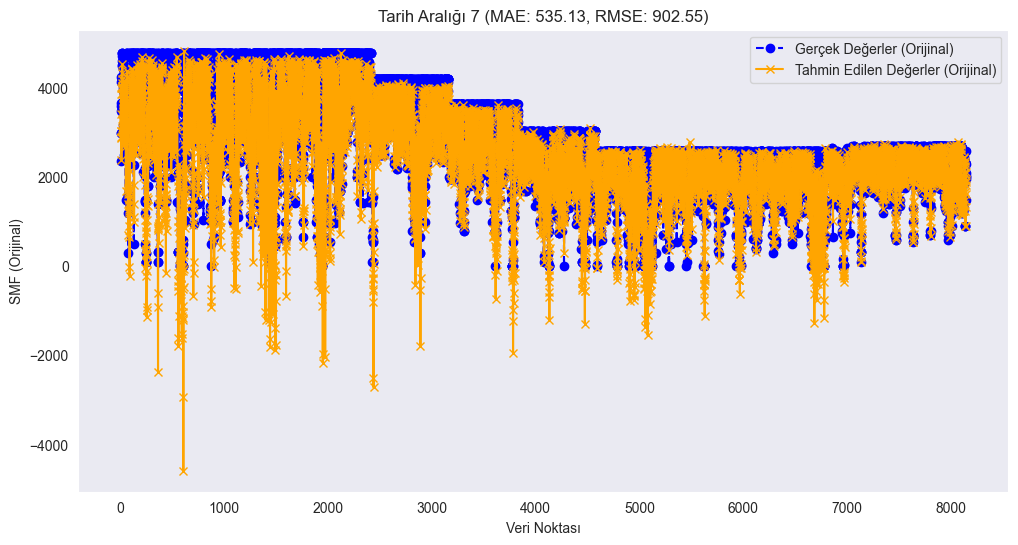


Tüm Tarih Aralıklarının Sonuçları:
                                Tarih Aralığı  MAE (Scaled)  RMSE (Scaled)  \
0         2023-02-21 00:00 - 2023-02-21 23:00      0.103381       0.157185   
1         2023-02-22 00:00 - 2023-02-22 23:00      0.130124       0.182512   
2         2023-02-23 00:00 - 2023-02-23 23:00      0.091513       0.156465   
3         2023-02-24 00:00 - 2023-02-24 23:00      0.096717       0.160933   
4         2023-02-25 00:00 - 2023-02-25 23:00      0.122354       0.175765   
5         2023-02-26 00:00 - 2023-02-26 23:00      0.108742       0.150615   
6         2023-02-27 00:00 - 2023-02-27 23:00      0.111486       0.188031   
Ortalama                             Ortalama      0.109188       0.167358   

          MAE (Original)  RMSE (Original)  
0             496.230844       754.487631  
1             624.595884       876.056495  
2             439.261448       751.031030  
3             464.241208       772.476131  
4             587.299172       843.672683

In [25]:
# NBeatsModel sınıfını içe aktar
from src.models.NBeats import NBeatsModel
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Veri Yolu ve Hedef Değişken
file_path = "processed_dataset_with_features.csv"
target_column = "Smf"

# 2. Model Sınıfını Başlat
lookback = 10
nbeats_model = NBeatsModel(file_path, target_column, lookback)

# 3. Veriyi Yükle ve Ön İşle
features_scaled = nbeats_model.load_and_preprocess_data()

# Test tarih aralıklarını tanımlayın
date_ranges = [
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-20 23:00", "test_start_date": "2023-02-21 00:00", "test_end_date": "2023-02-21 23:00"},
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-21 23:00", "test_start_date": "2023-02-22 00:00", "test_end_date": "2023-02-22 23:00"},
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-22 23:00", "test_start_date": "2023-02-23 00:00", "test_end_date": "2023-02-23 23:00"},
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-23 23:00", "test_start_date": "2023-02-24 00:00", "test_end_date": "2023-02-24 23:00"},
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-24 23:00", "test_start_date": "2023-02-25 00:00", "test_end_date": "2023-02-25 23:00"},
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-25 23:00", "test_start_date": "2023-02-26 00:00", "test_end_date": "2023-02-26 23:00"},
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-26 23:00", "test_start_date": "2023-02-27 00:00", "test_end_date": "2023-02-27 23:00"},
]

# Performans sonuçlarını saklamak için bir liste
results = []

# Her tarih aralığı için modeli eğit ve test et
for i, date_range in enumerate(date_ranges):
    print(f"\nTarih Aralığı {i + 1}: Eğitim {date_range['train_start_date']} - {date_range['train_end_date']} ve Test {date_range['test_start_date']} - {date_range['test_end_date']}")

    # Eğitim ve test veri setlerini oluştur
    X_train, y_train = nbeats_model.create_time_series(features_scaled[:int(0.8 * len(features_scaled))])
    X_test, y_test = nbeats_model.create_time_series(features_scaled[int(0.8 * len(features_scaled)):])

    # Modeli oluştur ve eğit
    nbeats_model.build_model()
    nbeats_model.train_model(X_train, y_train, epochs=20, batch_size=32)

    # Tahmin yap ve değerlendir
    predictions, mae_scaled, rmse_scaled = nbeats_model.predict_and_evaluate(X_test, y_test)

    # 4. Orijinal Ölçek Üzerinde Değerleri Hesapla
    y_test_original = nbeats_model.scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    predictions_original = nbeats_model.scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
    mae_original = mean_absolute_error(y_test_original, predictions_original)
    rmse_original = np.sqrt(mean_squared_error(y_test_original, predictions_original))

    # Sonuçları sakla
    results.append({
        "Tarih Aralığı": f"{date_range['test_start_date']} - {date_range['test_end_date']}",
        "MAE (Scaled)": mae_scaled,
        "RMSE (Scaled)": rmse_scaled,
        "MAE (Original)": mae_original,
        "RMSE (Original)": rmse_original,
    })

    # Tahminleri görselleştir
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(y_test_original)), y_test_original, label='Gerçek Değerler (Orijinal)', color='blue', marker='o', linestyle='--')
    plt.plot(range(len(predictions_original)), predictions_original, label='Tahmin Edilen Değerler (Orijinal)', color='orange', marker='x', linestyle='-')
    plt.title(f"Tarih Aralığı {i + 1} (MAE: {mae_original:.2f}, RMSE: {rmse_original:.2f})")
    plt.xlabel("Veri Noktası")
    plt.ylabel("SMF (Orijinal)")
    plt.legend()
    plt.grid()
    plt.show()

# Performans sonuçlarını göster
results_df = pd.DataFrame(results)

# Ortalamaları ekle
average_mae_scaled = results_df['MAE (Scaled)'].mean()
average_rmse_scaled = results_df['RMSE (Scaled)'].mean()
average_mae_original = results_df['MAE (Original)'].mean()
average_rmse_original = results_df['RMSE (Original)'].mean()

results_df.loc["Ortalama"] = ["Ortalama", average_mae_scaled, average_rmse_scaled, average_mae_original, average_rmse_original]

print("\nTüm Tarih Aralıklarının Sonuçları:")
print(results_df)


TFT 


Tarih Aralığı 1: Eğitim 2019-01-01 00:00 - 2023-02-20 23:00 ve Test 2023-02-21 00:00 - 2023-02-21 23:00
Epoch 1/10
907/907 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 0.0014 - val_loss: 0.0289
Epoch 2/10
907/907 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 8.7435e-04 - val_loss: 0.0238
Epoch 3/10
907/907 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 8.8249e-04 - val_loss: 0.0240
Epoch 4/10
907/907 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 8.0593e-04 - val_loss: 0.0245
Epoch 5/10
907/907 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 7.7371e-04 - val_loss: 0.0235
Epoch 6/10
907/907 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 7.9868e-04 - val_loss: 0.0237
Epoch 7/10
907/907 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 7.7688e-04 - val_loss: 0.0263
Epoch 8/10
907/907 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 7.5751e-04 - val_loss: 0.0326
Epoch 9/10
907/907 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 7.6781e-04 - val_loss: 0.0256
Epoch 10/10
907/907 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 7.2919e-04 - val_loss: 

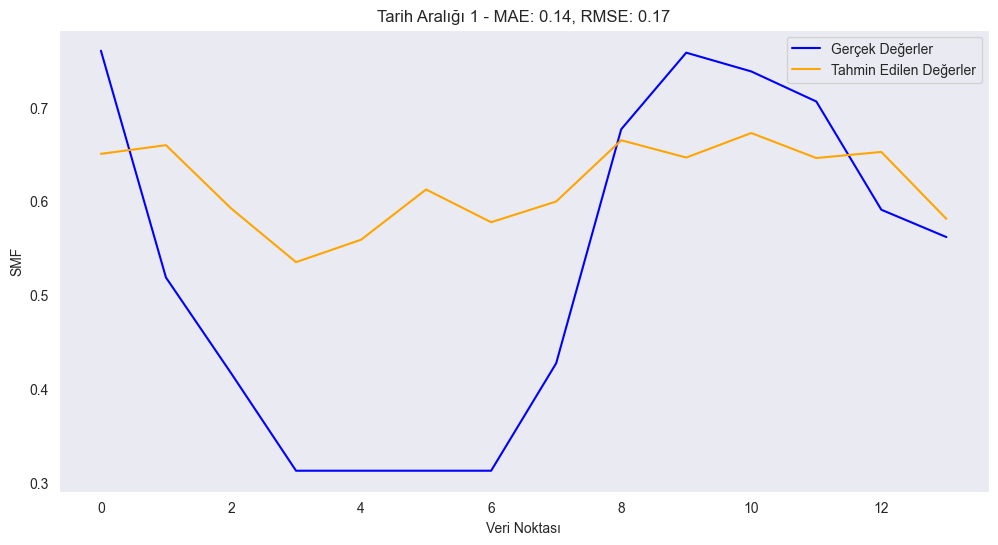


Tarih Aralığı 2: Eğitim 2019-01-01 00:00 - 2023-02-21 23:00 ve Test 2023-02-22 00:00 - 2023-02-22 23:00
Epoch 1/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0014 - val_loss: 0.0258
Epoch 2/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 8.6684e-04 - val_loss: 0.0309
Epoch 3/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 7.9019e-04 - val_loss: 0.0256
Epoch 4/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 7.8113e-04 - val_loss: 0.0269
Epoch 5/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 7.7268e-04 - val_loss: 0.0229
Epoch 6/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 7.8138e-04 - val_loss: 0.0237
Epoch 7/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 7.9638e-04 - val_loss: 0.0240
Epoch 8/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 7.7911e-04 - val_loss: 0.0233
Epoch 9/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 7.2837e-04 - val_loss: 0.0349
Epoch 10/10
908/908 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 7.6928e-04 - val_

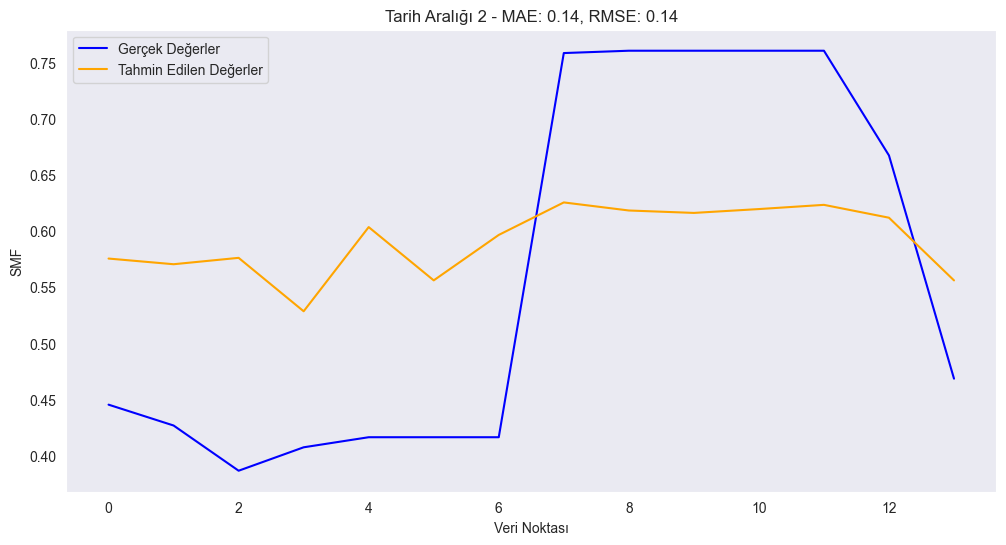


Tarih Aralığı 3: Eğitim 2019-01-01 00:00 - 2023-02-22 23:00 ve Test 2023-02-23 00:00 - 2023-02-23 23:00
Epoch 1/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - loss: 0.0016 - val_loss: 0.0244
Epoch 2/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 8.7553e-04 - val_loss: 0.0240
Epoch 3/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 8.2676e-04 - val_loss: 0.0294
Epoch 4/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 8.0879e-04 - val_loss: 0.0242
Epoch 5/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 7.8082e-04 - val_loss: 0.0250
Epoch 6/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 8.2164e-04 - val_loss: 0.0281
Epoch 7/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 7.7787e-04 - val_loss: 0.0246
Epoch 8/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 7.5939e-04 - val_loss: 0.0332
Epoch 9/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 7.6775e-04 - val_loss: 0.0324
Epoch 10/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 7.9920e-0

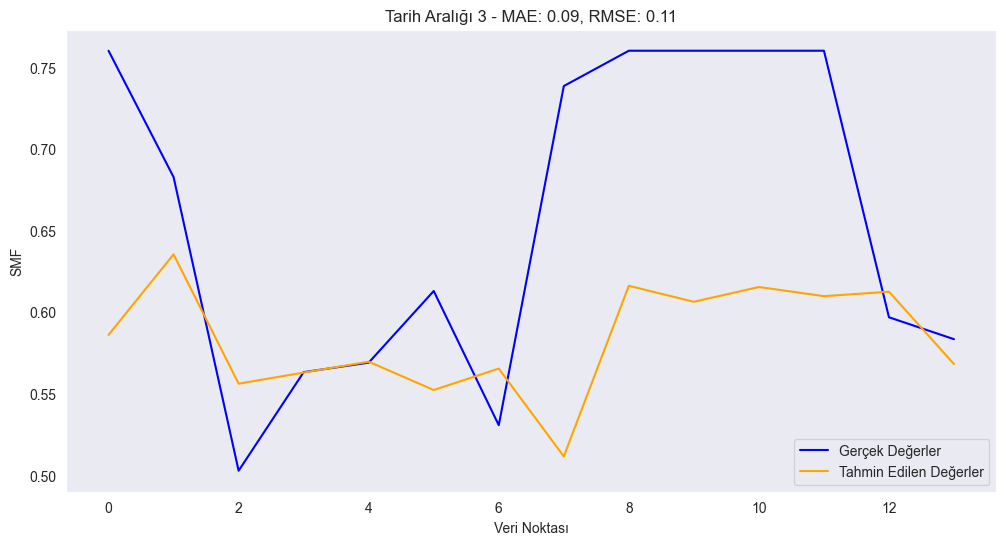


Tarih Aralığı 4: Eğitim 2019-01-01 00:00 - 2023-02-23 23:00 ve Test 2023-02-24 00:00 - 2023-02-24 23:00
Epoch 1/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - loss: 0.0016 - val_loss: 0.0309
Epoch 2/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 8.7275e-04 - val_loss: 0.0440
Epoch 3/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 7.8065e-04 - val_loss: 0.0339
Epoch 4/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 8.0057e-04 - val_loss: 0.0263
Epoch 5/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 8.3299e-04 - val_loss: 0.0265
Epoch 6/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 8.1958e-04 - val_loss: 0.0260
Epoch 7/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 8.8638e-04 - val_loss: 0.0269
Epoch 8/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 7.9311e-04 - val_loss: 0.0275
Epoch 9/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 7.8834e-04 - val_loss: 0.0310
Epoch 10/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 7.3935e-04 - val_

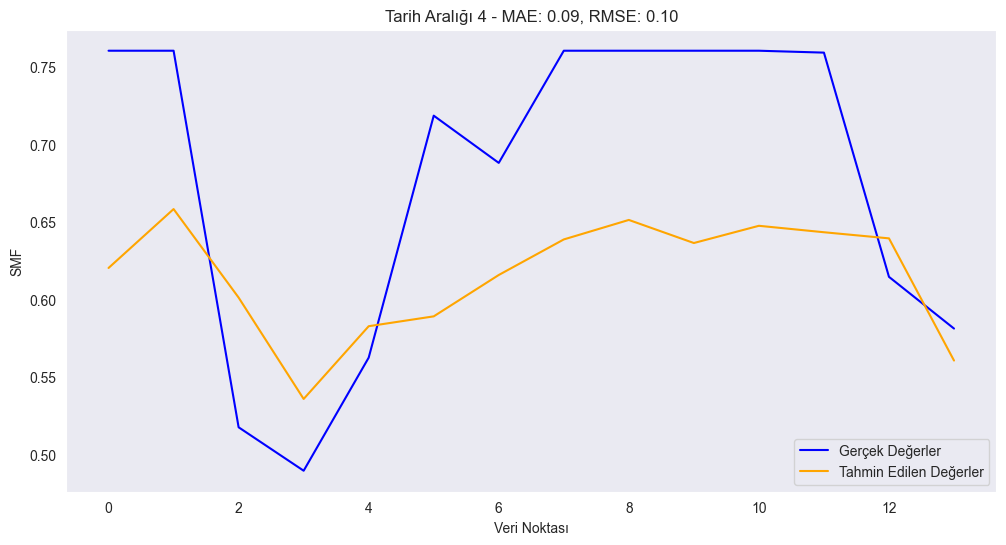


Tarih Aralığı 5: Eğitim 2019-01-01 00:00 - 2023-02-24 23:00 ve Test 2023-02-25 00:00 - 2023-02-25 23:00
Epoch 1/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0015 - val_loss: 0.0276
Epoch 2/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 9.7669e-04 - val_loss: 0.0215
Epoch 3/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 8.2629e-04 - val_loss: 0.0243
Epoch 4/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 8.2866e-04 - val_loss: 0.0235
Epoch 5/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 8.3099e-04 - val_loss: 0.0276
Epoch 6/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 7.3270e-04 - val_loss: 0.0266
Epoch 7/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 7.7848e-04 - val_loss: 0.0241
Epoch 8/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 7.7394e-04 - val_loss: 0.0428
Epoch 9/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 8.1727e-04 - val_loss: 0.0257
Epoch 10/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 7.6977e-0

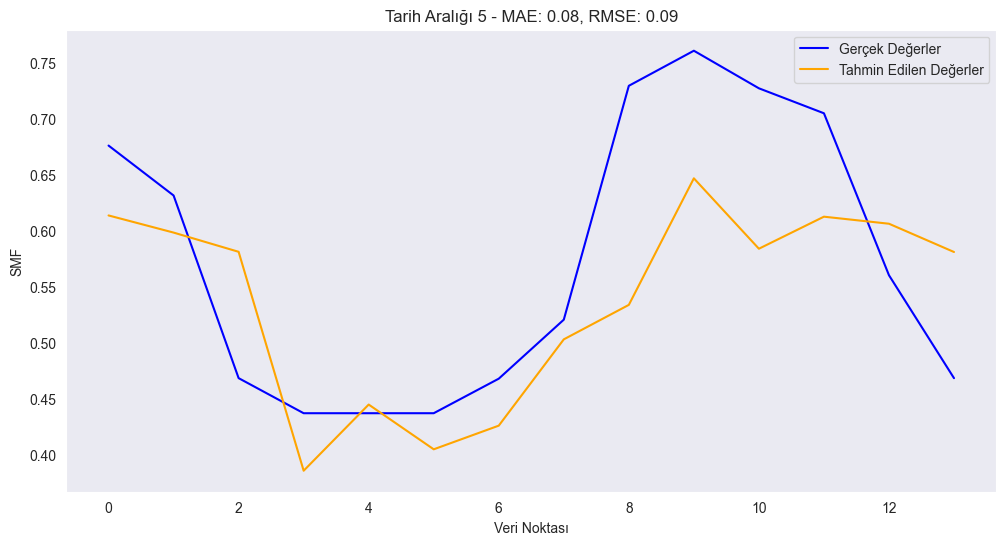


Tarih Aralığı 6: Eğitim 2019-01-01 00:00 - 2023-02-25 23:00 ve Test 2023-02-26 00:00 - 2023-02-26 23:00
Epoch 1/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 0.0013 - val_loss: 0.0237
Epoch 2/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 9.5103e-04 - val_loss: 0.0228
Epoch 3/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 7.6923e-04 - val_loss: 0.0251
Epoch 4/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 7.8130e-04 - val_loss: 0.0255
Epoch 5/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 7.6954e-04 - val_loss: 0.0234
Epoch 6/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 8.0459e-04 - val_loss: 0.0272
Epoch 7/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 7.5959e-04 - val_loss: 0.0269
Epoch 8/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 7.5596e-04 - val_loss: 0.0272
Epoch 9/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 8.6322e-04 - val_loss: 0.0233
Epoch 10/10
910/910 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 7.6269e-04 - val_

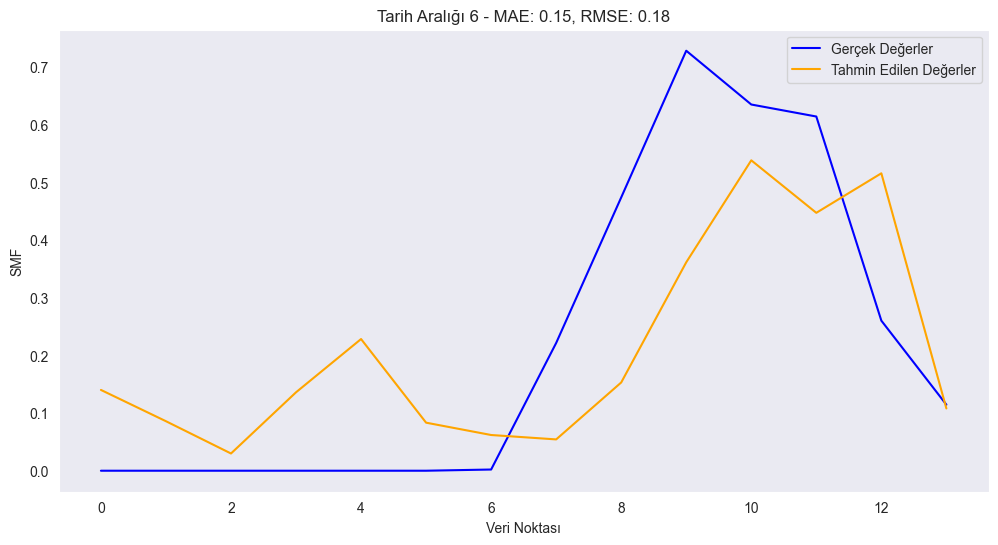


Tarih Aralığı 7: Eğitim 2019-01-01 00:00 - 2023-02-26 23:00 ve Test 2023-02-27 00:00 - 2023-02-27 23:00
Epoch 1/10
911/911 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.0013 - val_loss: 0.0311
Epoch 2/10
911/911 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 9.0041e-04 - val_loss: 0.0292
Epoch 3/10
911/911 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 7.9463e-04 - val_loss: 0.0412
Epoch 4/10
911/911 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 8.5879e-04 - val_loss: 0.0323
Epoch 5/10
911/911 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 7.7460e-04 - val_loss: 0.0389
Epoch 6/10
911/911 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 7.9563e-04 - val_loss: 0.0255
Epoch 7/10
911/911 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 8.0093e-04 - val_loss: 0.0505
Epoch 8/10
911/911 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 8.0079e-04 - val_loss: 0.0273
Epoch 9/10
911/911 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 7.4547e-04 - val_loss: 0.0364
Epoch 10/10
911/911 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 7.4148e-04 - va

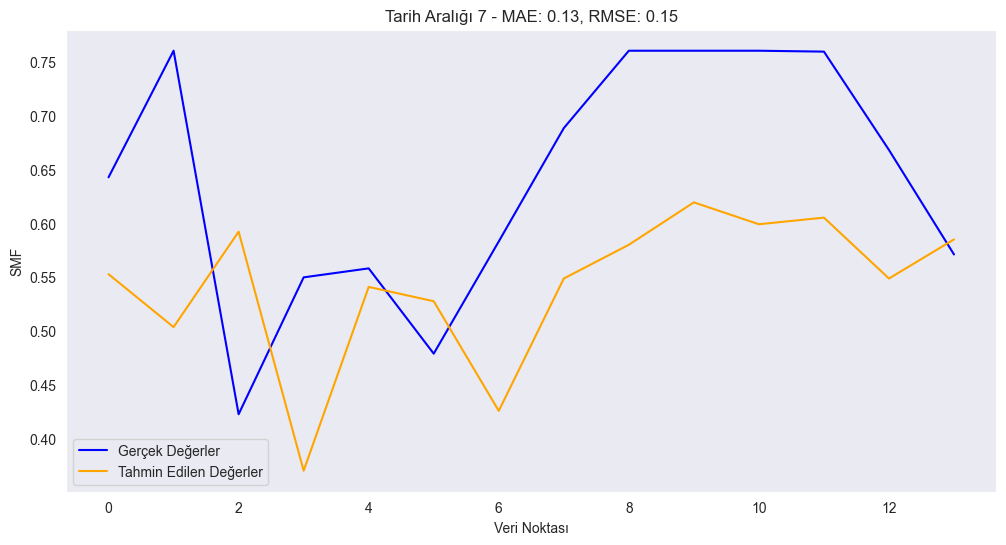

                         Tarih Aralığı       MAE      RMSE
0  2023-02-21 00:00 - 2023-02-21 23:00  0.140256  0.166427
1  2023-02-22 00:00 - 2023-02-22 23:00  0.137848  0.142095
2  2023-02-23 00:00 - 2023-02-23 23:00  0.087325  0.113536
3  2023-02-24 00:00 - 2023-02-24 23:00  0.087362  0.096684
4  2023-02-25 00:00 - 2023-02-25 23:00  0.075745  0.091830
5  2023-02-26 00:00 - 2023-02-26 23:00  0.153245  0.184728
6  2023-02-27 00:00 - 2023-02-27 23:00  0.130565  0.145953


In [5]:
from src.models.TFT import TFTModel
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Veri Yolu ve Hedef Değişken
file_path = "processed_dataset_with_features.csv"
target_column = "Smf"
features = ['Ptf', 'Maxeslesmefiyati', 'Maxalisfiyati', 'Arzislemhacmi', 
            'Talepislemhacmi', 'Talepislemhacmi_rolling_mean', 'Talepislemhacmi_rolling_sum',
            'Ptfeuro', 'Ptfdolar']

# 2. Model Sınıfını Başlat
lookback = 10
tft_model = TFTModel(file_path, target_column, features, lookback)

# 3. Veriyi Yükle ve Ön İşle
data = tft_model.load_and_preprocess_data()

# Test tarih aralıklarını tanımlayın
date_ranges = [
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-20 23:00", "test_start_date": "2023-02-21 00:00", "test_end_date": "2023-02-21 23:00"},
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-21 23:00", "test_start_date": "2023-02-22 00:00", "test_end_date": "2023-02-22 23:00"},
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-22 23:00", "test_start_date": "2023-02-23 00:00", "test_end_date": "2023-02-23 23:00"},
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-23 23:00", "test_start_date": "2023-02-24 00:00", "test_end_date": "2023-02-24 23:00"},
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-24 23:00", "test_start_date": "2023-02-25 00:00", "test_end_date": "2023-02-25 23:00"},
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-25 23:00", "test_start_date": "2023-02-26 00:00", "test_end_date": "2023-02-26 23:00"},
    {"train_start_date": "2019-01-01 00:00", "train_end_date": "2023-02-26 23:00", "test_start_date": "2023-02-27 00:00", "test_end_date": "2023-02-27 23:00"},
]
# Performans sonuçlarını saklamak için bir liste
results = []

# Her tarih aralığı için modeli eğit ve test et
for i, date_range in enumerate(date_ranges):
    print(f"\nTarih Aralığı {i + 1}: Eğitim {date_range['train_start_date']} - {date_range['train_end_date']} ve Test {date_range['test_start_date']} - {date_range['test_end_date']}")

    X_train, y_train = tft_model.create_time_series(data, date_range['train_start_date'], date_range['train_end_date'])
    X_test, y_test = tft_model.create_time_series(data, date_range['test_start_date'], date_range['test_end_date'])

    # Modeli oluştur ve eğit
    tft_model.build_model()
    tft_model.train_model(X_train, y_train, epochs=10, batch_size=32)

    # Tahmin yap ve değerlendir
    predictions, mae, rmse = tft_model.predict_and_evaluate(X_test, y_test)

    # Sonuçları sakla
    results.append({"Tarih Aralığı": f"{date_range['test_start_date']} - {date_range['test_end_date']}", "MAE": mae, "RMSE": rmse})

    # Tahminleri görselleştir
    plt.figure(figsize=(12, 6))
    plt.plot(y_test, label='Gerçek Değerler', color='blue')
    plt.plot(predictions, label='Tahmin Edilen Değerler', color='orange')
    plt.title(f"Tarih Aralığı {i + 1} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")
    plt.xlabel("Veri Noktası")
    plt.ylabel("SMF")
    plt.legend()
    plt.grid()
    plt.show()

# Performans sonuçlarını göster
results_df = pd.DataFrame(results)
print(results_df)
